In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
df_companies = pd.read_csv("sp500_companies.csv")
df_index = pd.read_csv("sp500_index.csv")
df_stocks = pd.read_csv("sp500_stocks.csv")

<h1>Data Collection</h1>

In [58]:
df_companies = df_companies.dropna()




Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64

In [59]:
df_stocks.isna().sum()
print(df_stocks.shape)

(1807279, 8)


In [60]:
df_stocks = df_stocks.dropna()
df_stocks.isna().sum()
print(df_stocks.shape)

(1720200, 8)


EDA
start with Companies


In [61]:
df_companies.head(5)

Exchange Symbol              Shortname               Longname  \
0      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
1      NMS   AAPL             Apple Inc.             Apple Inc.   
2      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
3      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
4      NMS   GOOG          Alphabet Inc.          Alphabet Inc.   

                   Sector                        Industry  Currentprice  \
0              Technology       Software - Infrastructure        421.90   
1              Technology            Consumer Electronics        176.55   
2              Technology                  Semiconductors        881.86   
3  Communication Services  Internet Content & Information        157.73   
4  Communication Services  Internet Content & Information        159.19   

       Marketcap        Ebitda  Revenuegrowth           City State  \
0  3134902501376  1.184270e+11          0.176        Redmond    WA   
1  2726267453440  1.301090e+11          0.021      Cupertino    CA   
2  2204649914368  3.448000e+10          2.653    Santa Clara    CA   
3  1969385111552  1.001720e+11          0.135  Mountain View    CA   
4  1969275797504  1.001720e+11          0.135  Mountain View    CA   

         Country  Fulltimeemployees  \
0  United States           221000.0   
1  United States           161000.0   
2  United States            29600.0   
3  United States           182502.0   
4  United States           182502.0   

                                 Longbusinesssummary    Weight  
0  Microsoft Corporation develops and supports so...  0.065663  
1  Apple Inc. designs, manufactures, and markets ...  0.057104  
2  NVIDIA Corporation provides graphics and compu...  0.046178  
3  Alphabet Inc. offers various products and plat...  0.041250  
4  Alphabet Inc. offers various products and plat...  0.041248

In [62]:

for index, row in df_companies.iterrows():
    if row['Longname'] != row['Shortname']:
        print(f"Longname: {row['Longname']}, Shortname: {row['Shortname']}")

Longname: Berkshire Hathaway Inc., Shortname: Berkshire Hathaway Inc. New
Longname: The Procter & Gamble Company, Shortname: Procter & Gamble Company (The)
Longname: The Home Depot, Inc., Shortname: Home Depot, Inc. (The)
Longname: Merck & Co., Inc., Shortname: Merck & Company, Inc.
Longname: The Coca-Cola Company, Shortname: Coca-Cola Company (The)
Longname: PepsiCo, Inc., Shortname: Pepsico, Inc.
Longname: Thermo Fisher Scientific Inc., Shortname: Thermo Fisher Scientific Inc
Longname: The Walt Disney Company, Shortname: Walt Disney Company (The)
Longname: Caterpillar Inc., Shortname: Caterpillar, Inc.
Longname: General Electric Company, Shortname: GE Aerospace
Longname: International Business Machines Corporation, Shortname: International Business Machines
Longname: Pfizer Inc., Shortname: Pfizer, Inc.
Longname: NIKE, Inc., Shortname: Nike, Inc.
Longname: Philip Morris International Inc., Shortname: Philip Morris International Inc
Longname: Booking Holdings Inc., Shortname: Booking 

In [63]:
df_companies.drop(columns=['Shortname', 'Longbusinesssummary'], inplace=True)

In [64]:
df_companies['Sector'].unique()

array(['Technology', 'Communication Services', 'Consumer Cyclical',
       'Financial Services', 'Healthcare', 'Consumer Defensive', 'Energy',
       'Industrials', 'Utilities', 'Real Estate', 'Basic Materials'],
      dtype=object)

In [65]:
# print(df_companies['Longbusinesssummary'])
df_companies.head()

Exchange Symbol               Longname                  Sector  \
0      NMS   MSFT  Microsoft Corporation              Technology   
1      NMS   AAPL             Apple Inc.              Technology   
2      NMS   NVDA     NVIDIA Corporation              Technology   
3      NMS  GOOGL          Alphabet Inc.  Communication Services   
4      NMS   GOOG          Alphabet Inc.  Communication Services   

                         Industry  Currentprice      Marketcap        Ebitda  \
0       Software - Infrastructure        421.90  3134902501376  1.184270e+11   
1            Consumer Electronics        176.55  2726267453440  1.301090e+11   
2                  Semiconductors        881.86  2204649914368  3.448000e+10   
3  Internet Content & Information        157.73  1969385111552  1.001720e+11   
4  Internet Content & Information        159.19  1969275797504  1.001720e+11   

   Revenuegrowth           City State        Country  Fulltimeemployees  \
0          0.176        Redmond    WA  United States           221000.0   
1          0.021      Cupertino    CA  United States           161000.0   
2          2.653    Santa Clara    CA  United States            29600.0   
3          0.135  Mountain View    CA  United States           182502.0   
4          0.135  Mountain View    CA  United States           182502.0   

     Weight  
0  0.065663  
1  0.057104  
2  0.046178  
3  0.041250  
4  0.041248

Histograms 

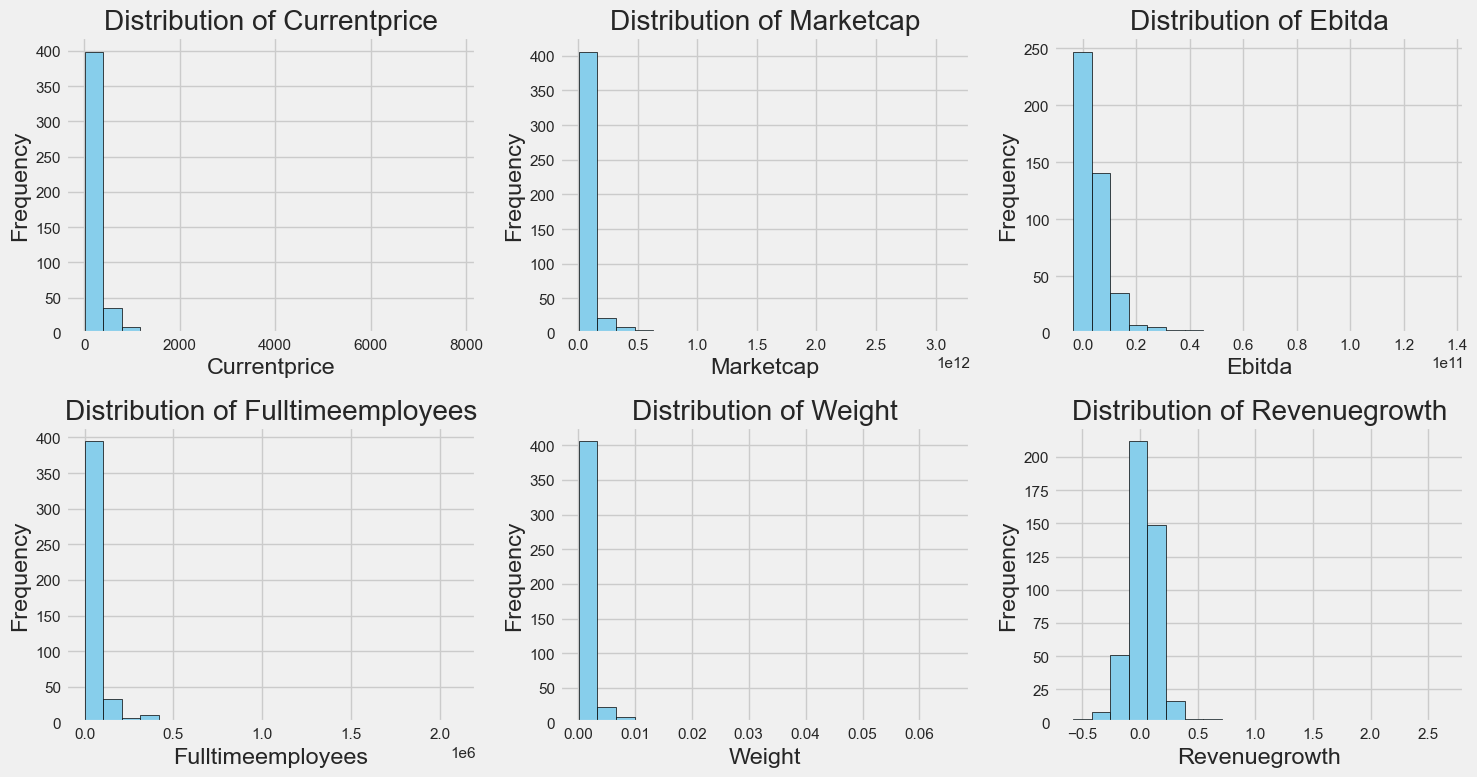

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
variables = ["Currentprice", "Marketcap", "Ebitda", "Fulltimeemployees", "Weight", "Revenuegrowth"]
for i, var in enumerate(variables):
    ax = axes[i//3, i%3]
    ax.hist(df_companies[var], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    plt.tight_layout()
    ax.set_ylabel('Frequency')    

Box plot 


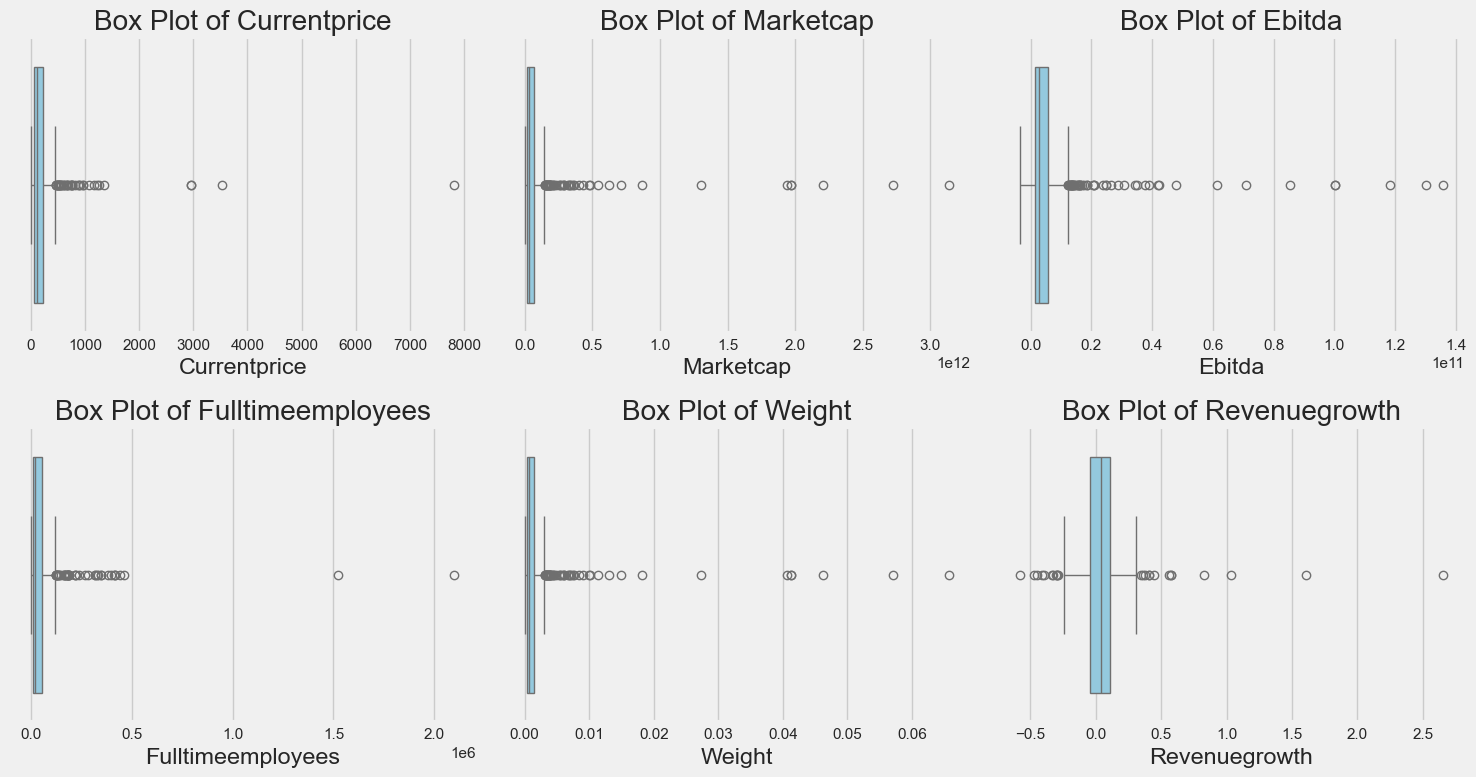

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot box plots for each variable
for i, var in enumerate(variables):
    ax = axes[i//3, i%3]
    sns.boxplot(x=df_companies[var], ax=ax, color='skyblue')
    ax.set_title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

In [68]:
industry_group = df_companies.groupby(['Industry', 'Sector'])
industry_group.head()


Exchange Symbol                 Longname                  Sector  \
0        NMS   MSFT    Microsoft Corporation              Technology   
1        NMS   AAPL               Apple Inc.              Technology   
2        NMS   NVDA       NVIDIA Corporation              Technology   
3        NMS  GOOGL            Alphabet Inc.  Communication Services   
4        NMS   GOOG            Alphabet Inc.  Communication Services   
..       ...    ...                      ...                     ...   
496      NYQ    RHI         Robert Half Inc.             Industrials   
498      NYQ    MHK  Mohawk Industries, Inc.       Consumer Cyclical   
499      NYQ    FMC          FMC Corporation         Basic Materials   
500      NYQ    IVZ             Invesco Ltd.      Financial Services   
502      NYQ     GL          Globe Life Inc.      Financial Services   

                               Industry  Currentprice      Marketcap  \
0             Software - Infrastructure        421.90  3134902501376   
1                  Consumer Electronics        176.55  2726267453440   
2                        Semiconductors        881.86  2204649914368   
3        Internet Content & Information        157.73  1969385111552   
4        Internet Content & Information        159.19  1969275797504   
..                                  ...           ...            ...   
496      Staffing & Employment Services         72.07     7582412800   
498  Furnishings, Fixtures & Appliances        113.17     7227386880   
499                 Agricultural Inputs         56.75     7083364864   
500                    Asset Management         15.34     6896572416   
502                    Insurance - Life         59.09     5556640256   

           Ebitda  Revenuegrowth           City State        Country  \
0    1.184270e+11          0.176        Redmond    WA  United States   
1    1.301090e+11          0.021      Cupertino    CA  United States   
2    3.448000e+10          2.653    Santa Clara    CA  United States   
3    1.001720e+11          0.135  Mountain View    CA  United States   
4    1.001720e+11          0.135  Mountain View    CA  United States   
..            ...            ...            ...   ...            ...   
496  5.188370e+08         -0.147     Menlo Park    CA  United States   
498  1.444173e+09         -0.014        Calhoun    GA  United States   
499  8.635000e+08         -0.293   Philadelphia    PA  United States   
500  1.018500e+09         -0.021        Atlanta    GA  United States   
502  1.318482e+09          0.060       McKinney    TX  United States   

     Fulltimeemployees    Weight  
0             221000.0  0.065663  
1             161000.0  0.057104  
2              29600.0  0.046178  
3             182502.0  0.041250  
4             182502.0  0.041248  
..                 ...       ...  
496            15000.0  0.000159  
498            43300.0  0.000151  
499             6600.0  0.000148  
500             8489.0  0.000144  
502             3636.0  0.000116  

[337 rows x 14 columns]

**Marketcap (Market Capitalization):**
- *Mean (Average):* The mean market capitalization of each group provides a measure of the typical size of companies within that group.
- *Median:* The median market capitalization is less sensitive to extreme values and can provide a better representation of the central tendency, especially if the data is skewed.
- *Standard Deviation:* The standard deviation measures the dispersion of market capitalizations within each group, indicating the variability in sizes of companies.
- *Min and Max:* The minimum and maximum market capitalizations can provide insights into the range of company sizes within each group.

**Ebitda (Earnings Before Interest, Taxes, Depreciation, and Amortization):**
- *Mean (Average):* The mean EBITDA of each group gives an indication of the average earnings before various expenses for companies within that group.
- *Median:* Similar to market capitalization, the median EBITDA can provide a robust measure of central tendency, especially if the data is not normally distributed.
- *Standard Deviation:* The standard deviation of EBITDA indicates the variability in earnings among companies within each group.
- *Min and Max:* The minimum and maximum EBITDA values provide insights into the range of earnings for companies within each group.

**Revenuegrowth (Revenue Growth):**
- *Mean (Average):* The mean revenue growth of each group provides an average rate of revenue increase for companies within that group.
- *Median:* The median revenue growth can be more robust if there are extreme values or outliers in the data.
- *Standard Deviation:* The standard deviation of revenue growth indicates the variability in growth rates among companies within each group.
- *Min and Max:* The minimum and maximum revenue growth rates offer insights into the range of growth experiences among companies within each group.


In [69]:
agg_stats = industry_group.agg({
    'Marketcap': 'mean',  # Mean market capitalization
    'Ebitda': 'median',   # Median EBITDA
    'Revenuegrowth': 'mean'  # Mean revenue growth
})
agg_stats.reset_index(inplace=True)


In [70]:
top_10 = agg_stats.nlargest(10, 'Marketcap')["Industry"]
print(top_10)

23              Consumer Electronics
55    Internet Content & Information
56                   Internet Retail
49           Insurance - Diversified
66              Oil & Gas Integrated
92         Software - Infrastructure
90                    Semiconductors
25                   Credit Services
28      Drug Manufacturers - General
45           Home Improvement Retail
Name: Industry, dtype: object


In [71]:
top_10_data = df_companies[df_companies['Industry'].isin(top_10)]
top_10_data

Exchange Symbol                            Longname  \
0        NMS   MSFT               Microsoft Corporation   
1        NMS   AAPL                          Apple Inc.   
2        NMS   NVDA                  NVIDIA Corporation   
3        NMS  GOOGL                       Alphabet Inc.   
4        NMS   GOOG                       Alphabet Inc.   
5        NMS   AMZN                    Amazon.com, Inc.   
6        NMS   META                Meta Platforms, Inc.   
7        NYQ  BRK-B             Berkshire Hathaway Inc.   
8        NYQ    LLY               Eli Lilly and Company   
9        NMS   AVGO                       Broadcom Inc.   
14       NYQ    XOM             Exxon Mobil Corporation   
15       NYQ     MA             Mastercard Incorporated   
18       NYQ    JNJ                   Johnson & Johnson   
19       NYQ     HD                The Home Depot, Inc.   
20       NYQ   ORCL                  Oracle Corporation   
22       NYQ    MRK                   Merck & Co., Inc.   
23       NYQ    CVX                 Chevron Corporation   
24       NYQ   ABBV                         AbbVie Inc.   
28       NMS    AMD        Advanced Micro Devices, Inc.   
33       NMS   ADBE                          Adobe Inc.   
39       NMS   QCOM               QUALCOMM Incorporated   
54       NMS   INTC                   Intel Corporation   
55       NMS    TXN      Texas Instruments Incorporated   
57       NYQ    PFE                         Pfizer Inc.   
58       NMS   AMGN                          Amgen Inc.   
64       NMS     MU             Micron Technology, Inc.   
67       NYQ    LOW              Lowe's Companies, Inc.   
95       NYQ    BMY        Bristol-Myers Squibb Company   
98       NMS    ADI                Analog Devices, Inc.   
100      NMS   PANW            Palo Alto Networks, Inc.   
105      NMS   SNPS                      Synopsys, Inc.   
106      NMS   GILD               Gilead Sciences, Inc.   
135      NMS   PYPL               PayPal Holdings, Inc.   
172      NMS   FTNT                      Fortinet, Inc.   
177      NYQ    AIG  American International Group, Inc.   
190      NMS   MCHP   Microchip Technology Incorporated   
262      NMS   MPWR      Monolithic Power Systems, Inc.   
280      NMS   BIIB                         Biogen Inc.   
281      NMS     ON        ON Semiconductor Corporation   
292      NMS   EBAY                           eBay Inc.   
332      NYQ   CPAY                        Corpay, Inc.   
368      NMS   VRSN                      VeriSign, Inc.   
399      NMS   SWKS            Skyworks Solutions, Inc.   
406      NMS   AKAM           Akamai Technologies, Inc.   
435      NMS    GEN                    Gen Digital Inc.   
466      NMS   FFIV                            F5, Inc.   
470      NMS   QRVO                         Qorvo, Inc.   
484      NMS   MTCH                   Match Group, Inc.   
491      NMS   ETSY                          Etsy, Inc.   

                     Sector                        Industry  Currentprice  \
0                Technology       Software - Infrastructure        421.90   
1                Technology            Consumer Electronics        176.55   
2                Technology                  Semiconductors        881.86   
3    Communication Services  Internet Content & Information        157.73   
4    Communication Services  Internet Content & Information        159.19   
5         Consumer Cyclical                 Internet Retail        186.13   
6    Communication Services  Internet Content & Information        511.90   
7        Financial Services         Insurance - Diversified        403.26   
8                Healthcare    Drug Manufacturers - General        751.64   
9                Technology                  Semiconductors       1344.07   
14                   Energy            Oil & Gas Integrated        120.37   
15       Financial Services                 Credit Services        465.38   
18               Healthcare    Drug Manufacturers - 

Market capitalization, often abbreviated as "market cap," is a measure of the total value of a publicly traded company's outstanding shares of stock. It is calculated by multiplying the current market price of a single share by the total number of outstanding shares.

Mathematically, market capitalization can be expressed as:

\[
\text{Market Cap} = \text{Current Market Price per Share} \times \text{Total Number of Outstanding Shares}
\]

Market capitalization is used by investors and analysts to assess the size and relative value of a company. It is often used as an indicator of a company's size in the financial markets and is one of the key factors considered when categorizing companies into different size categories, such as large-cap, mid-cap, and small-cap.


Data visualization of marketcap and indeustry 

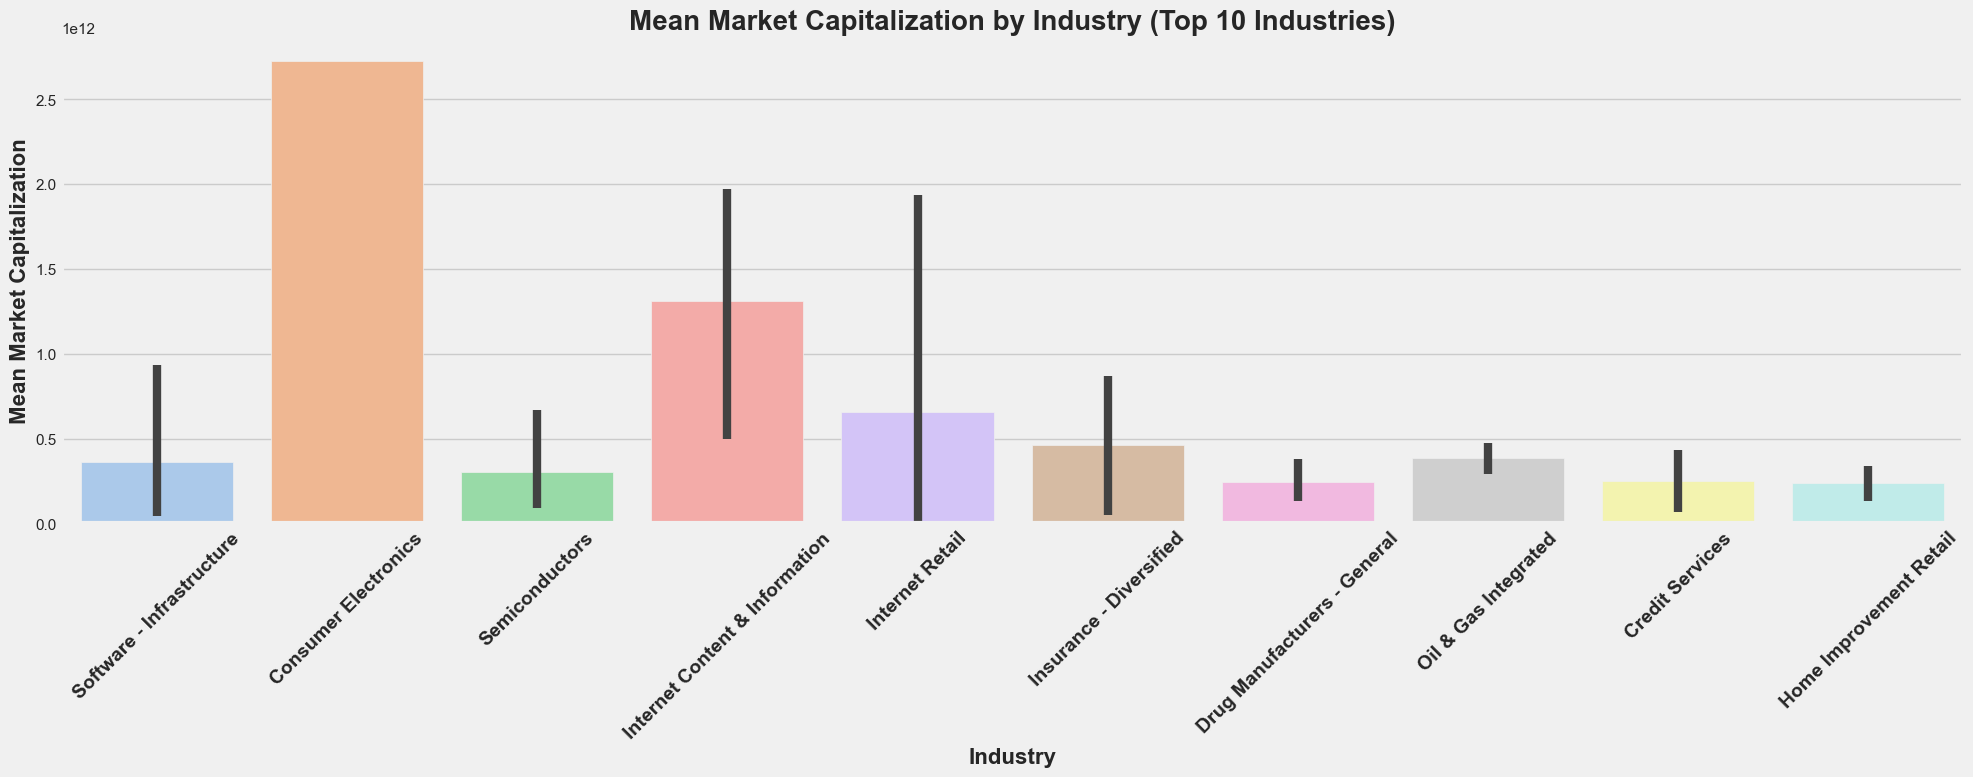

In [72]:
colors = sns.color_palette('pastel')

# Set the figure size
plt.figure(figsize=(20, 8))

# Create the bar plot with specified color palette
sns.barplot(data=top_10_data, x='Industry', y='Marketcap', hue='Industry', palette=colors, legend=False)

# Set title and labels with increased font size and font weight
plt.title('Mean Market Capitalization by Industry (Top 10 Industries)', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.xlabel("Industry", fontsize=16, fontweight='bold')
plt.ylabel("Mean Market Capitalization", fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Here we can see Consumer Electronics having the highest marketcap showcasing highest value of industry 

b. Relationships between Columns


Scatter Plot 
Currentprice vs Marketcap
Ebitda vs Revenuegrowth
Fulltimeemployees vs Marketcap


In [73]:
def scatter_plot( var):

    sns.scatterplot(x =var[0], y=var[1], data=df_companies)
    plt.title(f'{var[0]} vs {var[1]}')
    plt.xlabel(f'{var[0]}')
    plt.ylabel(f'{var[1]}')
    
    # Customize the plot
    sns.set(style='whitegrid')
    plt.grid(True)
    # plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()


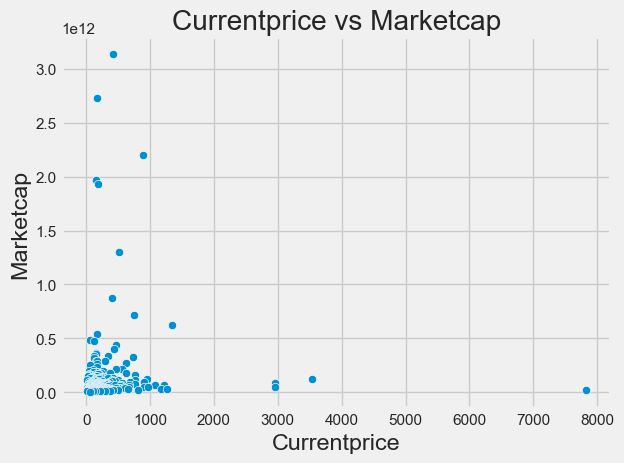

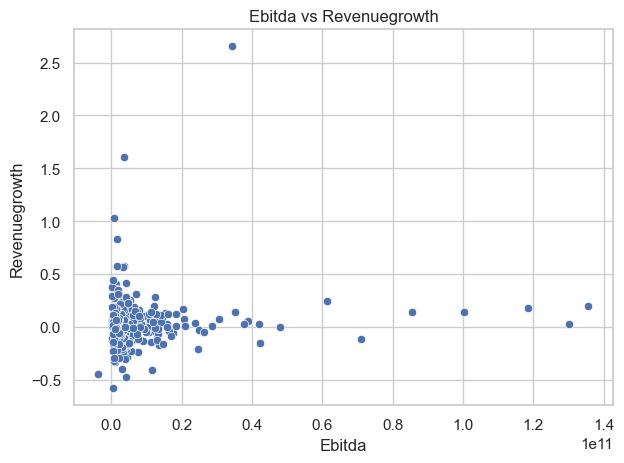

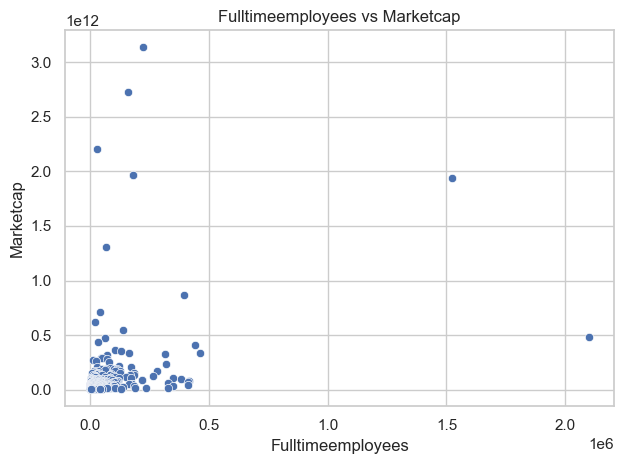

In [74]:
scatter_plot(["Currentprice","Marketcap"])
scatter_plot(["Ebitda","Revenuegrowth"])
scatter_plot(["Fulltimeemployees","Marketcap"])


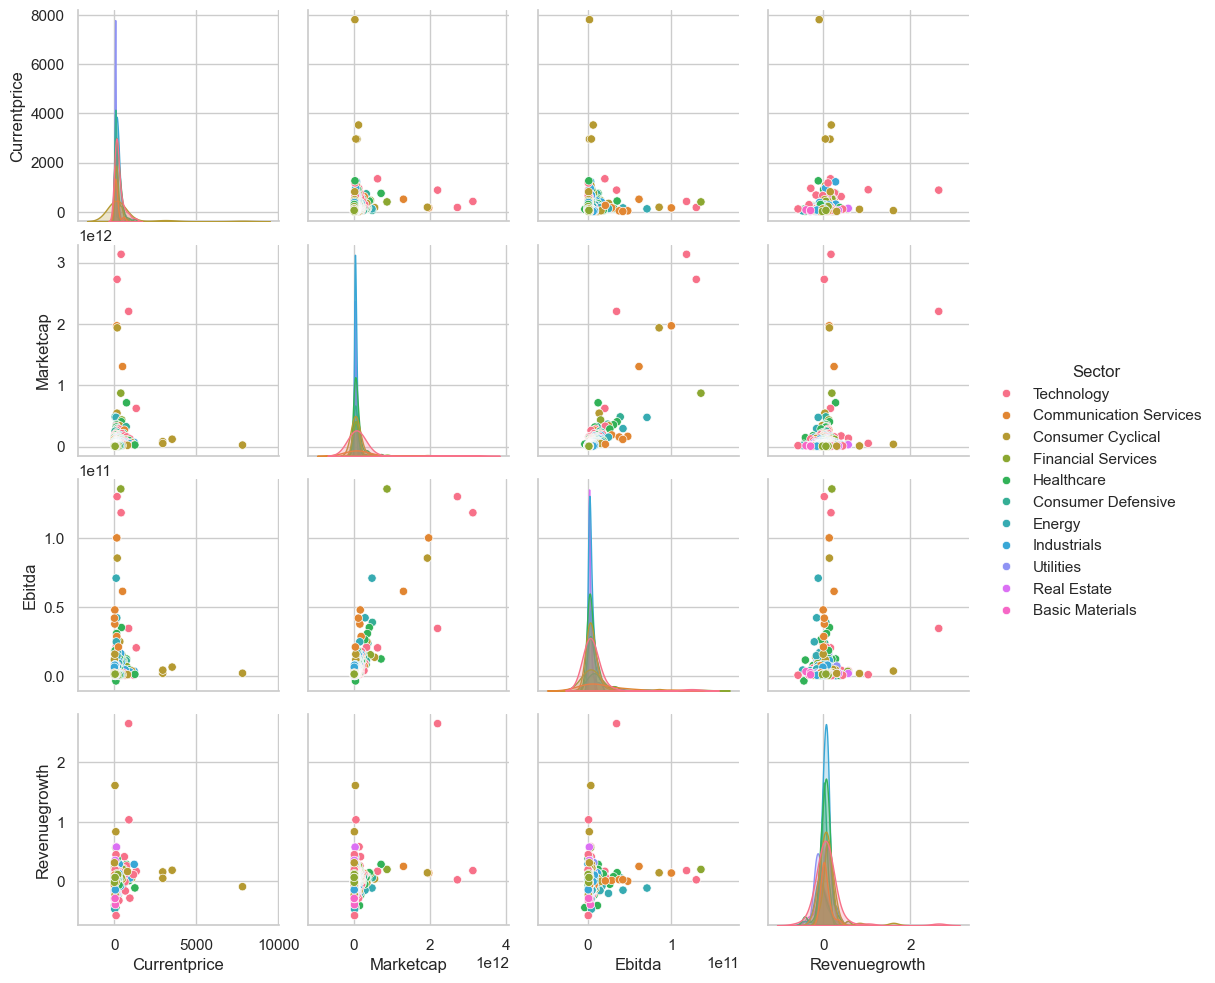

In [75]:
markers=['o', 's', 'D', 'X', '^', 'P', 'H', '>', '<', 'v', '8', 'p']
sns.pairplot(df_companies, 
             vars=['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth'], 
             hue='Sector', 
             palette='husl')
plt.show()

Correaltion matrix 

In [76]:
int_data = df_companies.select_dtypes(include=[np.number])
mat = pd.DataFrame(int_data).corr()
mat
 

Currentprice  Marketcap    Ebitda  Revenuegrowth  \
Currentprice           1.000000   0.070650  0.012464       0.092473   
Marketcap              0.070650   1.000000  0.849975       0.274223   
Ebitda                 0.012464   0.849975  1.000000       0.077228   
Revenuegrowth          0.092473   0.274223  0.077228       1.000000   
Fulltimeemployees     -0.011516   0.334582  0.406823       0.032907   
Weight                 0.070650   1.000000  0.849975       0.274223   

                   Fulltimeemployees    Weight  
Currentprice               -0.011516  0.070650  
Marketcap                   0.334582  1.000000  
Ebitda                      0.406823  0.849975  
Revenuegrowth               0.032907  0.274223  
Fulltimeemployees           1.000000  0.334582  
Weight                      0.334582  1.000000

"Marketcap" and "Ebitda" are highly correlated (0.849975), which makes sense since they are both related to company size and financial performance.
"Currentprice" and "Marketcap" have a relatively weak correlation (0.070650), which might indicate that the current price of a company's stock doesn't necessarily reflect its market capitalization.
"Fulltimeemployees" and "Marketcap" have a moderate correlation (0.334582), which could suggest that companies with more employees tend to have larger market capitalizations.

<Axes: >

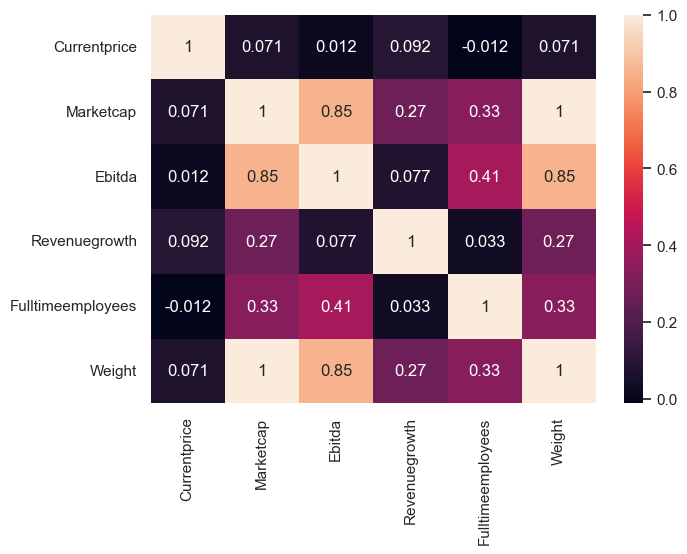

In [77]:
sns.heatmap(mat, annot=True)

<Axes: xlabel='Sector'>

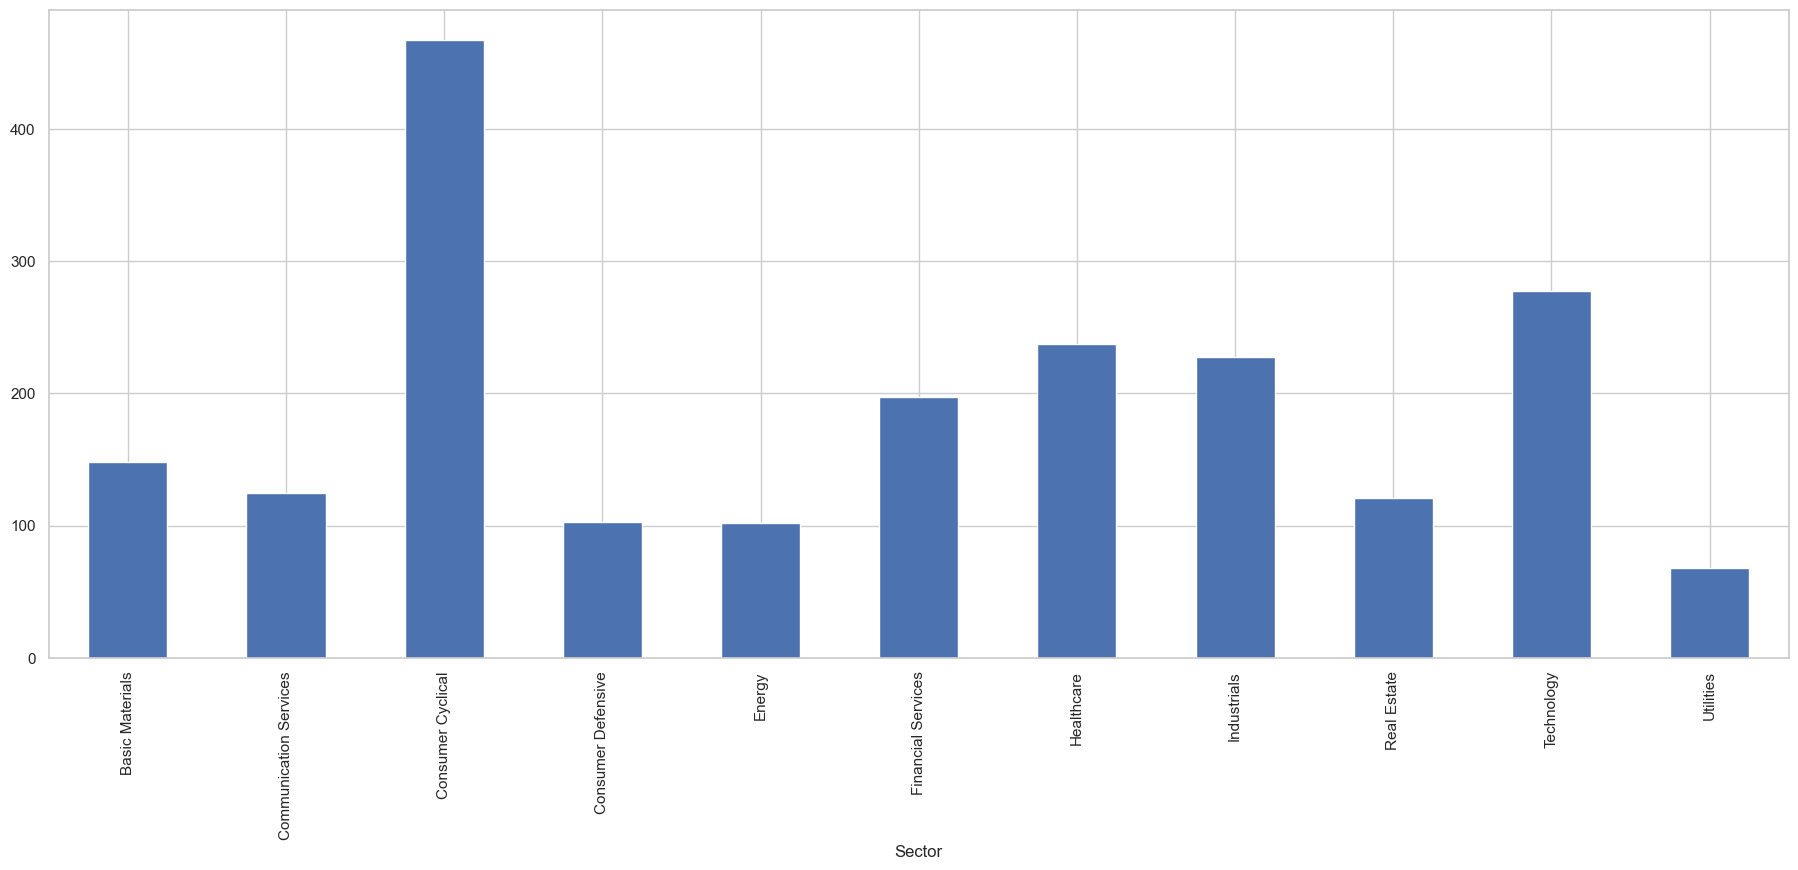

In [78]:
plt.figure(figsize=(20, 8))
df_companies.groupby('Sector')['Currentprice'].mean().plot.bar() 


<Axes: xlabel='Industry'>

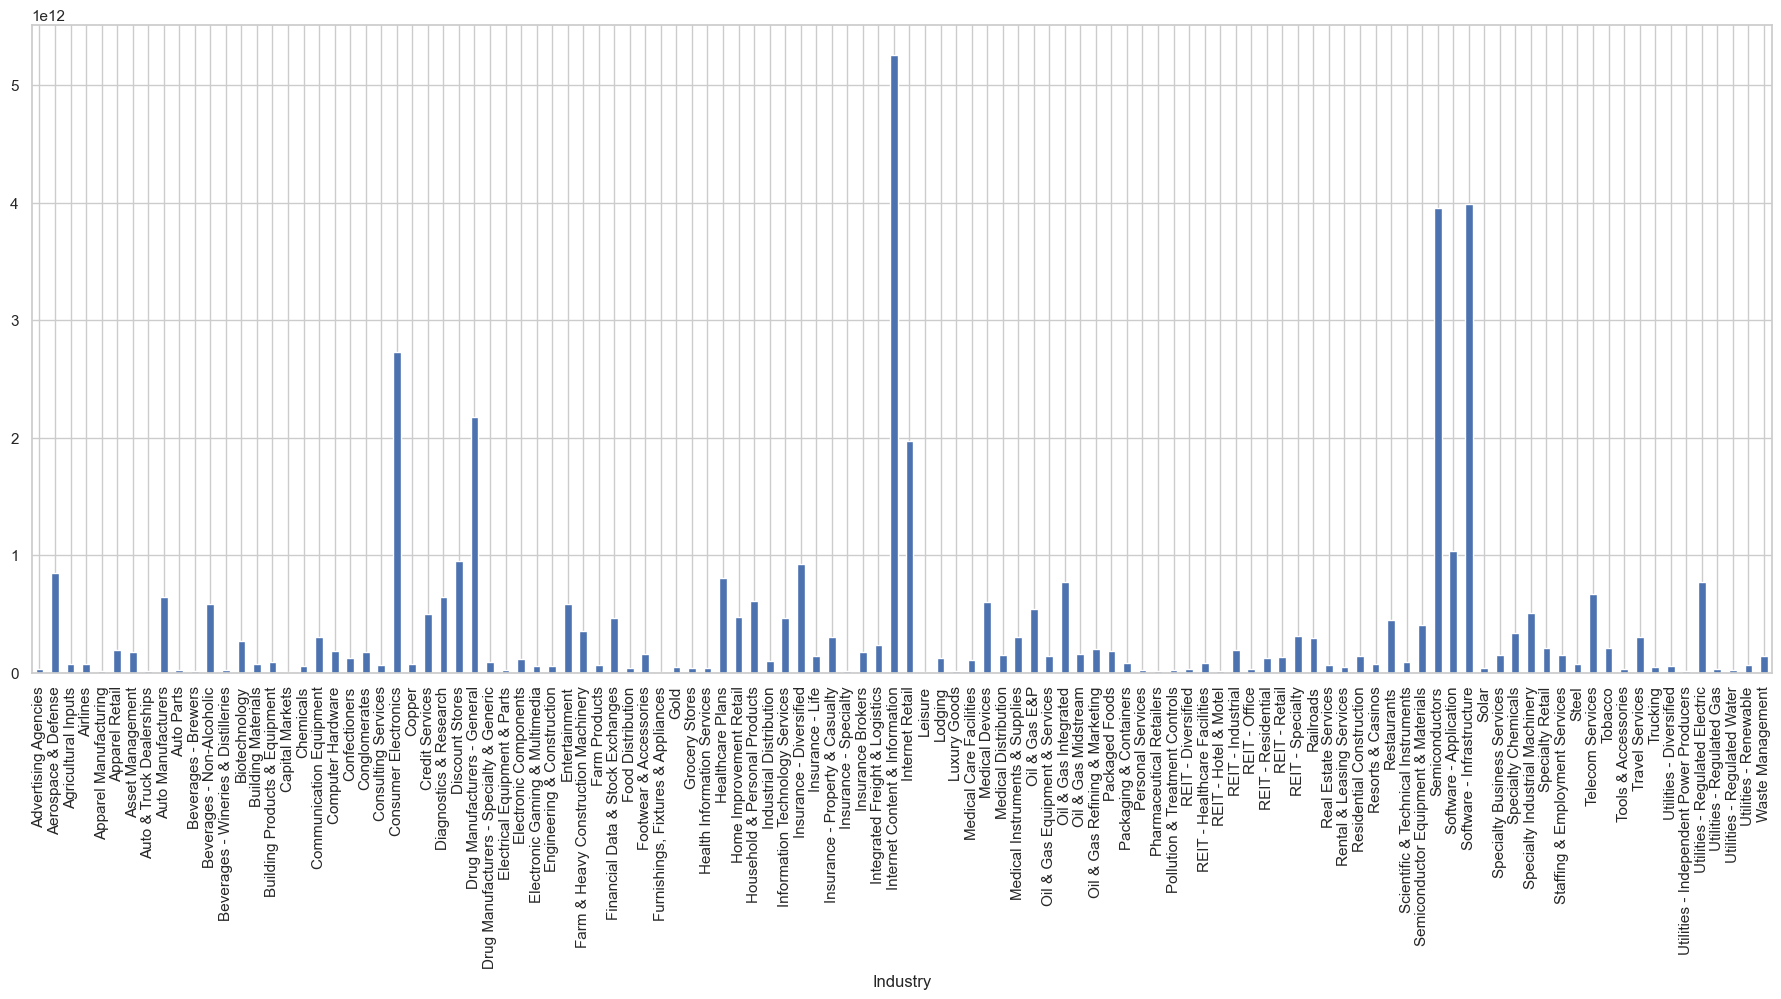

In [79]:
plt.figure(figsize=(20, 8))

df_companies.groupby('Industry')['Marketcap'].sum().plot.bar() 

In [80]:
df_index.head(5)


Date   S&P500
0  2014-04-14  1830.61
1  2014-04-15  1842.98
2  2014-04-16  1862.31
3  2014-04-17  1864.85
4  2014-04-21  1871.89

In [81]:
df_index['Date'] = pd.to_datetime(df_index['Date'], format='%Y-%m-%d')
df_index.head()

Date   S&P500
0 2014-04-14  1830.61
1 2014-04-15  1842.98
2 2014-04-16  1862.31
3 2014-04-17  1864.85
4 2014-04-21  1871.89

In [82]:

# df_index.set_index('Date', inplace=True)



In [83]:
import datetime
from datetime import date
# S&P 500 Index Performance
 
    # What's the current year performance
today=datetime.date.today()
year=today.year
month=today.month

df_index['year']=df_index['Date'].dt.year
df_index['month']=df_index['Date'].dt.month

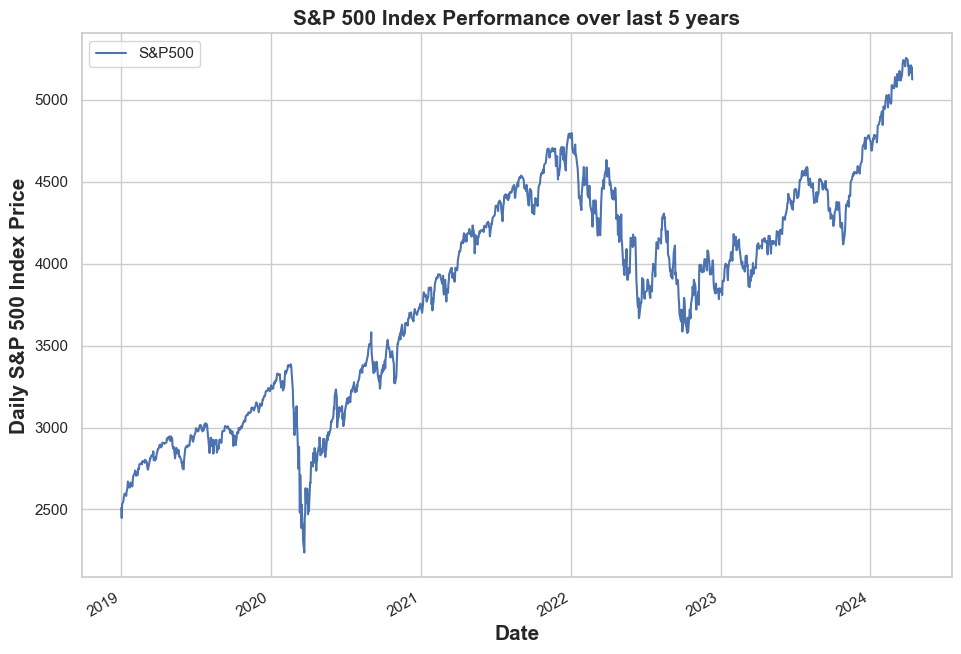

In [84]:
# last 5 years S&P Index performance 
ax=df_index[df_index['year']>=year-5][['S&P500','Date']].set_index('Date').plot(figsize=(10,8))
plt.title("S&P 500 Index Performance over last 5 years", weight='bold', fontsize=15)
ax.set_xlabel("Date", weight='bold', fontsize=15)
ax.set_ylabel("Daily S&P 500 Index Price", weight='bold', fontsize=15)
plt.show()

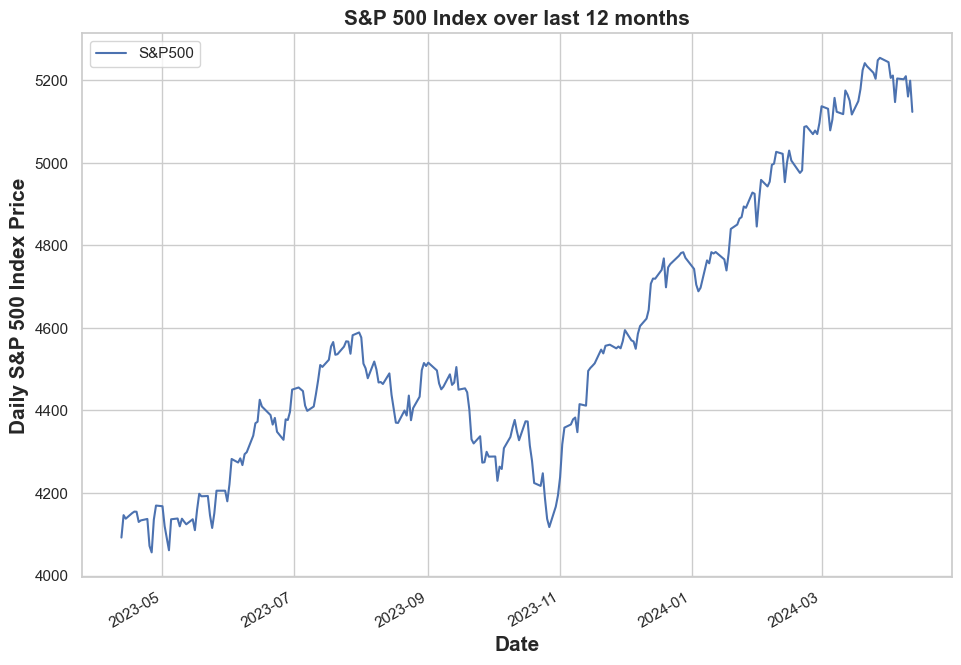

In [85]:
# last 12 month S&P Index performance 
# Filter the data for the last 12 months
last_12_months = df_index[df_index['Date'] >= (max(df_index['Date']) - pd.DateOffset(months=12))]

# Plot the data
last_12_months.plot(x='Date', y='S&P500', kind='line', figsize=(10,8))
plt.title("S&P 500 Index over last 12 months", weight='bold', fontsize=15)
plt.xlabel("Date", weight='bold', fontsize=15)
plt.ylabel("Daily S&P 500 Index Price", weight='bold', fontsize=15)
plt.show()

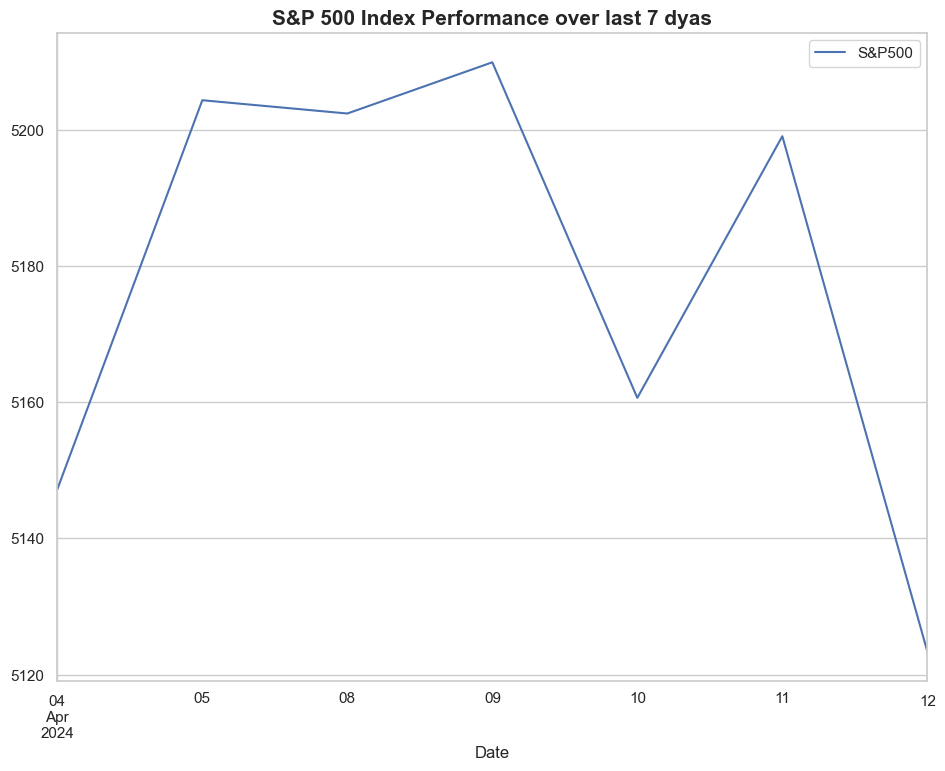

In [86]:
df_index.tail(7).plot(x='Date', y='S&P500', kind='line',figsize=(10,8))
plt.title("S&P 500 Index Performance over last 7 dyas", weight='bold', fontsize=15)
ax.set_xlabel("Date", weight='bold', fontsize=15)
ax.set_ylabel("Daily S&P 500 Index Price", weight='bold', fontsize=15)
plt.show()

In [87]:
print(f"Total Market Cap of S&P 500 Index is ${round(df_companies['Marketcap'].sum()/1000,3)} trillion dollars")

Total Market Cap of S&P 500 Index is $43394033612.8 trillion dollars


In [88]:
print(df_stocks.shape)


(1720200, 8)


In [89]:
df_stocks

Date Symbol   Adj Close       Close        High         Low  \
0        2010-01-04    MMM   46.422302   69.414719   69.774246   69.122070   
1        2010-01-05    MMM   46.131523   68.979935   69.590302   68.311035   
2        2010-01-06    MMM   46.785759   69.958191   70.735786   69.824417   
3        2010-01-07    MMM   46.819294   70.008362   70.033447   68.662209   
4        2010-01-08    MMM   47.149204   70.501671   70.501671   69.648827   
...             ...    ...         ...         ...         ...         ...   
1807274  2024-04-08    ZTS  165.690002  165.690002  166.889999  164.039993   
1807275  2024-04-09    ZTS  167.139999  167.139999  167.179993  164.740005   
1807276  2024-04-10    ZTS  163.199997  163.199997  164.869995  162.639999   
1807277  2024-04-11    ZTS  162.729996  162.729996  164.289993  161.259995   
1807278  2024-04-12    ZTS  149.979996  149.979996  155.979996  148.479996   

               Open      Volume  
0         69.473244   3640265.0  
1         69.230766   3405012.0  
2         70.133781   6301126.0  
3         69.665550   5346240.0  
4         69.974915   4073337.0  
...             ...         ...  
1807274  165.880005   2301400.0  
1807275  165.860001   1829800.0  
1807276  164.259995   2666000.0  
1807277  163.320007   2290400.0  
1807278  155.850006  11577200.0  

[1720200 rows x 8 columns]

In [90]:
symbol_groups = df_stocks.groupby('Symbol')
symbol_groups.head()

Date Symbol  Adj Close      Close       High        Low  \
0        2010-01-04    MMM  46.422302  69.414719  69.774246  69.122070   
1        2010-01-05    MMM  46.131523  68.979935  69.590302  68.311035   
2        2010-01-06    MMM  46.785759  69.958191  70.735786  69.824417   
3        2010-01-07    MMM  46.819294  70.008362  70.033447  68.662209   
4        2010-01-08    MMM  47.149204  70.501671  70.501671  69.648827   
...             ...    ...        ...        ...        ...        ...   
1804461  2013-02-01    ZTS  28.626331  31.010000  31.740000  30.469999   
1804462  2013-02-04    ZTS  28.635557  31.020000  31.990000  30.760000   
1804463  2013-02-05    ZTS  28.654020  31.040001  31.980000  30.850000   
1804464  2013-02-06    ZTS  28.644793  31.030001  31.430000  30.750000   
1804465  2013-02-07    ZTS  29.540232  32.000000  32.730000  31.000000   

              Open      Volume  
0        69.473244   3640265.0  
1        69.230766   3405012.0  
2        70.133781   6301126.0  
3        69.665550   5346240.0  
4        69.974915   4073337.0  
...            ...         ...  
1804461  31.500000  66789100.0  
1804462  31.090000   7695400.0  
1804463  31.250000   5013200.0  
1804464  30.980000   2126100.0  
1804465  31.000000   3800800.0  

[2515 rows x 8 columns]

In [91]:

for symbol, group in symbol_groups:
    start_date = group['Date'].min()
    end_date = group['Date'].max()
    print(f"Symbol: {symbol}, Start Date: {start_date}, End Date: {end_date}")

Symbol: A, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: AAL, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: AAPL, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ABBV, Start Date: 2013-01-02, End Date: 2024-04-12
Symbol: ABNB, Start Date: 2020-12-10, End Date: 2024-04-12
Symbol: ABT, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ACGL, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ACN, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ADBE, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ADI, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ADM, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ADP, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: ADSK, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: AEE, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: AEP, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: AES, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: AFL, Start Date: 2010-01-04, End Date: 2024-04-12
Symbol: AI

In [92]:
# Biggest and lowest movers as of last day
last_stock=df_stocks[df_stocks["Date"]==df_stocks["Date"].max()]
last_stock

Date Symbol   Adj Close       Close        High         Low  \
3592     2024-04-12    MMM   91.309998   91.309998   92.809998   91.150002   
7185     2024-04-12    AOS   86.500000   86.500000   86.580002   85.330002   
10778    2024-04-12    ABT  109.110001  109.110001  110.500000  108.489998   
14371    2024-04-12   ABBV  162.279999  162.279999  164.449997  160.000000   
17964    2024-04-12    ACN  315.399994  315.399994  322.500000  313.190002   
...             ...    ...         ...         ...         ...         ...   
1792906  2024-04-12    XYL  128.110001  128.110001  128.669998  127.190002   
1796499  2024-04-12    YUM  137.800003  137.800003  138.490005  137.179993   
1800092  2024-04-12   ZBRA  289.679993  289.679993  295.029999  287.869995   
1803685  2024-04-12    ZBH  124.480003  124.480003  127.099998  123.709999   
1807278  2024-04-12    ZTS  149.979996  149.979996  155.979996  148.479996   

               Open      Volume  
3592      92.760002   3590100.0  
7185      85.330002   1178400.0  
10778    110.269997   4041500.0  
14371    164.449997   7029400.0  
17964    320.970001   4207400.0  
...             ...         ...  
1792906  127.940002    899500.0  
1796499  138.410004   1950400.0  
1800092  293.850006    221000.0  
1803685  126.400002   1048600.0  
1807278  155.850006  11577200.0  

[503 rows x 8 columns]

In [93]:
# percentage change and big movers
last_stock.loc[(last_stock['Close'] != last_stock['Open']), 'PercentageChange'] = round(((last_stock['Close'] - last_stock['Open'])/ last_stock['Open'])* 100, 2)

last_stock.loc[(last_stock['High'] != last_stock['Low']), 'BigMovers'] = ((last_stock['High'] - last_stock['Low'])/ last_stock['Low'])* 100
last_stock


/var/folders/t1/800705wd5xv08rr8sp9xzmdr0000gn/T/ipykernel_68733/3799600643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_stock.loc[(last_stock['Close'] != last_stock['Open']), 'PercentageChange'] = round(((last_stock['Close'] - last_stock['Open'])/ last_stock['Open'])* 100, 2)
/var/folders/t1/800705wd5xv08rr8sp9xzmdr0000gn/T/ipykernel_68733/3799600643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_stock.loc[(last_stock['High'] != last_stock['Low']), 'BigMovers'] = ((last_stock['High'] 

Date Symbol   Adj Close       Close        High         Low  \
3592     2024-04-12    MMM   91.309998   91.309998   92.809998   91.150002   
7185     2024-04-12    AOS   86.500000   86.500000   86.580002   85.330002   
10778    2024-04-12    ABT  109.110001  109.110001  110.500000  108.489998   
14371    2024-04-12   ABBV  162.279999  162.279999  164.449997  160.000000   
17964    2024-04-12    ACN  315.399994  315.399994  322.500000  313.190002   
...             ...    ...         ...         ...         ...         ...   
1792906  2024-04-12    XYL  128.110001  128.110001  128.669998  127.190002   
1796499  2024-04-12    YUM  137.800003  137.800003  138.490005  137.179993   
1800092  2024-04-12   ZBRA  289.679993  289.679993  295.029999  287.869995   
1803685  2024-04-12    ZBH  124.480003  124.480003  127.099998  123.709999   
1807278  2024-04-12    ZTS  149.979996  149.979996  155.979996  148.479996   

               Open      Volume  PercentageChange  BigMovers  
3592      92.760002   3590100.0             -1.56   1.821170  
7185      85.330002   1178400.0              1.37   1.464901  
10778    110.269997   4041500.0             -1.05   1.852707  
14371    164.449997   7029400.0             -1.32   2.781248  
17964    320.970001   4207400.0             -1.74   2.972636  
...             ...         ...               ...        ...  
1792906  127.940002    899500.0              0.13   1.163610  
1796499  138.410004   1950400.0             -0.44   0.954959  
1800092  293.850006    221000.0             -1.42   2.487235  
1803685  126.400002   1048600.0             -1.52   2.740279  
1807278  155.850006  11577200.0             -3.77   5.051185  

[503 rows x 10 columns]

In [94]:
top_traded_stocks = last_stock.nlargest(100, 'Volume')[['Symbol', 'Volume', 'Date','Adj Close','Close','High','Low','Open','PercentageChange','BigMovers']]
top_traded_stocks

Symbol       Volume        Date   Adj Close       Close        High  \
143719    AAPL  101593300.0  2024-04-12  176.550003  176.550003  178.360001   
912621    INTC   80139400.0  2024-04-12   35.689999   35.689999   36.700001   
1598884   TSLA   64506600.0  2024-04-12  171.050003  171.050003  173.809998   
25150      AMD   63334200.0  2024-04-12  163.279999  163.279999  165.699997   
729378       F   52319600.0  2024-04-12   12.610000   12.610000   12.920000   
...        ...          ...         ...         ...         ...         ...   
161684    ANET    5747300.0  2024-04-12  271.220001  271.220001  282.700012   
794052    GILD    5691400.0  2024-04-12   68.070000   68.070000   68.620003   
323369    CARR    5654100.0  2024-04-12   56.840000   56.840000   56.924999   
1178503   MNST    5634400.0  2024-04-12   55.009998   55.009998   55.020000   
21557     ADBE    5620000.0  2024-04-12  474.089996  474.089996  478.779999   

                Low        Open  PercentageChange  BigMovers  
143719   174.210007  174.259995              1.31   2.382179  
912621    35.599998   36.689999             -2.73   3.089894  
1598884  170.360001  172.339996             -0.75   2.025121  
25150    161.820007  164.529999             -0.76   2.397719  
729378    12.500000   12.920000             -2.40   3.360001  
...             ...         ...               ...        ...  
161684   268.329987  280.269989             -3.23   5.355356  
794052    67.620003   68.519997             -0.66   1.478852  
323369    55.959999   55.990002              1.52   1.724446  
1178503   54.310001   54.410000              1.10   1.307308  
21557    468.600006  477.950012             -0.81   2.172427  

[100 rows x 10 columns]

In [95]:
last_stock.loc[:,'Date'] = pd.to_datetime(last_stock['Date'], format='%Y-%m-%d')
last_5_years = last_stock[last_stock['Date'] >= (max(last_stock['Date']) - pd.DateOffset(years=5))]
top_100_traded_stocks = last_5_years.nlargest(100, 'Volume')[['Date','Symbol', 'Volume', 'Adj Close','Close','High','Low','Open','PercentageChange','BigMovers']]
top_100_traded_stocks

Date Symbol       Volume   Adj Close       Close  \
143719   2024-04-12 00:00:00   AAPL  101593300.0  176.550003  176.550003   
912621   2024-04-12 00:00:00   INTC   80139400.0   35.689999   35.689999   
1598884  2024-04-12 00:00:00   TSLA   64506600.0  171.050003  171.050003   
25150    2024-04-12 00:00:00    AMD   63334200.0  163.279999  163.279999   
729378   2024-04-12 00:00:00      F   52319600.0   12.610000   12.610000   
...                      ...    ...          ...         ...         ...   
161684   2024-04-12 00:00:00   ANET    5747300.0  271.220001  271.220001   
794052   2024-04-12 00:00:00   GILD    5691400.0   68.070000   68.070000   
323369   2024-04-12 00:00:00   CARR    5654100.0   56.840000   56.840000   
1178503  2024-04-12 00:00:00   MNST    5634400.0   55.009998   55.009998   
21557    2024-04-12 00:00:00   ADBE    5620000.0  474.089996  474.089996   

               High         Low        Open  PercentageChange  BigMovers  
143719   178.360001  174.210007  174.259995              1.31   2.382179  
912621    36.700001   35.599998   36.689999             -2.73   3.089894  
1598884  173.809998  170.360001  172.339996             -0.75   2.025121  
25150    165.699997  161.820007  164.529999             -0.76   2.397719  
729378    12.920000   12.500000   12.920000             -2.40   3.360001  
...             ...         ...         ...               ...        ...  
161684   282.700012  268.329987  280.269989             -3.23   5.355356  
794052    68.620003   67.620003   68.519997             -0.66   1.478852  
323369    56.924999   55.959999   55.990002              1.52   1.724446  
1178503   55.020000   54.310001   54.410000              1.10   1.307308  
21557    478.779999  468.600006  477.950012             -0.81   2.172427  

[100 rows x 10 columns]

In [96]:
top_10_traded_stocks = last_5_years.nlargest(10, 'Volume')[['Date','Symbol', 'Volume', 'Adj Close','Close','High','Low','Open','PercentageChange','BigMovers']]

def group_bars(df, val):
    # Group the data by Symbol and calculate the mean of High and Low
    grouped_data = top_10_traded_stocks.groupby('Symbol')[val].mean().reset_index()
    
    # Melt the data to create a column for the values and a column for the variable (High or Low)
    melted_data = pd.melt(grouped_data, id_vars='Symbol', value_vars=val, var_name='Variable', value_name='Value')
    
    # Create the grouped bar chart
    plt.figure(figsize=(10,6))
    sns.barplot(x='Symbol', y='Value', hue='Variable', data=melted_data)
    
    # Add labels and title
    plt.xlabel('Symbol')
    plt.ylabel('High and Low Value')
    plt.title(f'{val[0]} and {val[1]} Values for Top 10 most Traded stocks in last 5 years')
    
    # Show the plot
    plt.show()

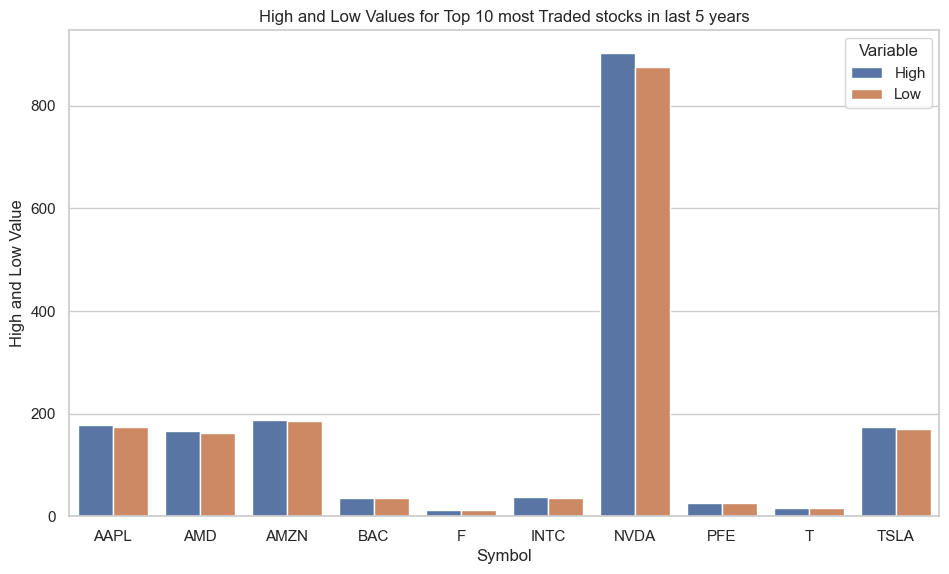

In [97]:
group_bars(top_10_traded_stocks, ['High', 'Low'])

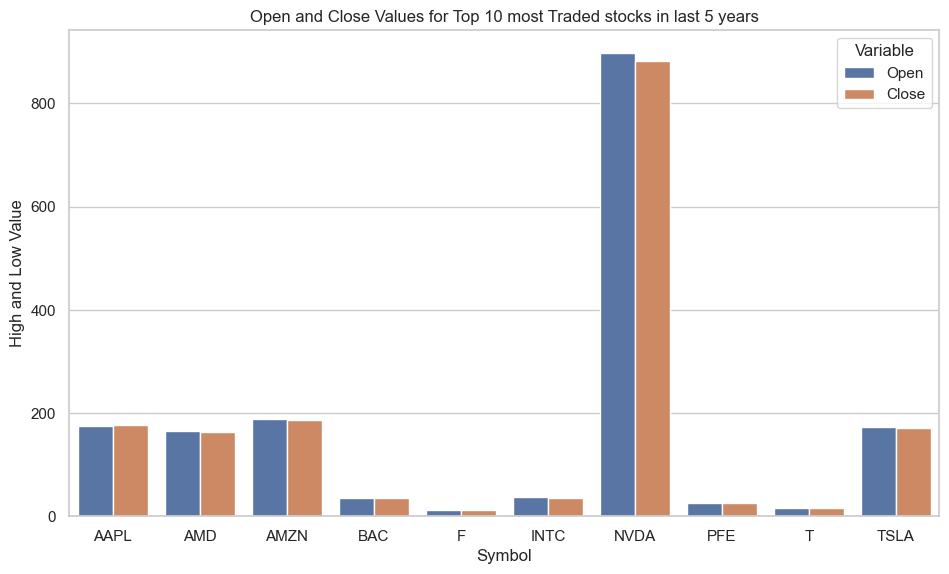

In [98]:
group_bars(top_10_traded_stocks, ['Open', 'Close'])

In [99]:
int_stock_data = last_stock.select_dtypes(include=[np.number])
corr = pd.DataFrame(int_stock_data).corr()
corr
 

Adj Close     Close      High       Low      Open    Volume  \
Adj Close          1.000000  1.000000  0.999953  0.999989  0.999934 -0.101830   
Close              1.000000  1.000000  0.999953  0.999989  0.999934 -0.101830   
High               0.999953  0.999953  1.000000  0.999974  0.999993 -0.102077   
Low                0.999989  0.999989  0.999974  1.000000  0.999965 -0.102325   
Open               0.999934  0.999934  0.999993  0.999965  1.000000 -0.102227   
Volume            -0.101830 -0.101830 -0.102077 -0.102325 -0.102227  1.000000   
PercentageChange   0.107064  0.107064  0.103722  0.106526  0.102942 -0.070428   
BigMovers         -0.070479 -0.070479 -0.067673 -0.071028 -0.068066  0.166639   

                  PercentageChange  BigMovers  
Adj Close                 0.107064  -0.070479  
Close                     0.107064  -0.070479  
High                      0.103722  -0.067673  
Low                       0.106526  -0.071028  
Open                      0.102942  -0.068066  
Volume                   -0.070428   0.166639  
PercentageChange          1.000000  -0.640437  
BigMovers                -0.640437   1.000000

<Axes: >

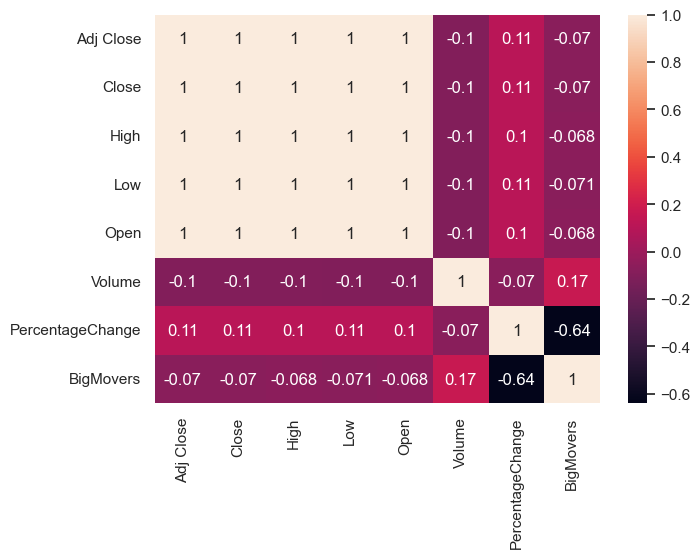

In [100]:
sns.heatmap(corr, annot=True)

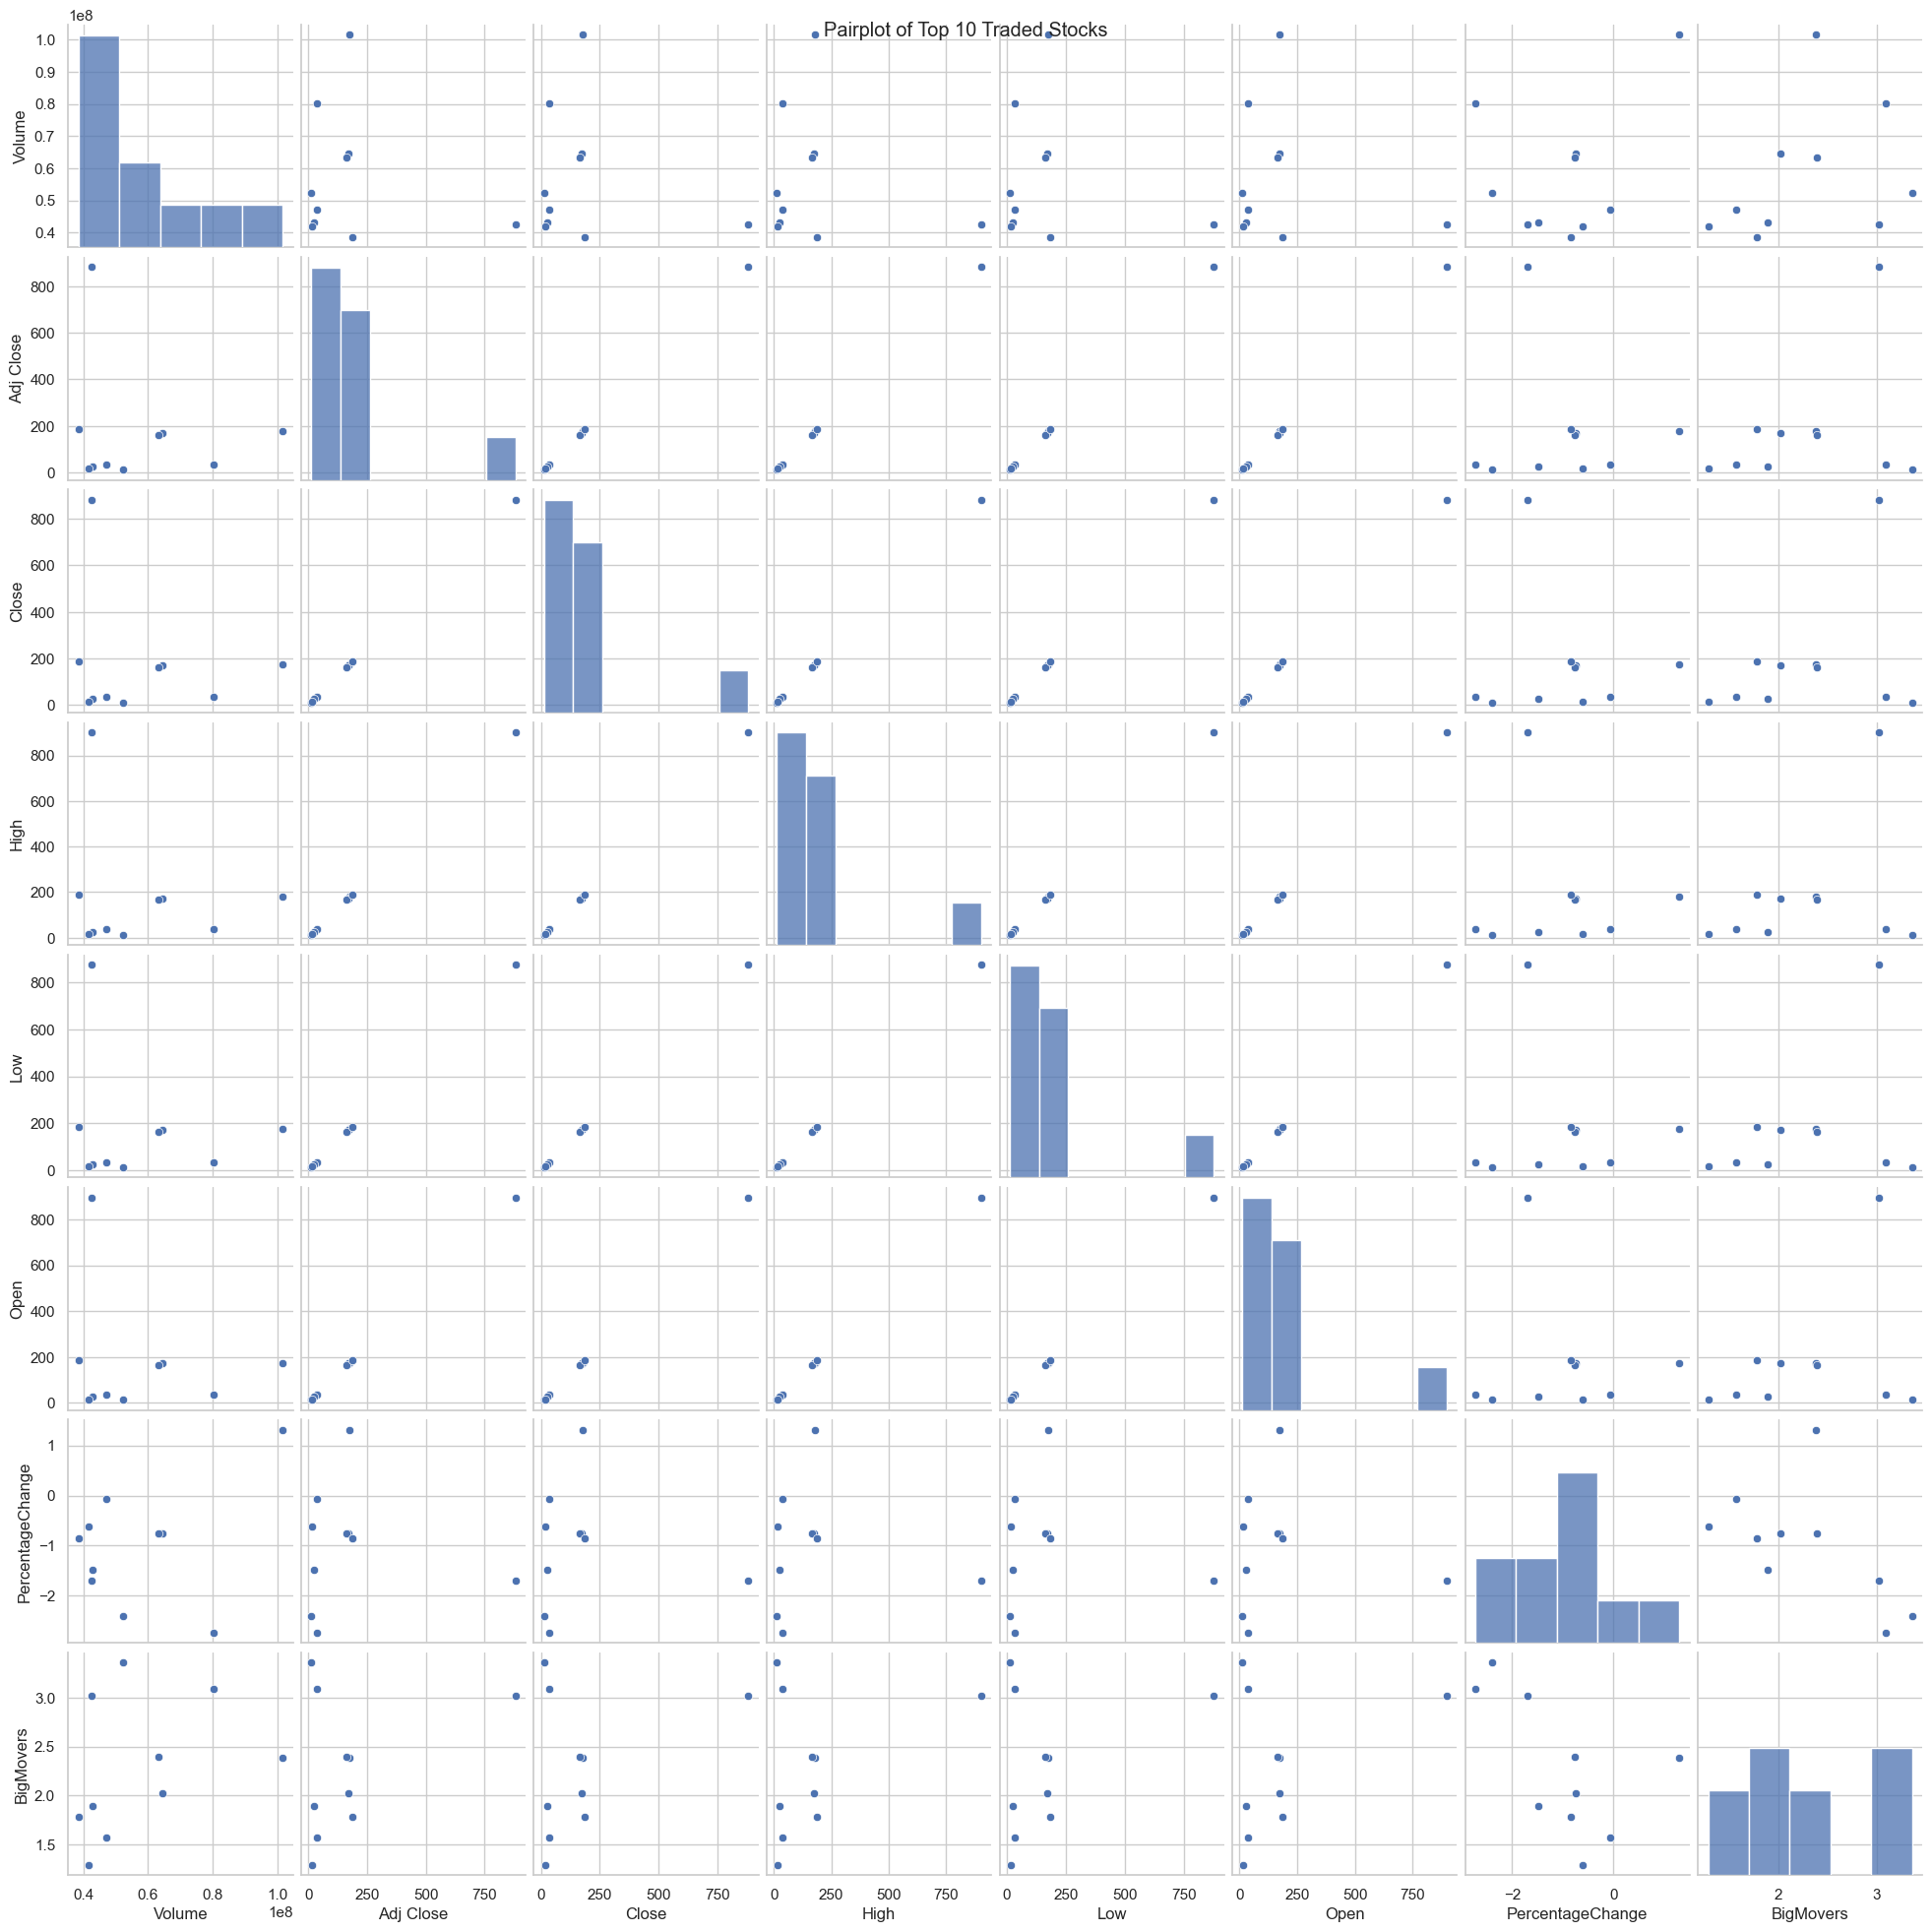

In [101]:

sns.pairplot(top_10_traded_stocks[['Volume', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'PercentageChange', 'BigMovers']])
plt.suptitle('Pairplot of Top 10 Traded Stocks')
plt.show()

Text(0, 0.5, '% of Companies')

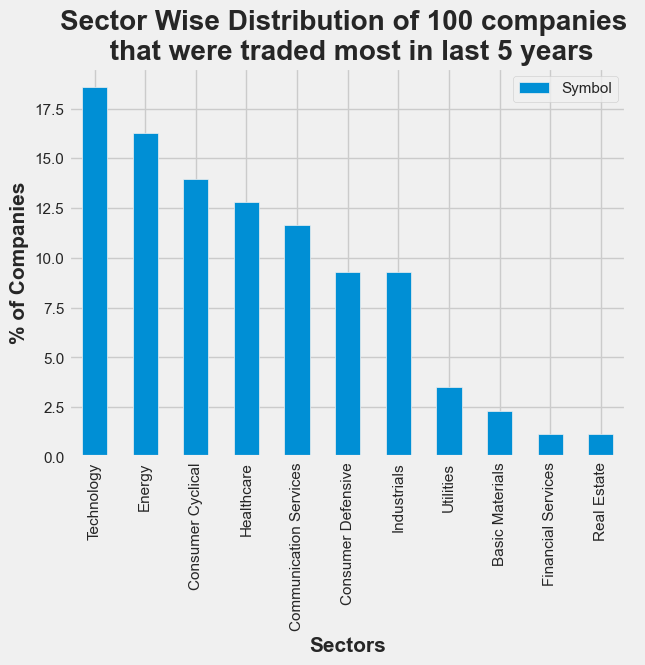

In [102]:
sp_top_stcks=df_stocks[pd.to_datetime(df_stocks['Date']).dt.year>=year-5].groupby('Symbol').agg({'Volume':'mean'}).round()
sp_top_stcks=sp_top_stcks.sort_values(['Volume'], ascending=False).head(100).apply(lambda x:x/1000000).round(2).rename(columns={'Volume':'Volume (in $M)'})
sp_top_trded=pd.merge(sp_top_stcks,df_companies, how='left', on=['Symbol'])
plt.style.use('fivethirtyeight')
sp_top_trded[['Symbol','Sector']].groupby(by='Sector').count().apply(lambda x:round(x/sum(x)*100,2)).sort_values(by='Symbol', ascending=False).plot.bar()
plt.title("Sector Wise Distribution of 100 companies \n that were traded most in last 5 years", weight='bold')
plt.xlabel('Sectors', weight='bold', fontsize=15)
plt.ylabel('% of Companies', weight='bold', fontsize=15)

In [103]:
print(sp_top_trded.columns)

Index(['Symbol', 'Volume (in $M)', 'Exchange', 'Longname', 'Sector',
       'Industry', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth',
       'City', 'State', 'Country', 'Fulltimeemployees', 'Weight'],
      dtype='object')


In [104]:
df_stocks[pd.to_datetime(df_stocks['Date']).dt.year>=year-5].head()


Date Symbol   Adj Close       Close        High         Low  \
2264  2019-01-02    MMM  139.865356  159.657196  159.690628  156.103683   
2265  2019-01-03    MMM  134.598907  153.645493  157.424744  152.918060   
2266  2019-01-04    MMM  140.136368  159.966553  160.518402  155.543472   
2267  2019-01-07    MMM  139.814102  159.598663  160.785950  157.742477   
2268  2019-01-08    MMM  140.400085  160.267563  162.299332  158.511703   

            Open     Volume  
2264  157.040131  2960339.0  
2265  157.424744  4016407.0  
2266  156.145493  3582140.0  
2267  160.000000  2585991.0  
2268  161.371231  2965841.0

In [105]:
df_companies

Exchange Symbol                             Longname  \
0        NMS   MSFT                Microsoft Corporation   
1        NMS   AAPL                           Apple Inc.   
2        NMS   NVDA                   NVIDIA Corporation   
3        NMS  GOOGL                        Alphabet Inc.   
4        NMS   GOOG                        Alphabet Inc.   
..       ...    ...                                  ...   
497      NYQ   NCLH  Norwegian Cruise Line Holdings Ltd.   
498      NYQ    MHK              Mohawk Industries, Inc.   
499      NYQ    FMC                      FMC Corporation   
500      NYQ    IVZ                         Invesco Ltd.   
502      NYQ     GL                      Globe Life Inc.   

                     Sector                            Industry  Currentprice  \
0                Technology           Software - Infrastructure        421.90   
1                Technology                Consumer Electronics        176.55   
2                Technology                      Semiconductors        881.86   
3    Communication Services      Internet Content & Information        157.73   
4    Communication Services      Internet Content & Information        159.19   
..                      ...                                 ...           ...   
497       Consumer Cyclical                     Travel Services         17.77   
498       Consumer Cyclical  Furnishings, Fixtures & Appliances        113.17   
499         Basic Materials                 Agricultural Inputs         56.75   
500      Financial Services                    Asset Management         15.34   
502      Financial Services                    Insurance - Life         59.09   

         Marketcap        Ebitda  Revenuegrowth           City State  \
0    3134902501376  1.184270e+11          0.176        Redmond    WA   
1    2726267453440  1.301090e+11          0.021      Cupertino    CA   
2    2204649914368  3.448000e+10          2.653    Santa Clara    CA   
3    1969385111552  1.001720e+11          0.135  Mountain View    CA   
4    1969275797504  1.001720e+11          0.135  Mountain View    CA   
..             ...           ...            ...            ...   ...   
497     7563924992  1.813769e+09          0.308          Miami    FL   
498     7227386880  1.444173e+09         -0.014        Calhoun    GA   
499     7083364864  8.635000e+08         -0.293   Philadelphia    PA   
500     6896572416  1.018500e+09         -0.021        Atlanta    GA   
502     5556640256  1.318482e+09          0.060       McKinney    TX   

           Country  Fulltimeemployees    Weight  
0    United States           221000.0  0.065663  
1    United States           161000.0  0.057104  
2    United States            29600.0  0.046178  
3    United States           182502.0  0.041250  
4    United States           182502.0  0.041248  
..             ...                ...       ...  
497  United States            41000.0  0.000158  
498  United States            43300.0  0.000151  
499  United States             6600.0  0.000148  
500  United States             8489.0  0.000144  
502  United States             3636.0  0.000116  

[449 rows x 14 columns]

Analysis, hypothesis testing, & ML


In [106]:
# close_df = pd.DataFrame({'column1': d['column_a'], 
#                        'column2': df2['column_b'], 
#                        'column3': df1['column_c'] + df2['column_d']})

In [107]:
df_stocks["Symbol"].unique()

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP',
       'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI',
       'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM',
       'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB',
       'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX',
       'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG',
       'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR',
       'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
       'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC',
       'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB',
       'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME',
       'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED',
  

In [108]:
def df_format(df):
    # Get unique symbols
    unique_symbols = df_stocks['Symbol'].unique()
    
    # Create a dictionary to store dataframes for each symbol
    symbol_dataframes = {}
    
    # Iterate over each unique symbol
    for symbol in unique_symbols:
        # Filter the dataframe for the current symbol
        symbol_df = df[df['Symbol'] == symbol]
        
        # Add the filtered dataframe to the dictionary
        symbol_dataframes[symbol] = symbol_df[['Date', 'Close']]
    
    return symbol_dataframes    

In [109]:
new_df = df_format(df_stocks)
print(new_df)

{'MMM':             Date      Close
0     2010-01-04  69.414719
1     2010-01-05  68.979935
2     2010-01-06  69.958191
3     2010-01-07  70.008362
4     2010-01-08  70.501671
...          ...        ...
3588  2024-04-08  91.930000
3589  2024-04-09  92.610001
3590  2024-04-10  92.629997
3591  2024-04-11  93.180000
3592  2024-04-12  91.309998

[3593 rows x 2 columns], 'AOS':             Date      Close
3593  2010-01-04   7.435000
3594  2010-01-05   7.340000
3595  2010-01-06   7.343333
3596  2010-01-07   7.365000
3597  2010-01-08   7.473333
...          ...        ...
7181  2024-04-08  86.970001
7182  2024-04-09  86.470001
7183  2024-04-10  85.529999
7184  2024-04-11  86.150002
7185  2024-04-12  86.500000

[3593 rows x 2 columns], 'ABT':              Date       Close
7186   2010-01-04   26.129908
7187   2010-01-05   25.918797
7188   2010-01-06   26.062737
7189   2010-01-07   26.278646
7190   2010-01-08   26.412991
...           ...         ...
10774  2024-04-08  110.519997
10775  2024-04

In [110]:
top_comp = pd.DataFrame()
top_comp['Symbol'] = df_companies['Symbol']  
top_comp['MarketCap'] = df_companies['Currentprice'] * df_companies['Marketcap']
top_comp['RevenueGrowthRate'] = df_companies['Revenuegrowth'] * 100
top_comp['RevenueGrowthRank'] = top_comp['RevenueGrowthRate'].rank(ascending=False)
top_comp['MarketCapRank'] = top_comp['MarketCap'].rank(ascending=False)
top_comp['CompositeScore'] = (top_comp['MarketCapRank'] + top_comp['RevenueGrowthRank']) / 2
top_20_stocks = top_comp.sort_values(by='CompositeScore').head(20)
top_20_stocks

Symbol     MarketCap  RevenueGrowthRate  RevenueGrowthRank  MarketCapRank  \
2     NVDA  1.944193e+15              265.3                1.0            1.0   
8      LLY  5.371473e+14               28.1               18.5            5.0   
6     META  6.680515e+14               24.7               24.0            4.0   
44    INTU  1.080096e+14               41.0                9.0           23.0   
49     NOW  1.213633e+14               25.6               22.0           20.0   
164   SMCI  4.726682e+13              103.2                3.0           43.0   
7    BRK-B  3.514172e+14               19.6               37.0            9.0   
137    TDG  8.281598e+13               28.1               18.5           29.0   
76    BKNG  4.262358e+14               18.2               42.5            7.0   
0     MSFT  1.322615e+15               17.6               49.0            2.0   
9     AVGO  8.371812e+14               16.4               55.0            3.0   
105   SNPS  4.735381e+13               21.1               32.0           42.0   
111    CMG  2.398642e+14               15.4               65.5           12.0   
5     AMZN  3.603951e+14               13.9               78.5            8.0   
16     UNH  1.778380e+14               14.1               75.5           16.0   
4     GOOG  3.134890e+14               13.5               82.0           10.0   
63    ISRG  5.248363e+13               16.5               54.0           38.0   
58    AMGN  3.828530e+13               19.8               35.5           57.0   
3    GOOGL  3.106311e+14               13.5               82.0           11.0   
124   EQIX  5.523736e+13               15.4               65.5           37.0   

     CompositeScore  
2              1.00  
8             11.75  
6             14.00  
44            16.00  
49            21.00  
164           23.00  
7             23.00  
137           23.75  
76            24.75  
0             25.50  
9             29.00  
105           37.00  
111           38.75  
5             43.25  
16            45.75  
4             46.00  
63            46.00  
58            46.25  
3             46.50  
124           51.25

In [111]:
df_companies.columns

Index(['Exchange', 'Symbol', 'Longname', 'Sector', 'Industry', 'Currentprice',
       'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State', 'Country',
       'Fulltimeemployees', 'Weight'],
      dtype='object')

In [112]:
comp = top_20_stocks['Symbol'].unique()

In [113]:
comp

array(['NVDA', 'LLY', 'META', 'INTU', 'NOW', 'SMCI', 'BRK-B', 'TDG',
       'BKNG', 'MSFT', 'AVGO', 'SNPS', 'CMG', 'AMZN', 'UNH', 'GOOG',
       'ISRG', 'AMGN', 'GOOGL', 'EQIX'], dtype=object)

In [114]:
def new_dfs(df_stocks, symbol):
    symbol_dfs = df_stocks[df_stocks['Symbol'] == symbol][['Date','Close']].copy()
    return symbol_dfs
            

In [115]:
df_nvda = new_dfs(df_stocks,"NVDA")
df_lly = new_dfs(df_stocks,"LLY")
df_meta = new_dfs(df_stocks,"META")
df_intu = new_dfs(df_stocks,"INTU")
df_now = new_dfs(df_stocks,"NOW")
df_smci = new_dfs(df_stocks,"SMCI")
df_brk_b = new_dfs(df_stocks,"BRK-B")
df_tdg = new_dfs(df_stocks,"TDG")
df_bkng = new_dfs(df_stocks,"BKNG")
df_msft = new_dfs(df_stocks,"MSFT")
df_avgo = new_dfs(df_stocks,"AVGO")
df_snps = new_dfs(df_stocks,"SNPS")
df_cmg = new_dfs(df_stocks,"CMG")
df_amzn = new_dfs(df_stocks,"AMZN")
df_unh = new_dfs(df_stocks,"UNH")
df_goog = new_dfs(df_stocks,"GOOG")
df_isrg = new_dfs(df_stocks,"ISRG")
df_amgn = new_dfs(df_stocks,"AMGN")
df_googl = new_dfs(df_stocks,"GOOGL")
df_eqix = new_dfs(df_stocks,"EQIX")


dfs_array = [
    df_nvda, df_lly, df_meta, df_intu, df_now,
    df_smci, df_brk_b, df_tdg, df_bkng, df_msft,
    df_avgo, df_snps, df_cmg, df_amzn, df_unh,
    df_goog, df_isrg, df_amgn, df_googl, df_eqix
]
dfs_array[0].name = "NVDA"
dfs_array[1].name = "LLY"
dfs_array[2].name = "META"
dfs_array[3].name = "INTU"
dfs_array[4].name = "NOW"
dfs_array[5].name = "SMCI"
dfs_array[6].name = "BRK_B"
dfs_array[7].name = "TDG"
dfs_array[8].name = "BKNG"
dfs_array[9].name = "MSFT"
dfs_array[10].name = "AVGO"
dfs_array[11].name = "SNPS"
dfs_array[12].name = "CMG"
dfs_array[13].name = "AMZN"
dfs_array[14].name = "UNH"
dfs_array[15].name = "GOOG"
dfs_array[16].name = "ISRG"
dfs_array[17].name = "AMGN"
dfs_array[18].name = "GOOGL"
dfs_array[19].name = "EQIX"
dfs_array

[               Date       Close
 1253957  2010-01-04    4.622500
 1253958  2010-01-05    4.690000
 1253959  2010-01-06    4.720000
 1253960  2010-01-07    4.627500
 1253961  2010-01-08    4.637500
 ...             ...         ...
 1257545  2024-04-08  871.330017
 1257546  2024-04-09  853.539978
 1257547  2024-04-10  870.390015
 1257548  2024-04-11  906.159973
 1257549  2024-04-12  881.859985
 
 [3593 rows x 2 columns],
               Date       Close
 607217  2010-01-04   35.820000
 607218  2010-01-05   35.189999
 607219  2010-01-06   35.450001
 607220  2010-01-07   35.270000
 607221  2010-01-08   35.000000
 ...            ...         ...
 610805  2024-04-08  777.289978
 610806  2024-04-09  757.239990
 610807  2024-04-10  761.979980
 610808  2024-04-11  759.590027
 610809  2024-04-12  751.640015
 
 [3593 rows x 2 columns],
                Date       Close
 1125208  2012-05-18   38.230000
 1125209  2012-05-21   34.029999
 1125210  2012-05-22   31.000000
 1125211  2012-05-23   32.000000

In [116]:
def str_to_datetime(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d")

In [117]:
for co in dfs_array:
    co['Date'] = co['Date'].apply(str_to_datetime)
    co.set_index('Date', inplace=True)


In [118]:
dfs_array[0].head()

Close
Date              
2010-01-04  4.6225
2010-01-05  4.6900
2010-01-06  4.7200
2010-01-07  4.6275
2010-01-08  4.6375

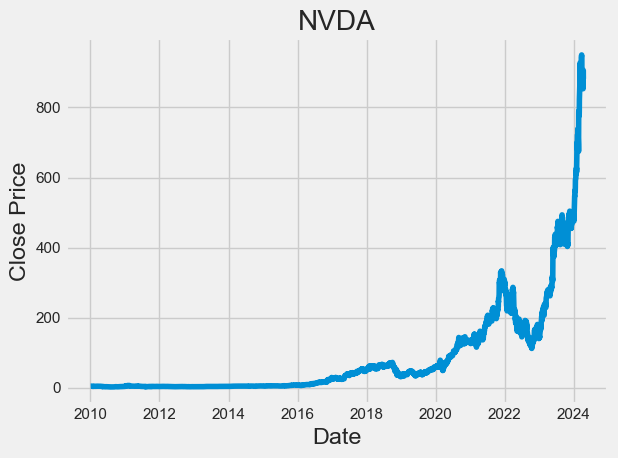

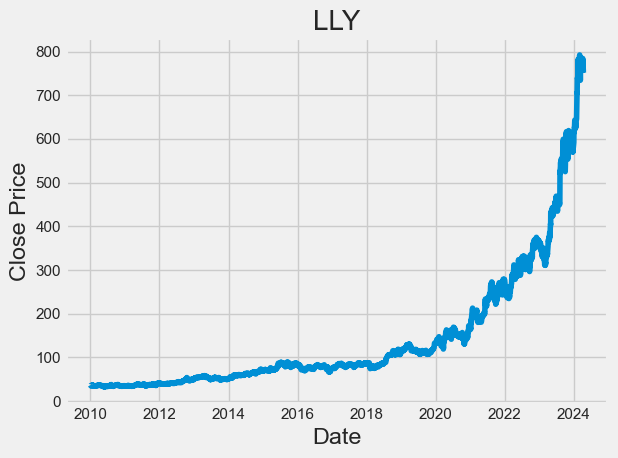

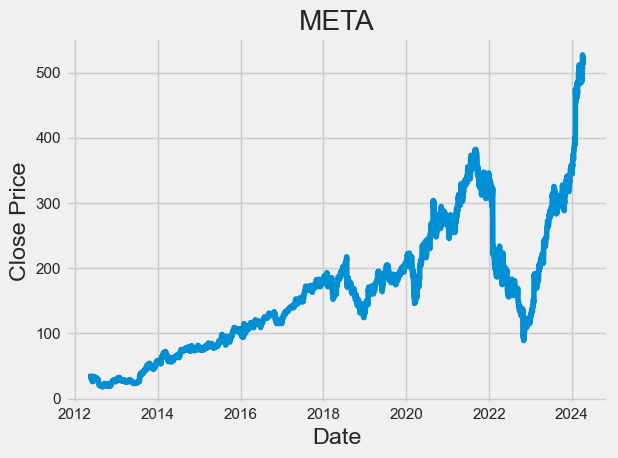

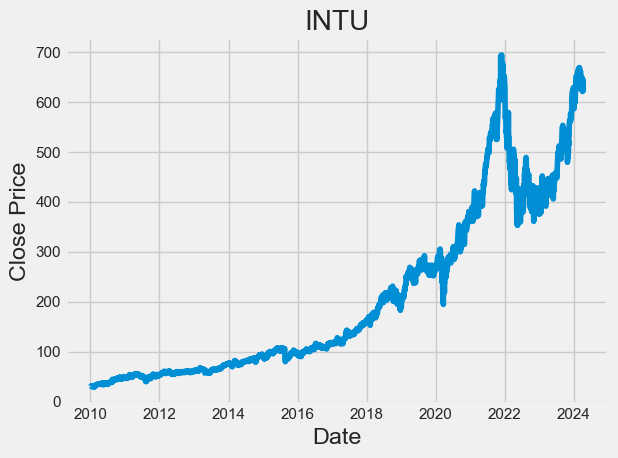

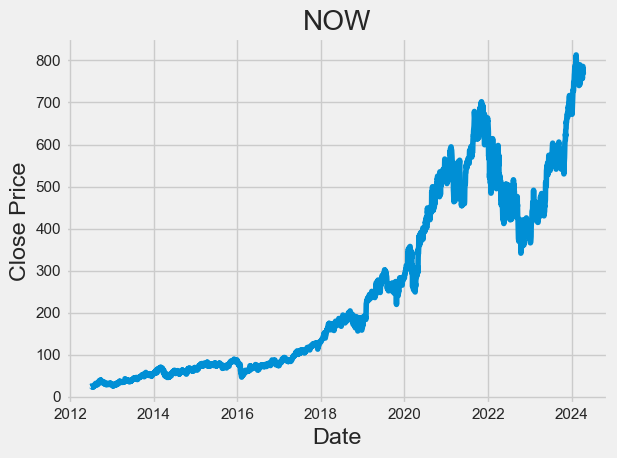

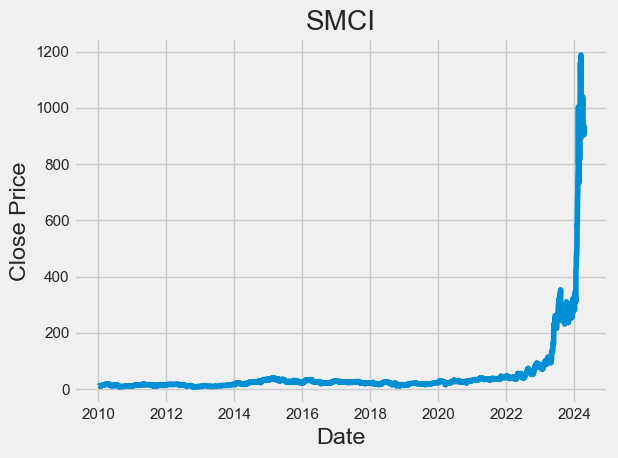

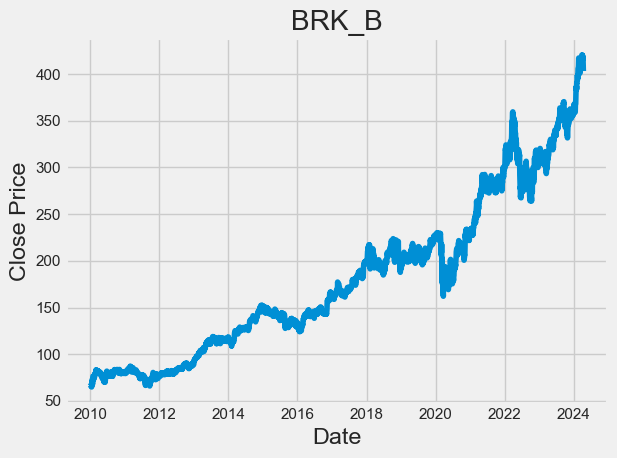

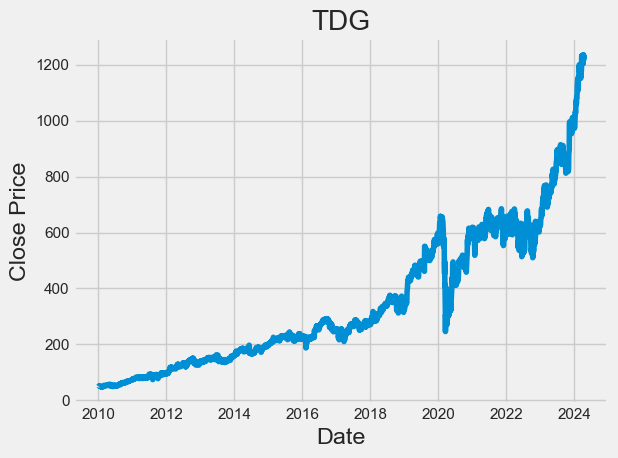

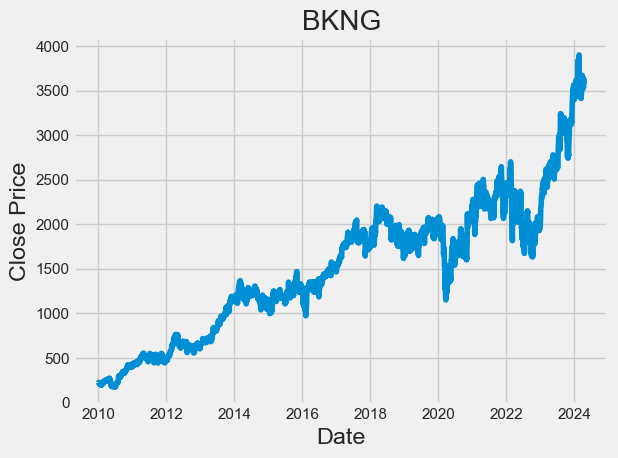

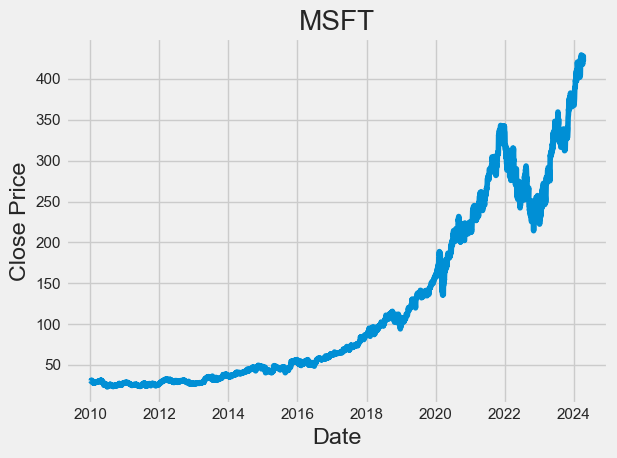

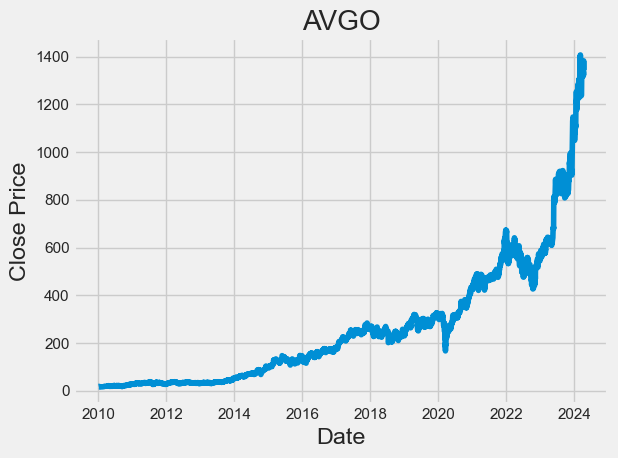

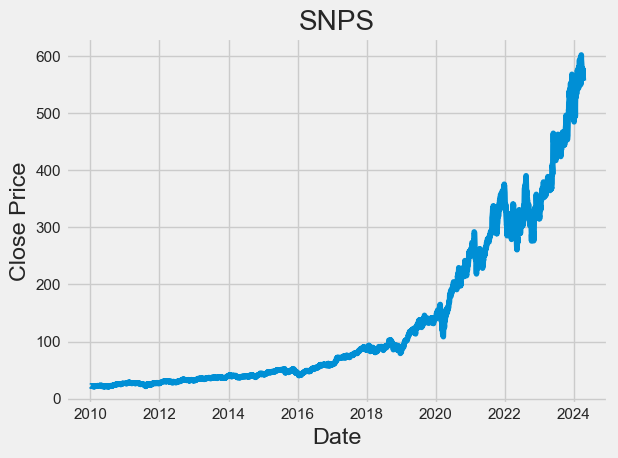

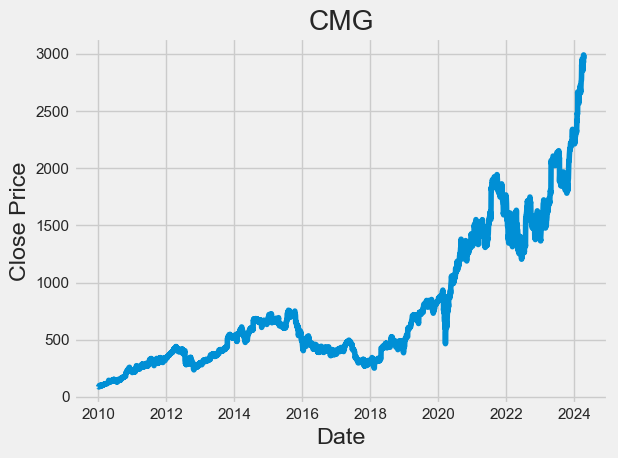

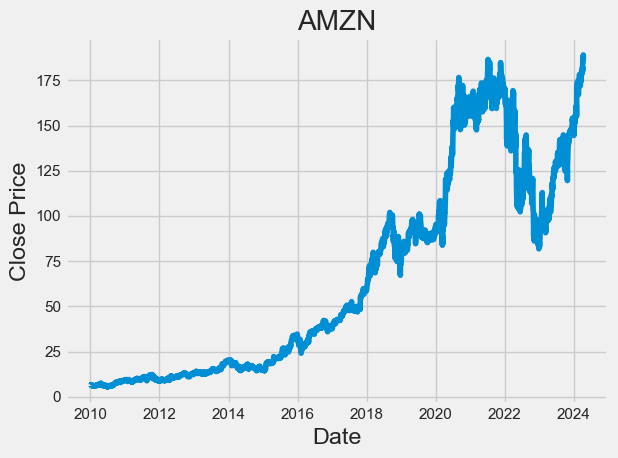

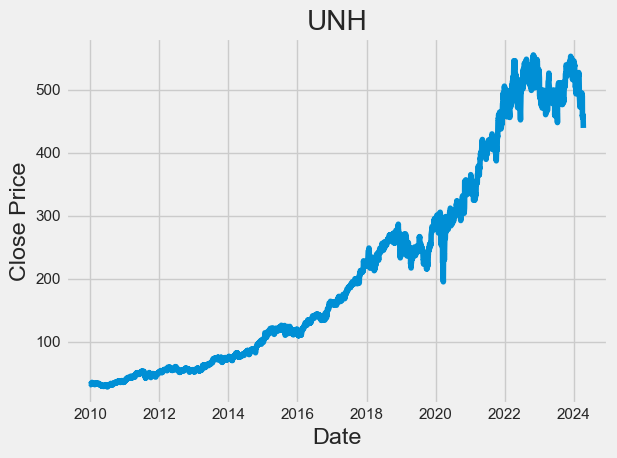

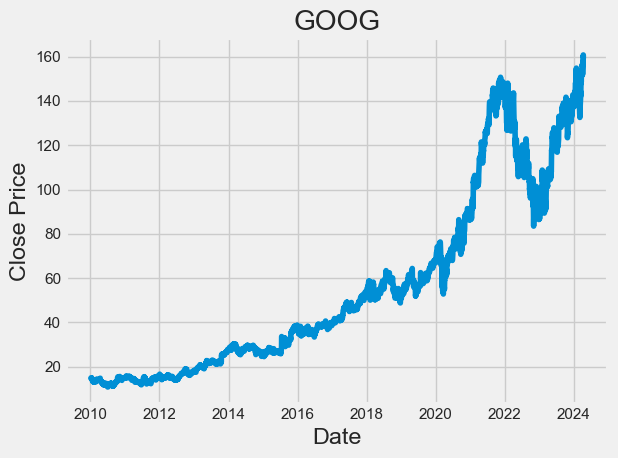

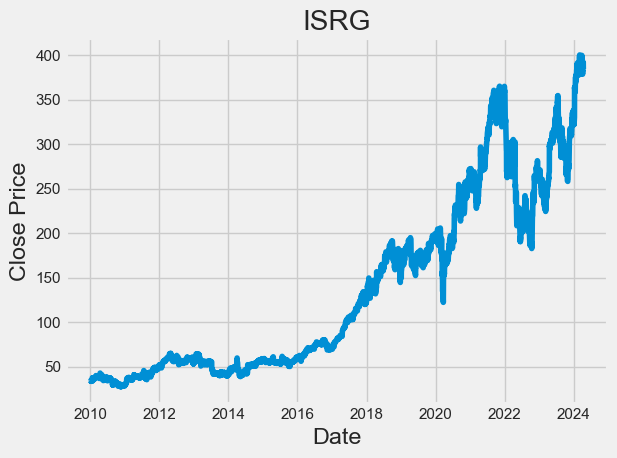

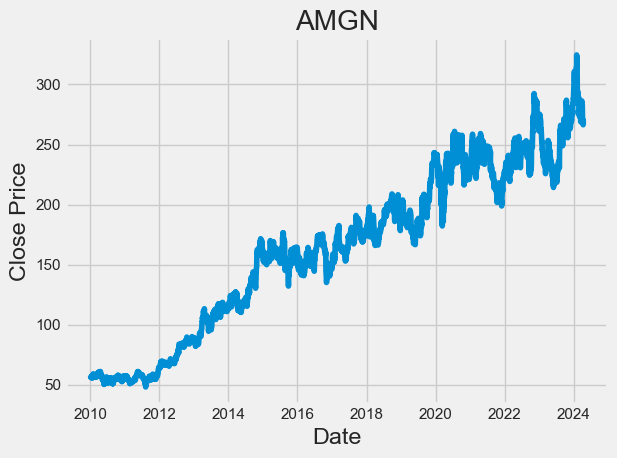

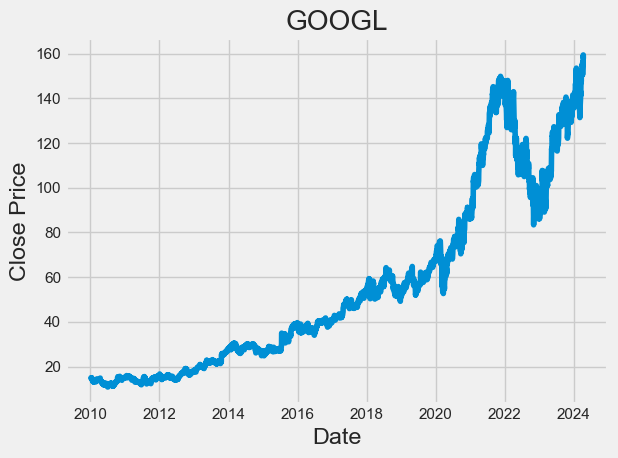

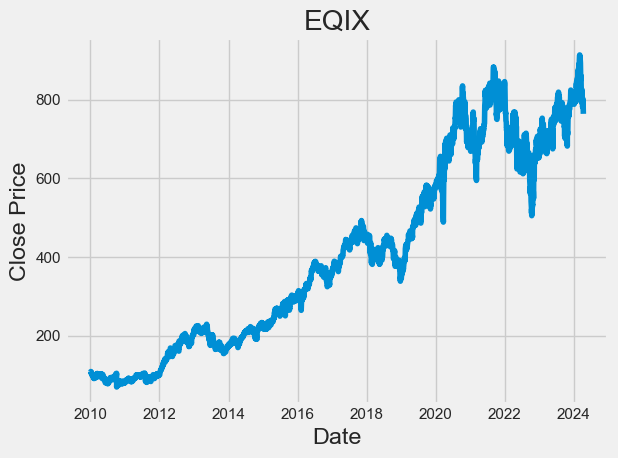

In [119]:

for i, df in enumerate(dfs_array):
    plt.figure()  # Create a new figure for each plot
    plt.plot(df.index, df['Close'])
    plt.title(df.name if hasattr(df, 'name') else f'DataFrame {i}')  # Set the title to the name of the company or DataFrame index
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [120]:
print(dfs_array[1].name)
dfs_array[1]

LLY


Close
Date                  
2010-01-04   35.820000
2010-01-05   35.189999
2010-01-06   35.450001
2010-01-07   35.270000
2010-01-08   35.000000
...                ...
2024-04-08  777.289978
2024-04-09  757.239990
2024-04-10  761.979980
2024-04-11  759.590027
2024-04-12  751.640015

[3593 rows x 1 columns]

In [121]:
rows_with_lly = df_stocks[df_stocks["Symbol"] == "LLY"]
print(rows_with_lly)

              Date Symbol   Adj Close       Close        High         Low  \
607217  2010-01-04    LLY   23.775993   35.820000   36.349998   35.770000   
607218  2010-01-05    LLY   23.357826   35.189999   35.910000   34.930000   
607219  2010-01-06    LLY   23.530397   35.450001   35.529999   35.240002   
607220  2010-01-07    LLY   23.410925   35.270000   35.560001   35.150002   
607221  2010-01-08    LLY   23.231716   35.000000   35.279999   34.840000   
...            ...    ...         ...         ...         ...         ...   
610805  2024-04-08    LLY  777.289978  777.289978  785.200012  773.349976   
610806  2024-04-09    LLY  757.239990  757.239990  777.820007  750.650024   
610807  2024-04-10    LLY  761.979980  761.979980  765.260010  746.830017   
610808  2024-04-11    LLY  759.590027  759.590027  763.330017  750.669983   
610809  2024-04-12    LLY  751.640015  751.640015  763.500000  749.789978   

              Open     Volume  
607217   35.770000  6067100.0  
607218   35

In [122]:
def df_to_windowed_df(dataframe, dataframe_name, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    while target_date <= last_date:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Warning: Window of size {n} is too large for date {target_date} in DataFrame {dataframe_name}')
            target_date += datetime.timedelta(days=1)
            continue

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        target_date += datetime.timedelta(days=1)

    ret_df = pd.DataFrame({'Target Date': dates})

    for i in range(n):
        ret_df[f'Target-{n-i}'] = np.array(X)[:, i]

    ret_df['Target'] = Y
    ret_df.name = dataframe_name
    return ret_df


In [123]:
for i, df in enumerate(dfs_array):
    print(df.name)
    dfs_array[i] = df_to_windowed_df(df,df.name ,'2010-01-04', '2024-05-25')
    print(dfs_array[i].head(2))

NVDA
  Target Date  Target-3  Target-2  Target-1  Target
0  2010-01-07    4.6225      4.69    4.7200  4.6275
1  2010-01-08    4.6900      4.72    4.6275  4.6375
LLY
  Target Date   Target-3   Target-2   Target-1  Target
0  2010-01-07  35.820000  35.189999  35.450001   35.27
1  2010-01-08  35.189999  35.450001  35.270000   35.00
META
  Target Date   Target-3   Target-2  Target-1     Target
0  2012-05-23  38.230000  34.029999      31.0  32.000000
1  2012-05-24  34.029999  31.000000      32.0  33.029999
INTU
  Target Date   Target-3   Target-2   Target-1     Target
0  2010-01-07  30.809999  30.809999  30.379999  30.280001
1  2010-01-08  30.809999  30.379999  30.280001  31.080000
NOW
  Target Date  Target-3   Target-2   Target-1     Target
0  2012-07-05     24.60  24.770000  25.309999  25.959999
1  2012-07-06     24.77  25.309999  25.959999  25.840000
SMCI
  Target Date  Target-3  Target-2  Target-1  Target
0  2010-01-07     11.52     11.27     11.49   11.57
1  2010-01-08     11.27     11.

In [124]:
dfs_array[1].head()

Target Date   Target-3   Target-2   Target-1  Target
0  2010-01-07  35.820000  35.189999  35.450001   35.27
1  2010-01-08  35.189999  35.450001  35.270000   35.00
2  2010-01-09  35.189999  35.450001  35.270000   35.00
3  2010-01-10  35.189999  35.450001  35.270000   35.00
4  2010-01-11  35.450001  35.270000  35.000000   35.48

In [125]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)



In [126]:
result_list = []

for df in dfs_array:
    dates, X, y = windowed_df_to_date_X_y(df)
    result_list.append({'name': df.name, 'dates': dates, 'X': X, 'y': y})

In [127]:
result_list[0]

{'name': 'NVDA',
 'dates': array([Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-08 00:00:00'),
        Timestamp('2010-01-09 00:00:00'), ...,
        Timestamp('2024-05-23 00:00:00'), Timestamp('2024-05-24 00:00:00'),
        Timestamp('2024-05-25 00:00:00')], dtype=object),
 'X': array([[[  4.6225],
         [  4.69  ],
         [  4.72  ]],
 
        [[  4.69  ],
         [  4.72  ],
         [  4.6275]],
 
        [[  4.69  ],
         [  4.72  ],
         [  4.6275]],
 
        ...,
 
        [[853.54  ],
         [870.39  ],
         [906.16  ]],
 
        [[853.54  ],
         [870.39  ],
         [906.16  ]],
 
        [[853.54  ],
         [870.39  ],
         [906.16  ]]], dtype=float32),
 'y': array([  4.6275,   4.6375,   4.6375, ..., 881.86  , 881.86  , 881.86  ],
       dtype=float32)}

In [128]:
def train(dates, X, y, name ):
    q_80 = int(len(dates) * .8)
    q_90 = int(len(dates) * .9)
    
    dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
    dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
    dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
    
    plt.figure()  # Create a new figure for each iteration
    plt.plot(dates_train, y_train)
    plt.title(f"Training Data for {name}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure()  # Create a new figure for each iteration
    plt.plot(dates_val, y_val)
    plt.title(f"Validation Data for {name}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure()  # Create a new figure for each iteration
    plt.plot(dates_test, y_test)
    plt.title(f"Test Data for {name}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return dates_val, X_val, y_val, dates_test, X_test, y_test


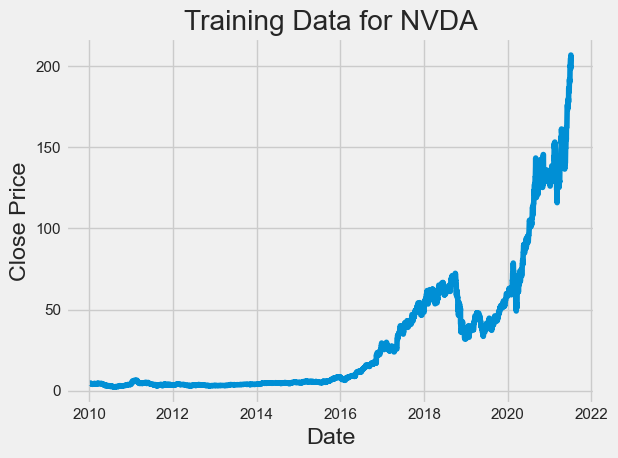

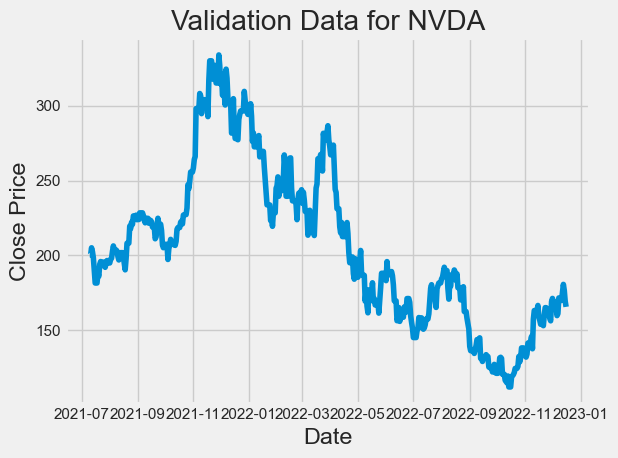

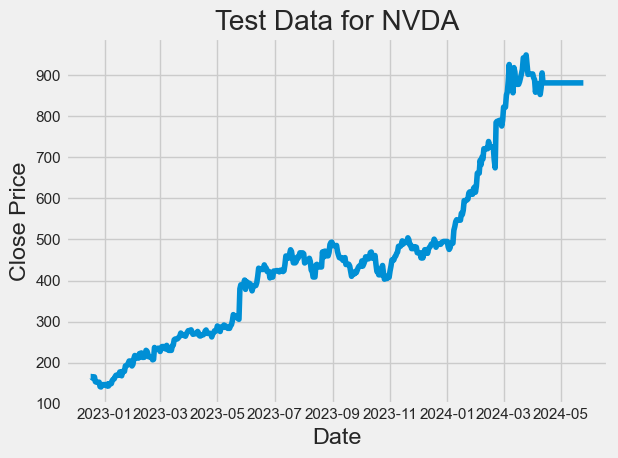

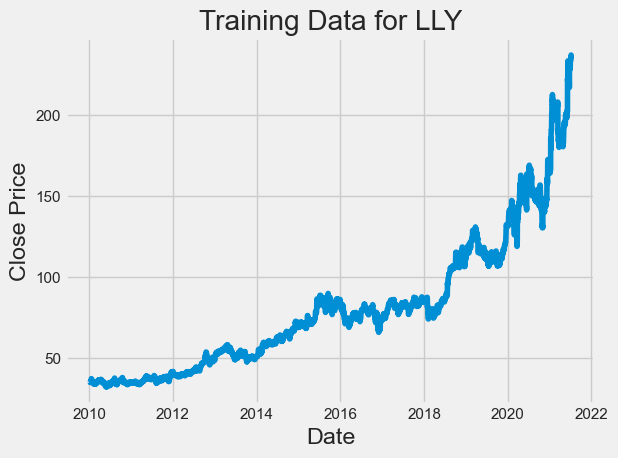

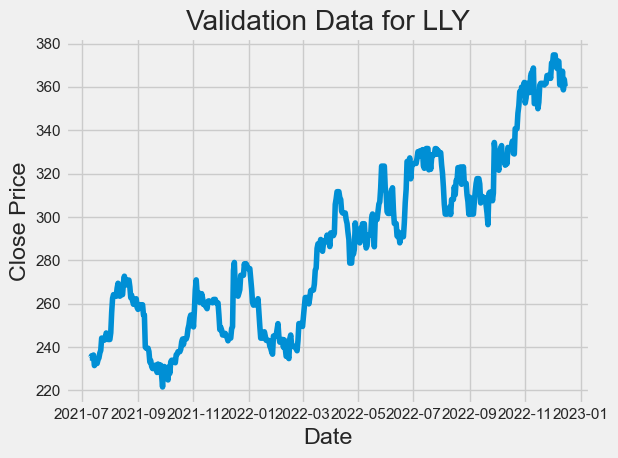

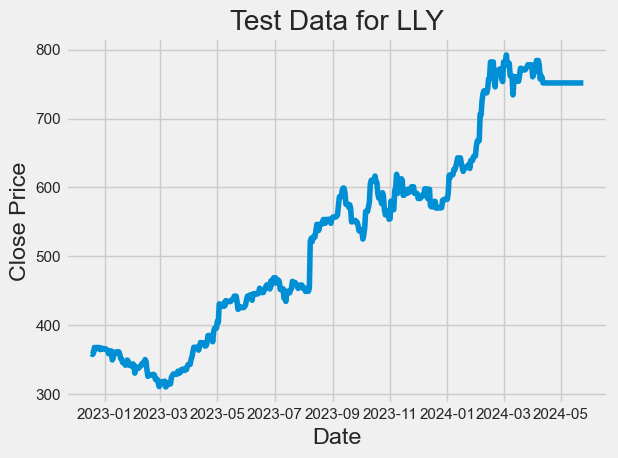

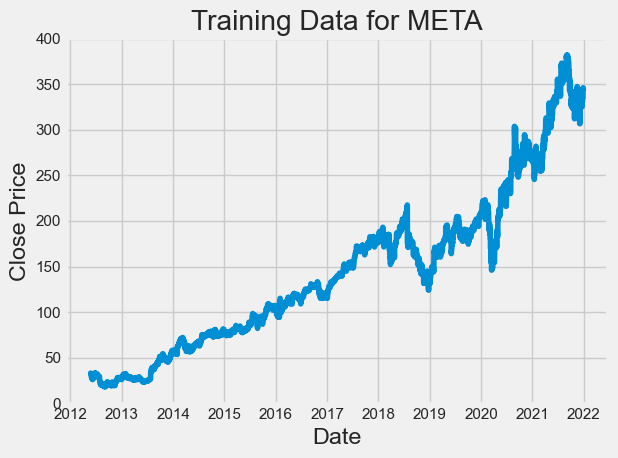

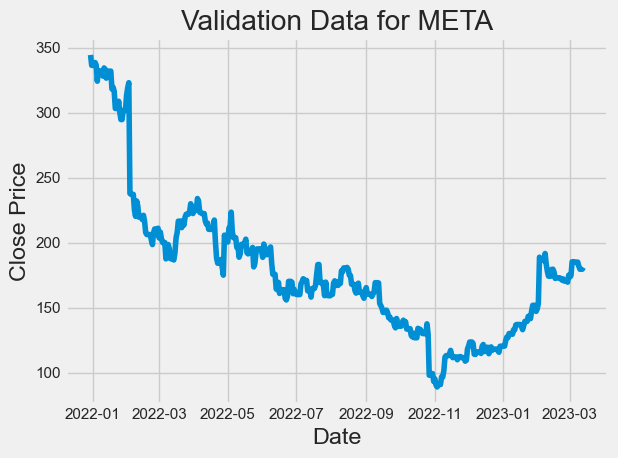

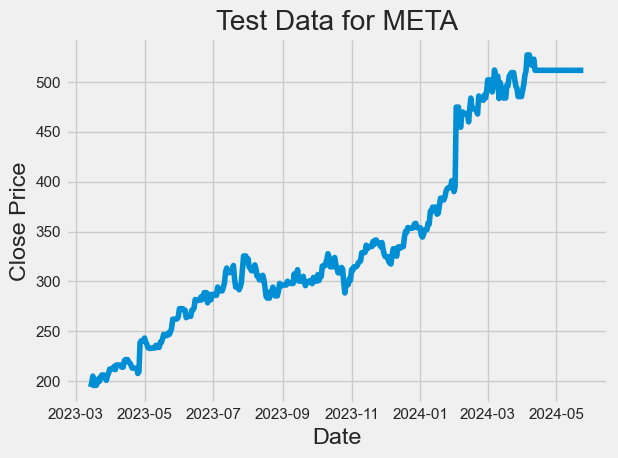

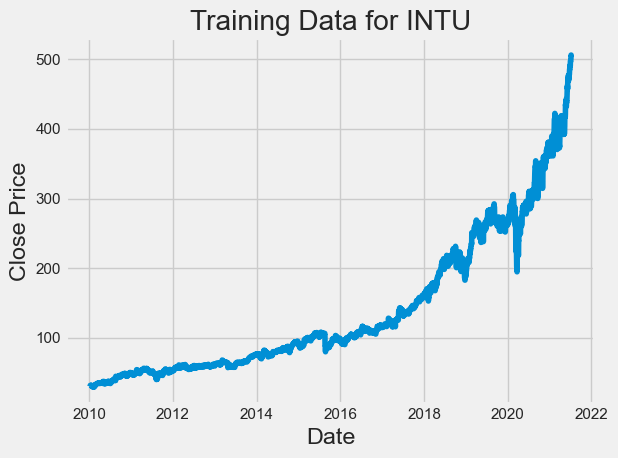

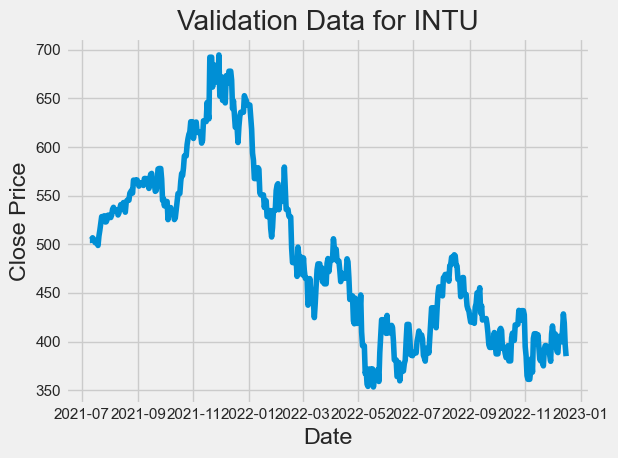

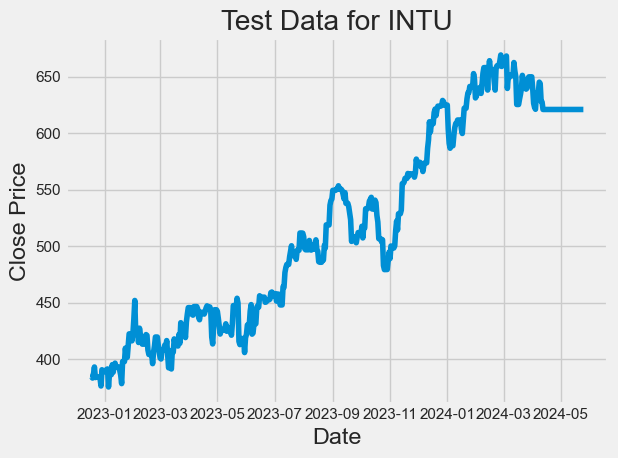

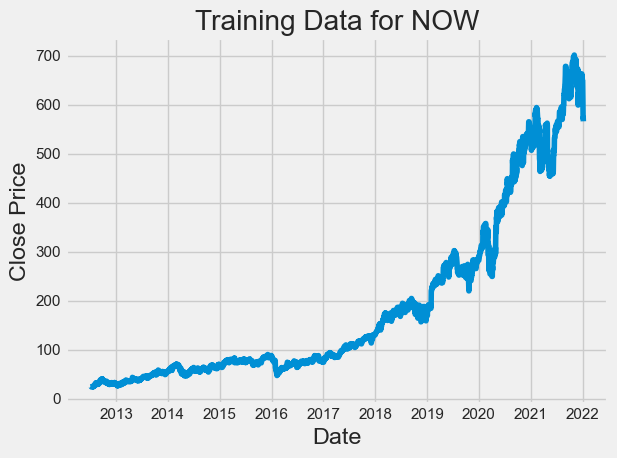

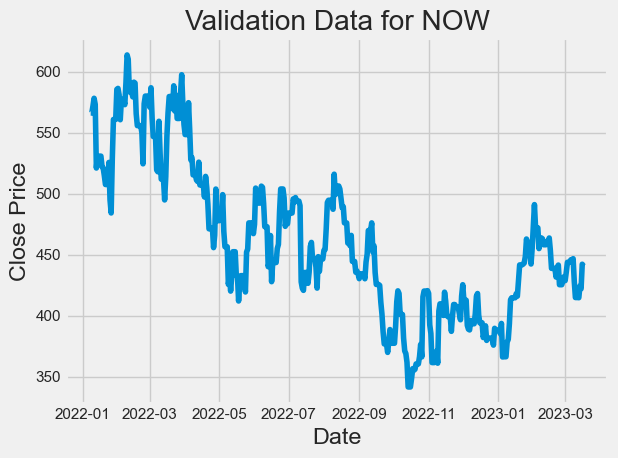

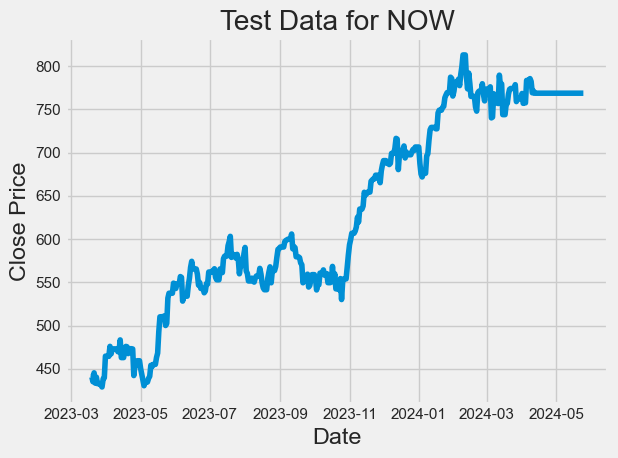

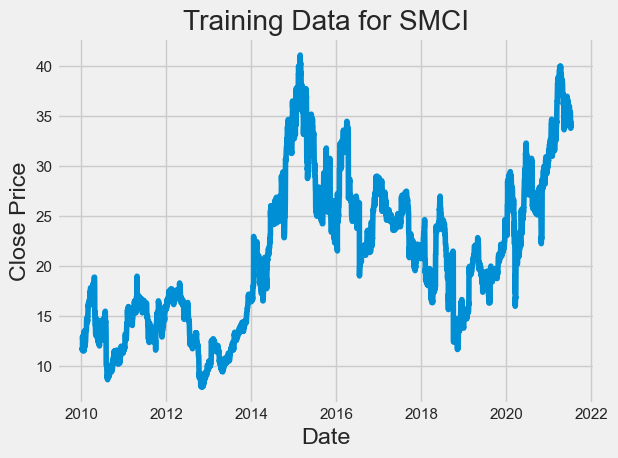

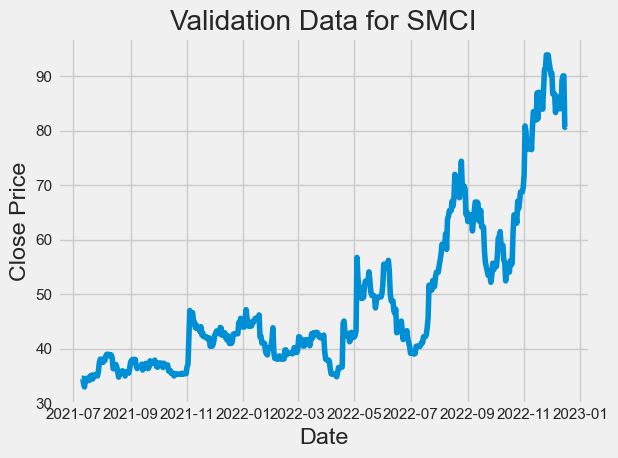

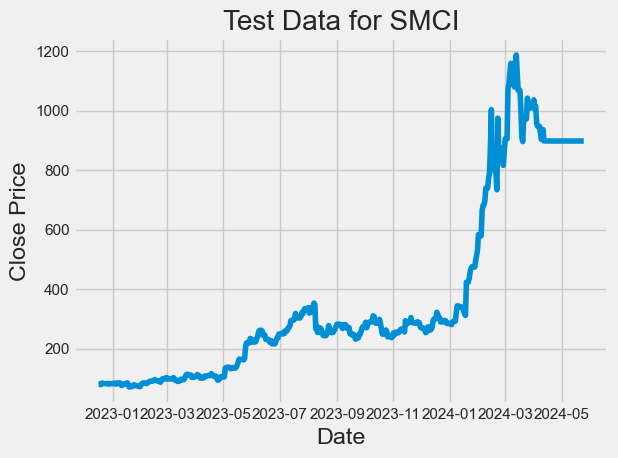

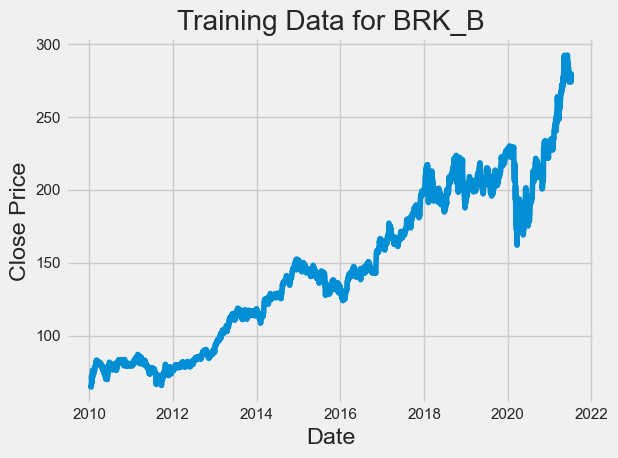

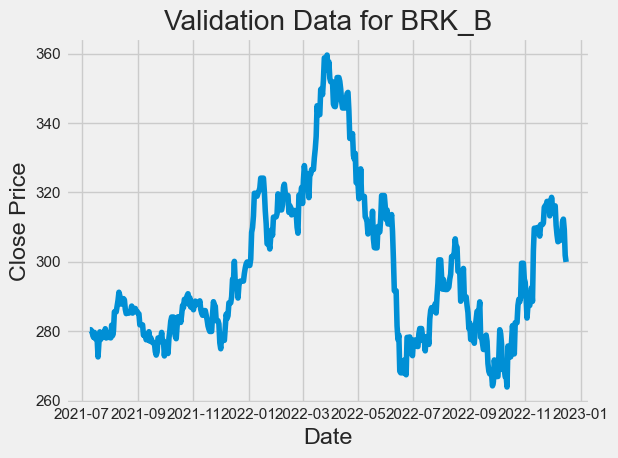

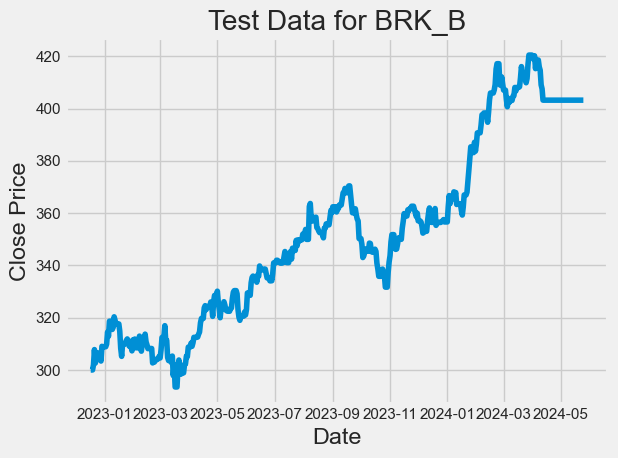

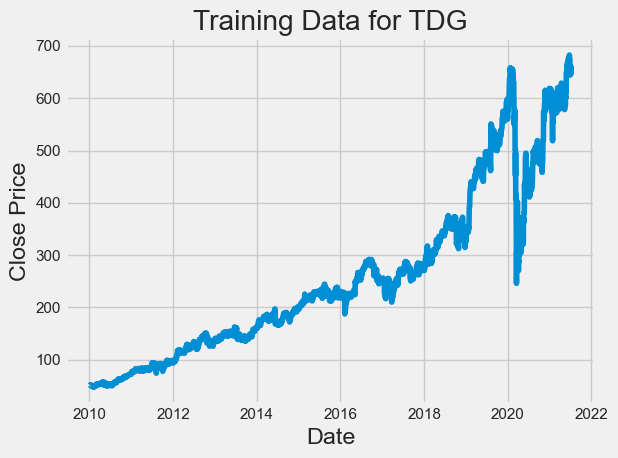

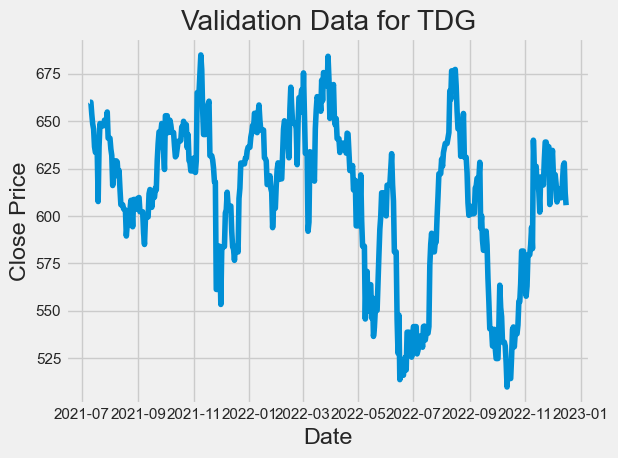

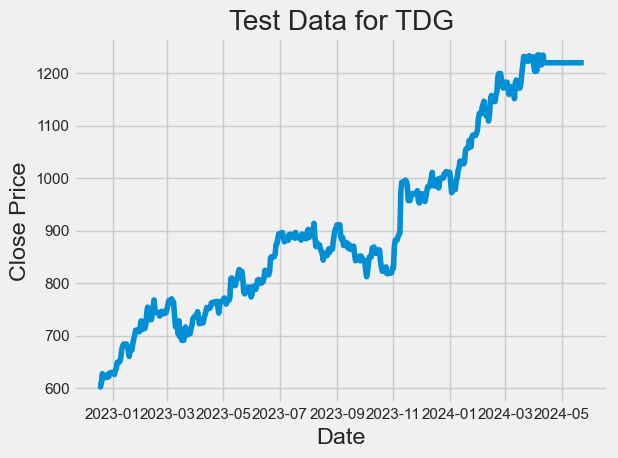

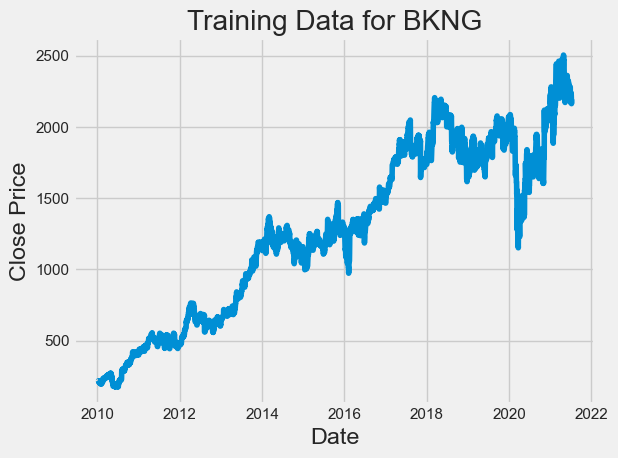

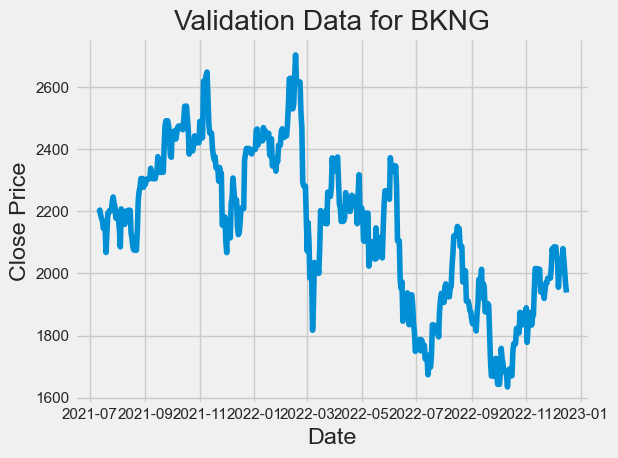

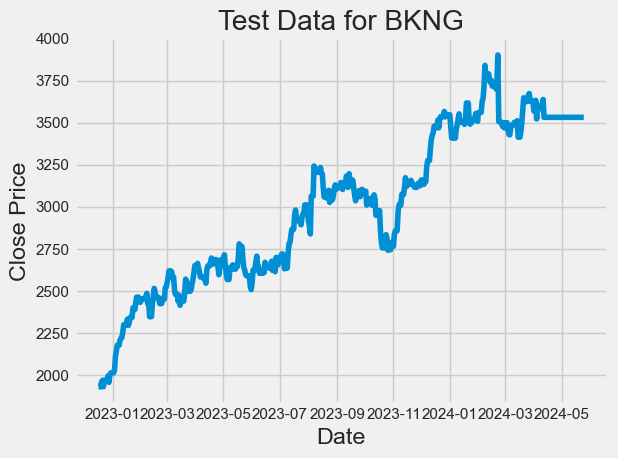

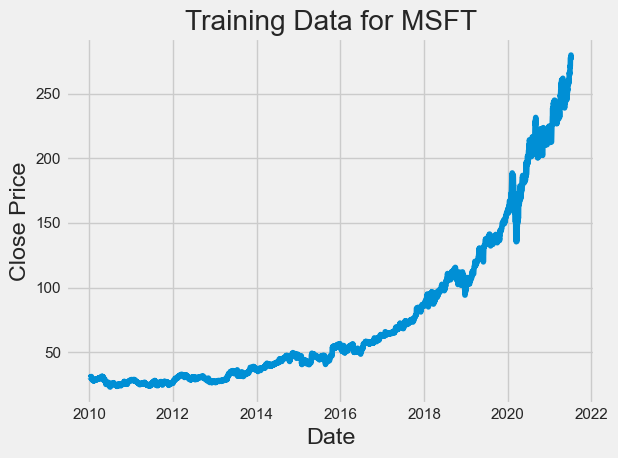

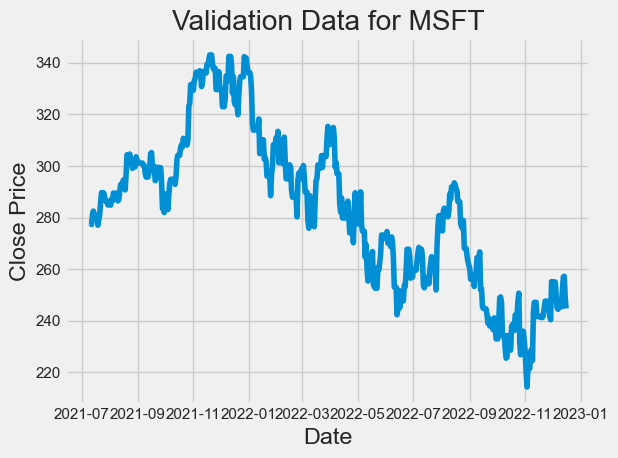

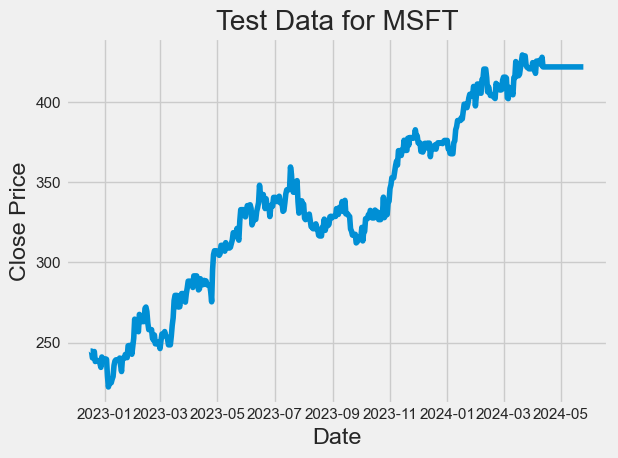

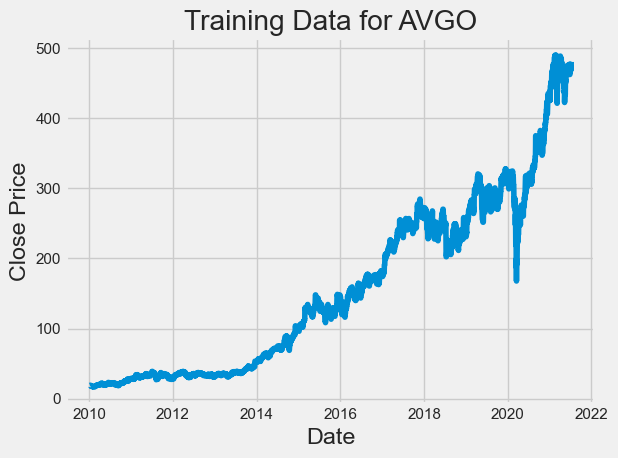

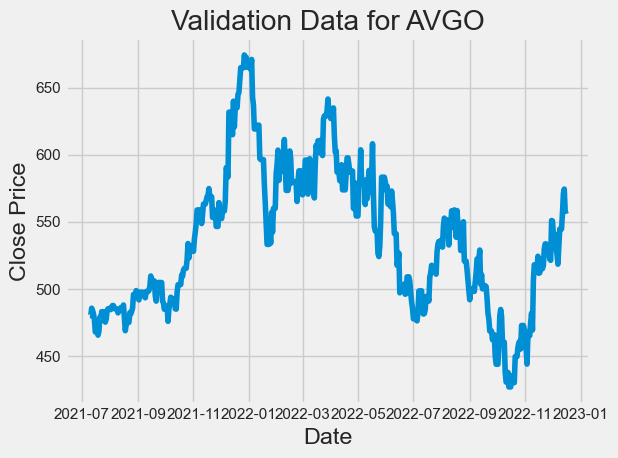

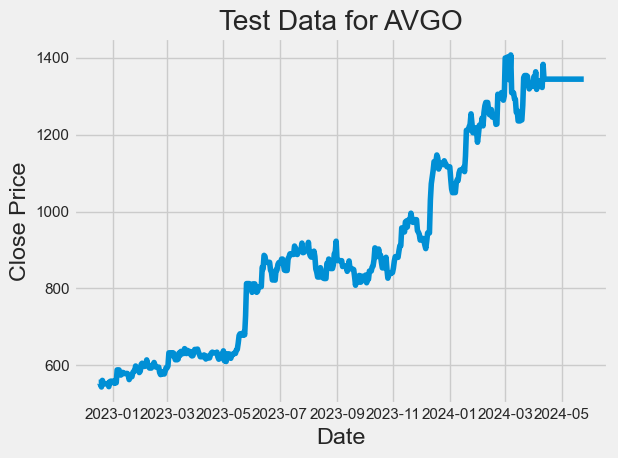

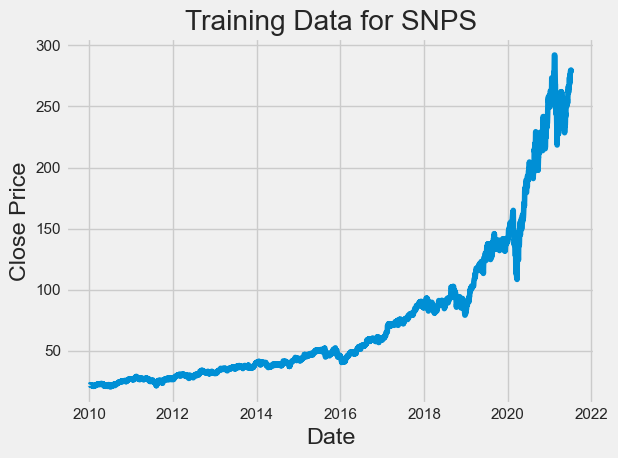

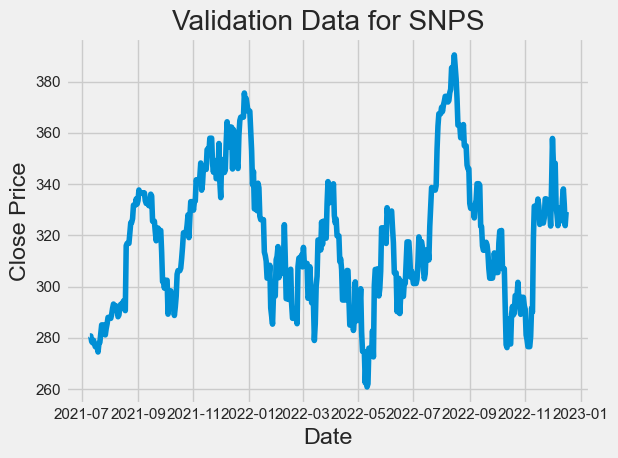

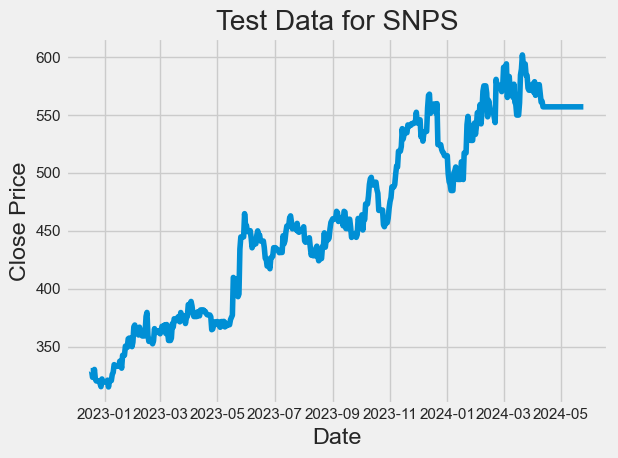

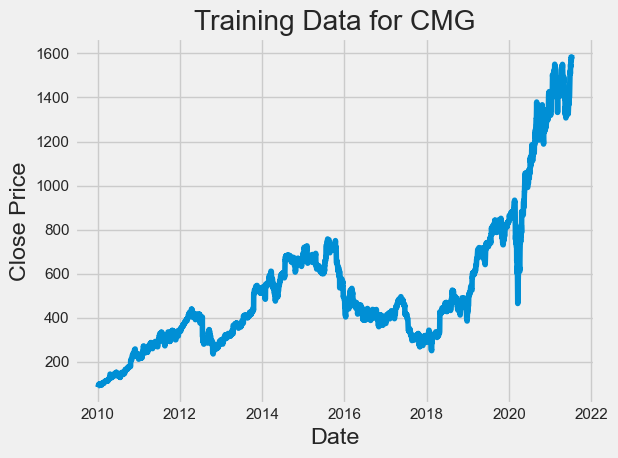

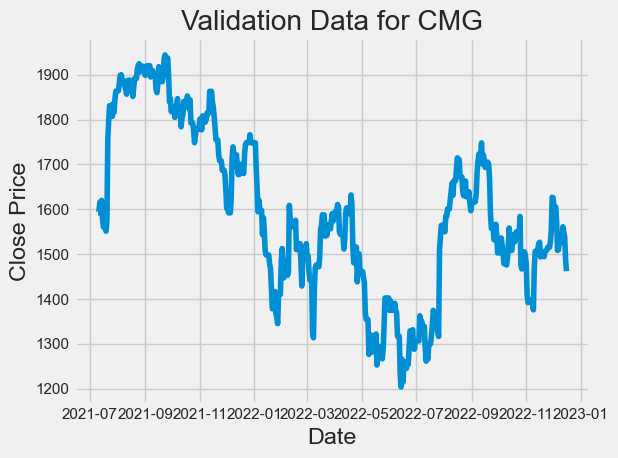

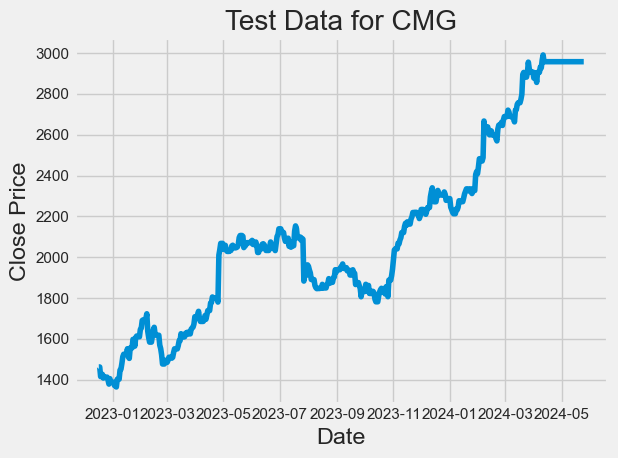

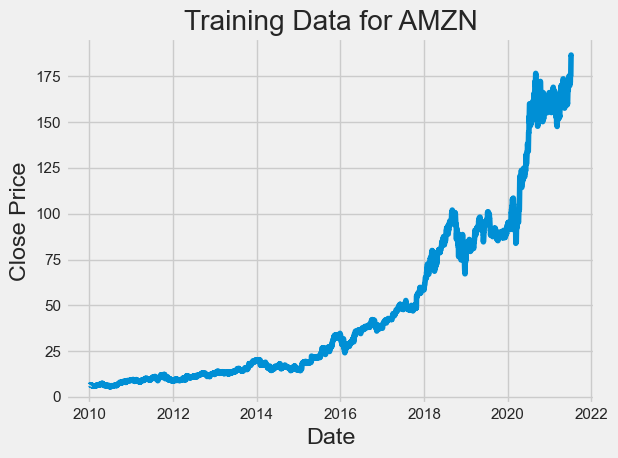

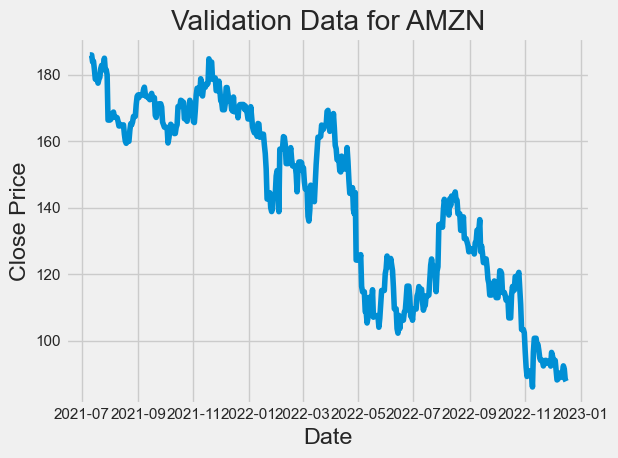

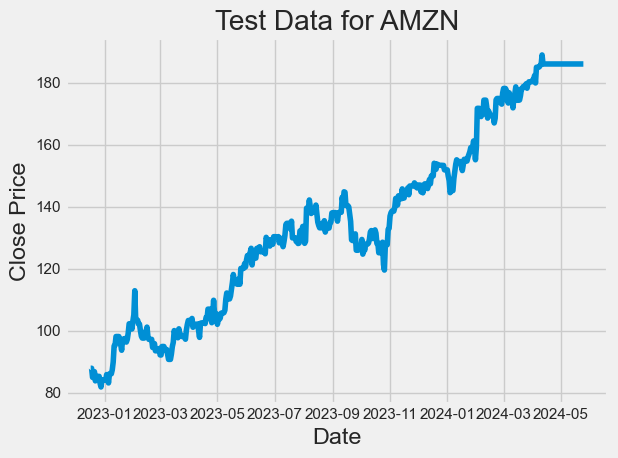

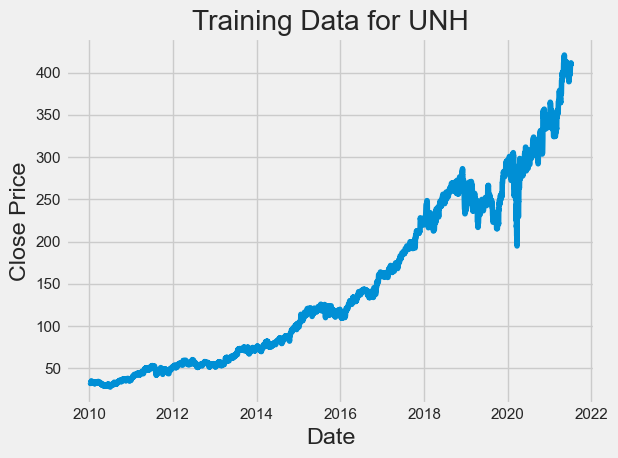

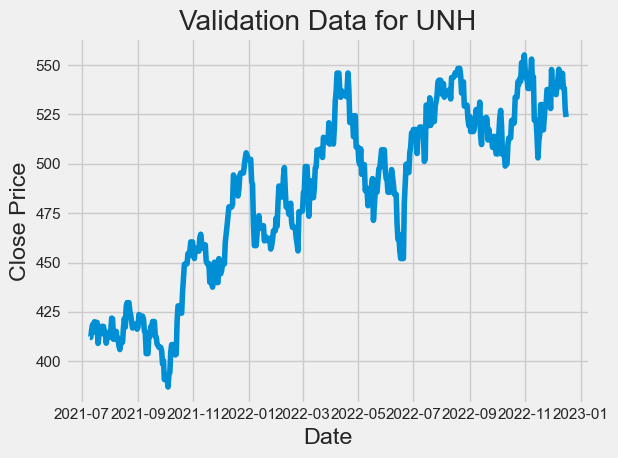

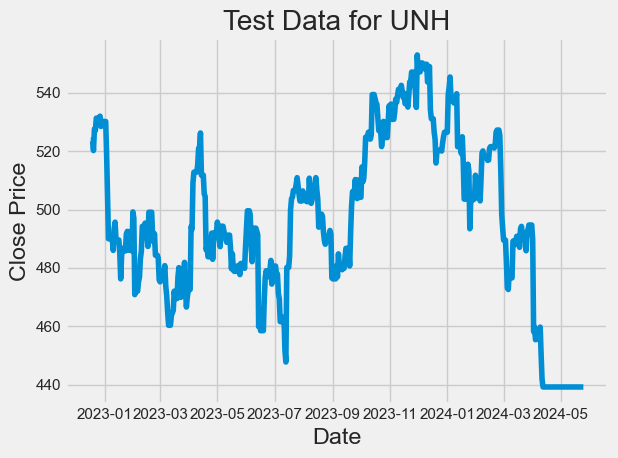

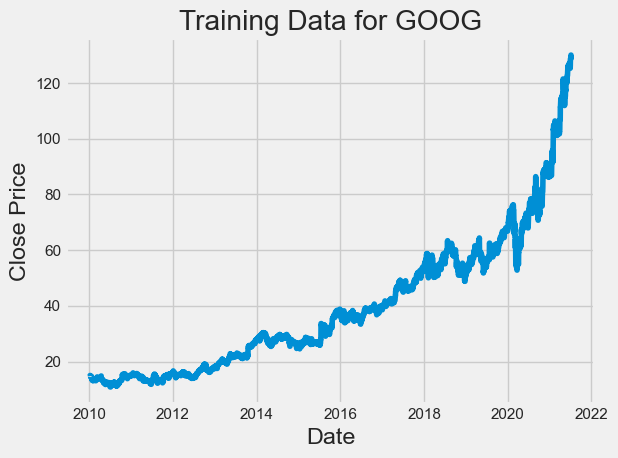

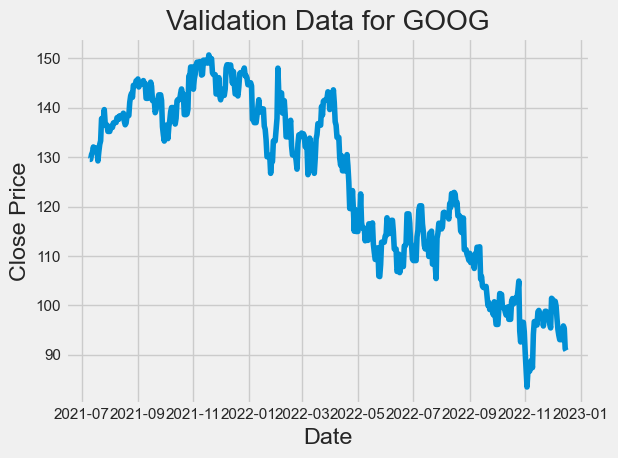

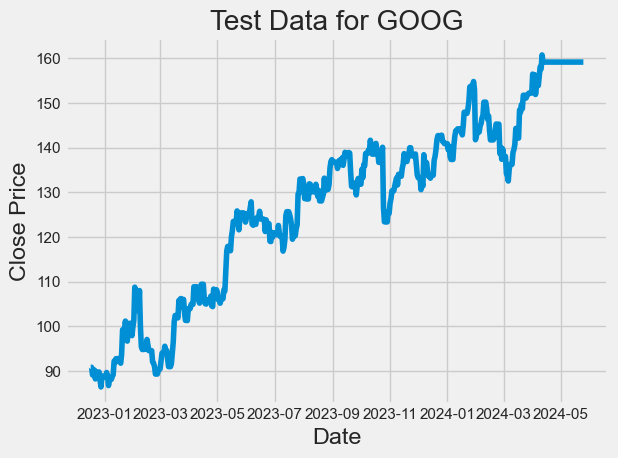

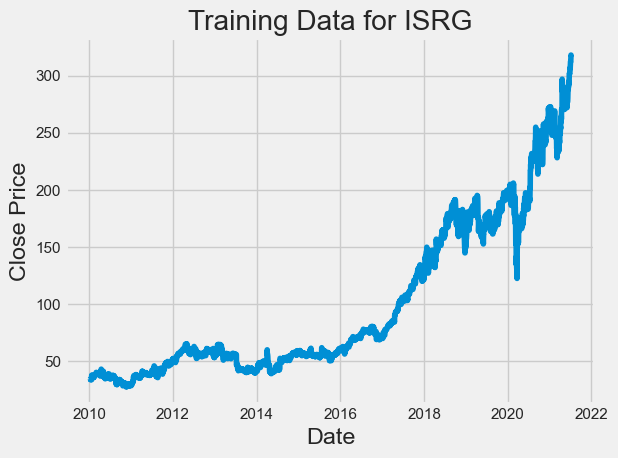

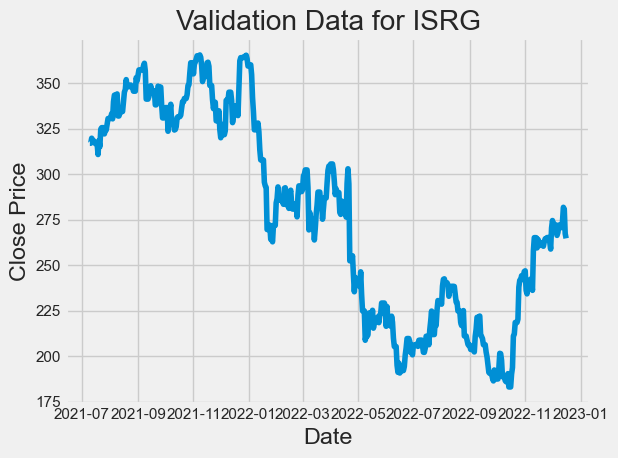

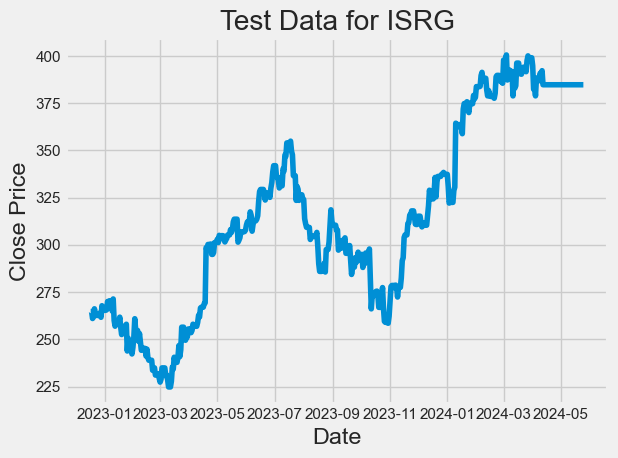

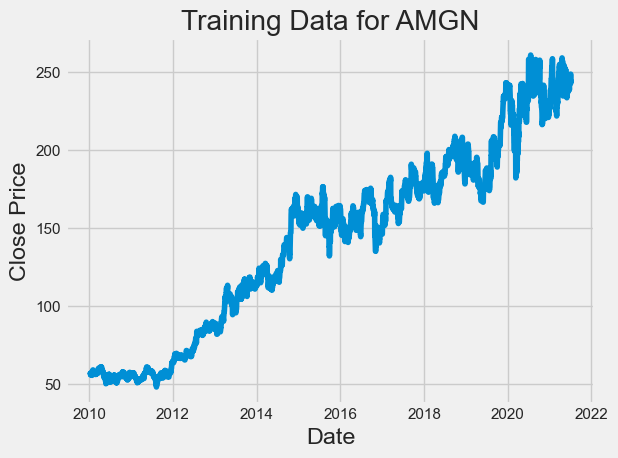

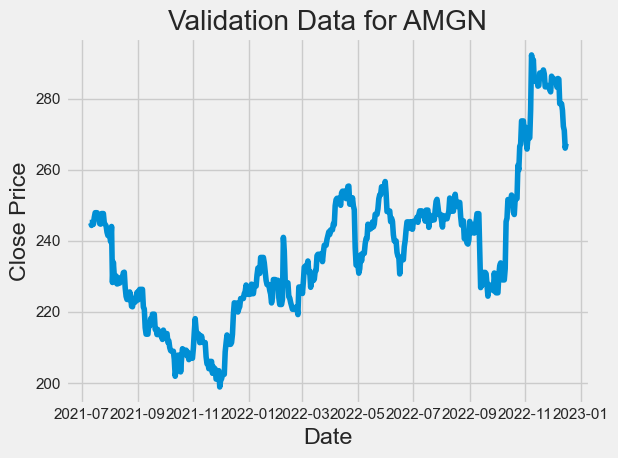

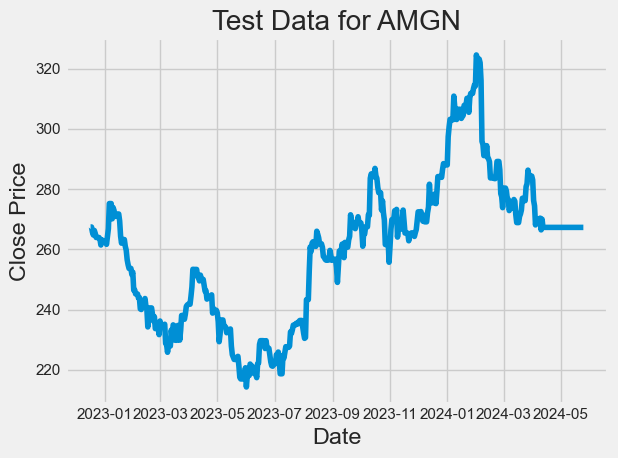

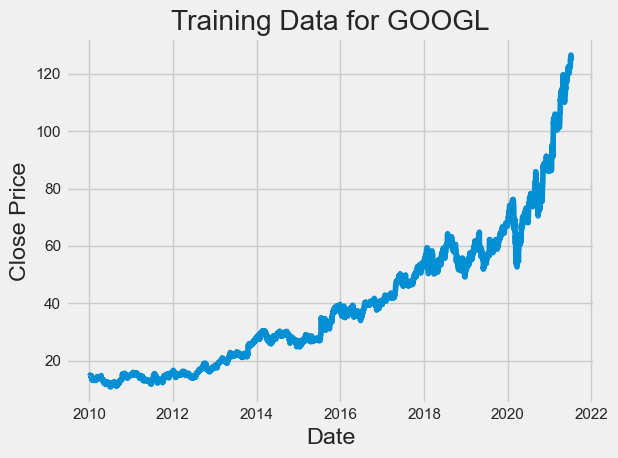

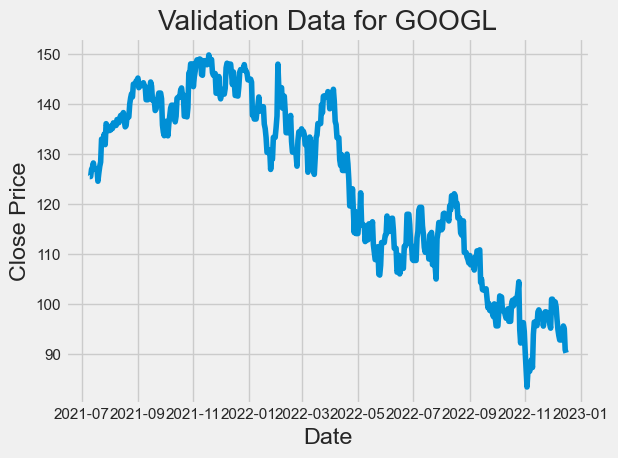

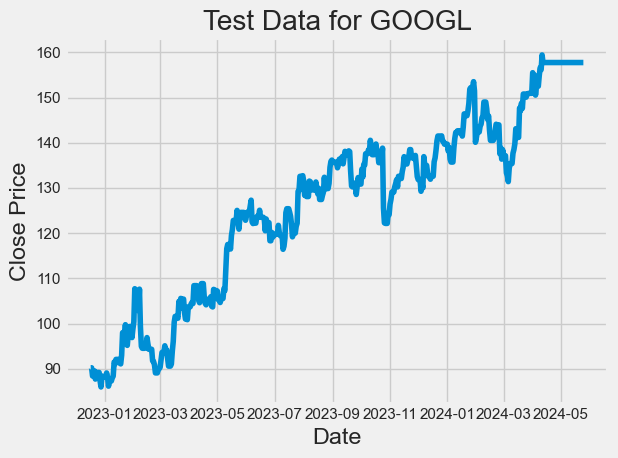

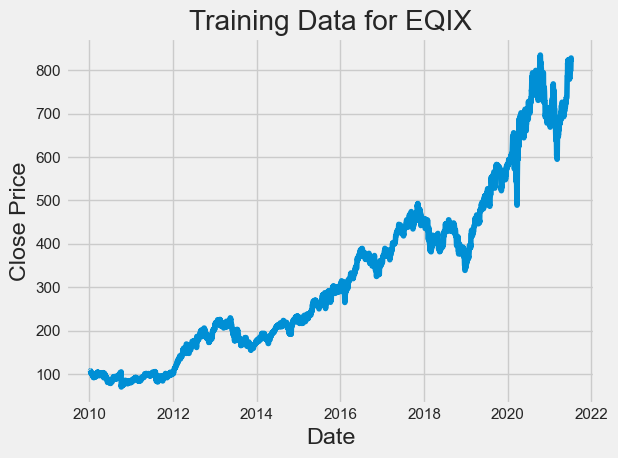

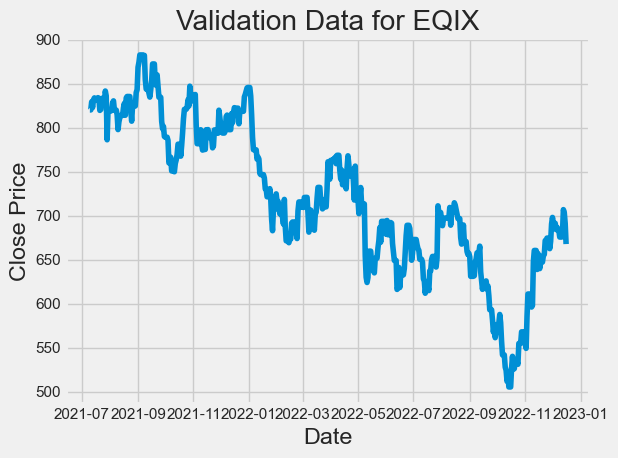

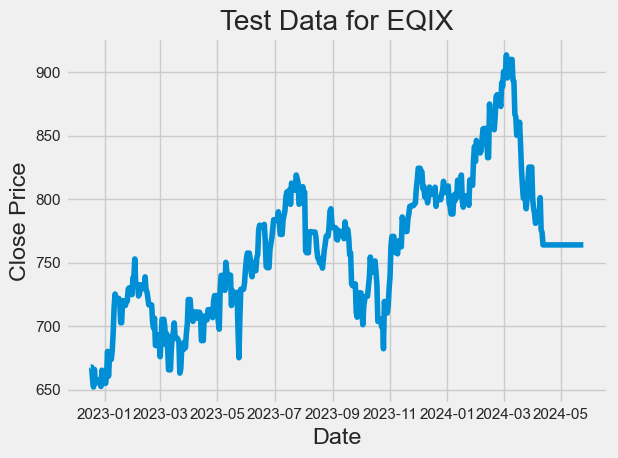

In [129]:
for res in result_list:
    dates = res["dates"]
    X = res['X']
    y = res['y']
    dates_val, X_val, y_val, dates_test, X_test, y_test = train(dates, X, y, res['name'])
    res['dates_val'] = dates_val
    res['X_val'] = X_val
    res['y_val'] = y_val
    res['dates_test'] = dates_test
    res['X_test'] = X_test
    res['y_test'] = y_test

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

def model_tr(X_train, y_train, X_val, y_val):
    model = Sequential([
        layers.Input((X_train.shape[1], X_train.shape[2])),
        layers.LSTM(64),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(
        loss='mse', 
        optimizer=Adam(learning_rate=0.001),
        metrics=['mean_absolute_error']
    )
    
    history = model.fit(
        X_train, y_train, 
        validation_data=(X_val, y_val), 
        epochs=100
    )
    
    # Save the trained model
    model.save(f"{res['name']}_model.keras")
    
    return model, history

In [131]:

for res in result_list:
    X_train, y_train = res['X'], res['y']
    X_val, y_val = res['X_val'], res['y_val']
    model, history = model_tr(X_train, y_train, X_val, y_val)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34089.0664 - mean_absolute_error: 84.8891 - val_loss: 530.1539 - val_mean_absolute_error: 19.8976
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 5367.0205 - mean_absolute_error: 17.6377 - val_loss: 263.6615 - val_mean_absolute_error: 13.9773
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 639.9693 - mean_absolute_error: 7.1167 - val_loss: 106.2033 - val_mean_absolute_error: 8.2741
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 73.3105 - mean_absolute_error: 3.2824 - val_loss: 133.6358 - val_mean_absolute_error: 8.9341
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 138.5049 - mean_absolute_error: 4.0629 - val_loss: 70.0368 - val_mean_absolute_error: 6.5305
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 91.8375 - mean_absolute_error: 3.5211 - val_loss: 84.8972 - val_mean_absolute_error: 7.1382
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - 

Epoch 1/100


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29820.3125 - mean_absolute_error: 79.0633 - val_loss: 195.0489 - val_mean_absolute_error: 12.0745
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 3636.8140 - mean_absolute_error: 13.1526 - val_loss: 117.0176 - val_mean_absolute_error: 8.3888
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 328.4329 - mean_absolute_error: 5.8859 - val_loss: 146.0841 - val_mean_absolute_error: 9.2951
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 70.6751 - mean_absolute_error: 3.1645 - val_loss: 97.8444 - val_mean_absolute_error: 7.4325
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 74.5298 - mean_absolute_error: 3.1282 - val_loss: 71.0315 - val_mean_absolute_error: 6.5697
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 60.6402 - mean_absolute_error: 3.1285 - val_loss: 68.9127 - val_mean_absolute_error: 6.6098
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 90.8328 -

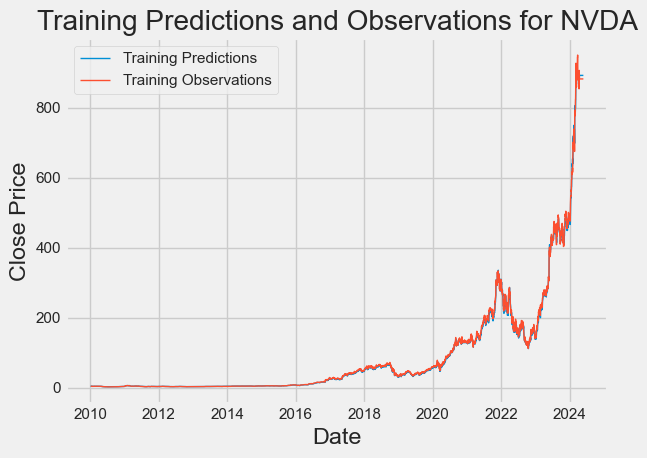

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41928.9102 - mean_absolute_error: 133.9966 - val_loss: 2587.8000 - val_mean_absolute_error: 38.6970
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 5447.1733 - mean_absolute_error: 21.6169 - val_loss: 43.2063 - val_mean_absolute_error: 5.1954
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 228.9227 - mean_absolute_error: 6.0474 - val_loss: 115.8881 - val_mean_absolute_error: 9.7380
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 110.3509 - mean_absolute_error: 5.0741 - val_loss: 32.8687 - val_mean_absolute_error: 4.2652
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 42.7779 - mean_absolute_error: 3.4535 - val_loss: 40.0906 - val_mean_absolute_error: 4.9778
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 24.2127 - mean_absolute_error: 2.7249 - val_loss: 43.1441 - val_mean_absolute_error: 5.0467
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

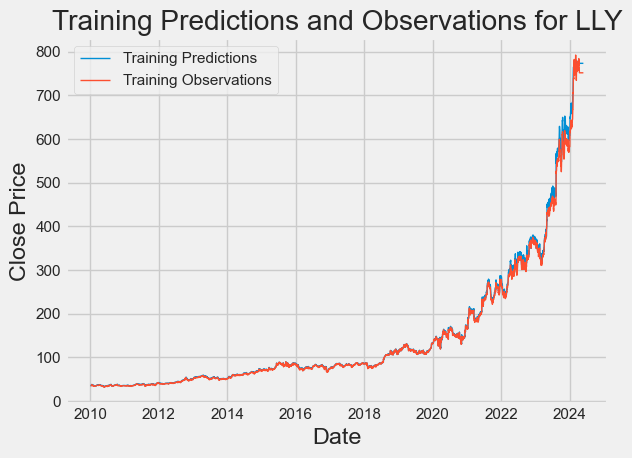

Epoch 1/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35638.8281 - mean_absolute_error: 155.3038 - val_loss: 2476.9219 - val_mean_absolute_error: 28.5134
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 3204.3840 - mean_absolute_error: 24.1238 - val_loss: 61.1097 - val_mean_absolute_error: 4.9204
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 295.6873 - mean_absolute_error: 6.0040 - val_loss: 58.4283 - val_mean_absolute_error: 4.7531
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 70.8727 - mean_absolute_error: 4.6775 - val_loss: 79.4936 - val_mean_absolute_error: 5.7170
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36.8686 - mean_absolute_error: 3.7886 - val_loss: 61.8709 - val_mean_absolute_error: 4.8548
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 28.7161 - mean_absolute_error: 3.5095 - val_loss: 67.5838 - val_mean_absolute_error: 5.4469
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss:

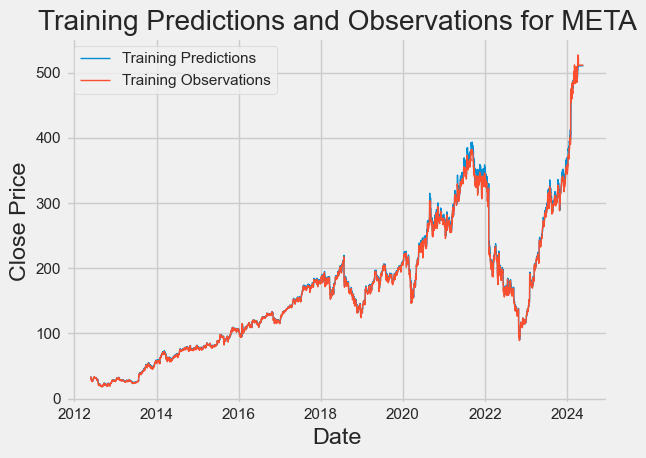

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72130.1016 - mean_absolute_error: 202.2572 - val_loss: 43084.6328 - val_mean_absolute_error: 188.9172
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 3821.4392 - mean_absolute_error: 24.6629 - val_loss: 508.3108 - val_mean_absolute_error: 17.2845
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 99.4915 - mean_absolute_error: 5.4505 - val_loss: 232.1199 - val_mean_absolute_error: 11.4334
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 83.0476 - mean_absolute_error: 5.4857 - val_loss: 210.0111 - val_mean_absolute_error: 10.9811
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58.1193 - mean_absolute_error: 4.6712 - val_loss: 211.3717 - val_mean_absolute_error: 11.2878
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 62.2726 - mean_absolute_error: 4.5939 - val_loss: 210.0939 - val_mean_absolute_error: 11.1591
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

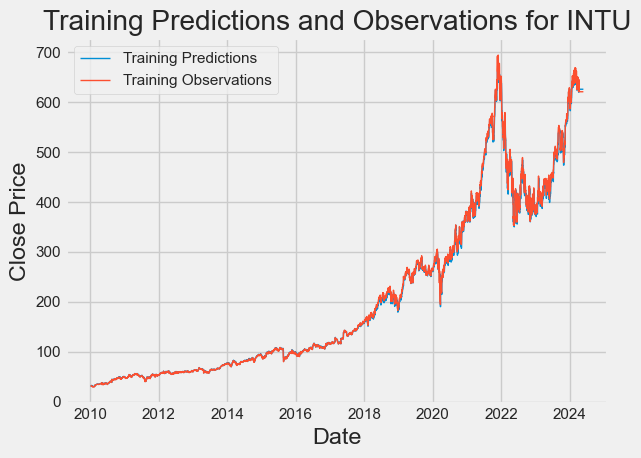

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 109876.7578 - mean_absolute_error: 245.6440 - val_loss: 44571.7188 - val_mean_absolute_error: 201.8786
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 13057.1152 - mean_absolute_error: 54.2410 - val_loss: 305.7520 - val_mean_absolute_error: 13.8763
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 369.4399 - mean_absolute_error: 9.1195 - val_loss: 423.2370 - val_mean_absolute_error: 16.9223
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 166.1304 - mean_absolute_error: 7.7965 - val_loss: 242.1456 - val_mean_absolute_error: 11.9607
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 106.9266 - mean_absolute_error: 6.2296 - val_loss: 254.5739 - val_mean_absolute_error: 12.5435
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 90.3775 - mean_absolute_error: 6.2224 - val_loss: 323.5878 - val_mean_absolute_error: 13.5631
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 96

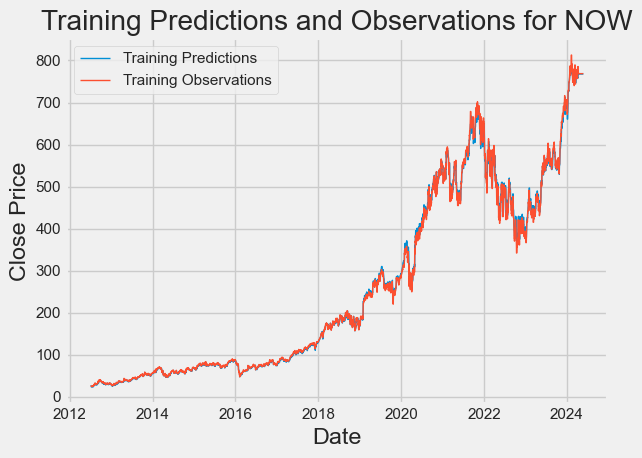

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22823.0586 - mean_absolute_error: 52.7910 - val_loss: 6.2170 - val_mean_absolute_error: 1.9066
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 11251.2500 - mean_absolute_error: 20.3180 - val_loss: 6.3660 - val_mean_absolute_error: 2.0373
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 3276.5491 - mean_absolute_error: 9.4283 - val_loss: 16.2729 - val_mean_absolute_error: 3.6676
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 364.6379 - mean_absolute_error: 4.3904 - val_loss: 9.1895 - val_mean_absolute_error: 2.2530
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 266.2606 - mean_absolute_error: 3.2919 - val_loss: 13.2595 - val_mean_absolute_error: 3.1722
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 273.1176 - mean_absolute_error: 3.9057 - val_loss: 4.9355 - val_mean_absolute_error: 1.7067
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 219.95

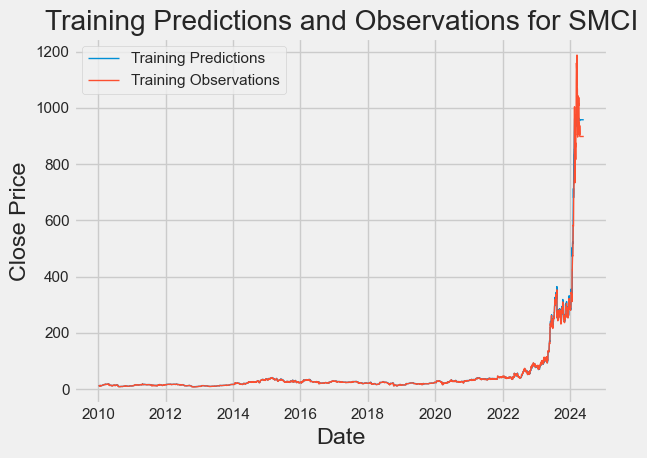

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35917.0430 - mean_absolute_error: 166.0111 - val_loss: 12385.4219 - val_mean_absolute_error: 109.2398
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2883.1816 - mean_absolute_error: 31.8626 - val_loss: 26.7508 - val_mean_absolute_error: 4.0573
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 43.9597 - mean_absolute_error: 2.8830 - val_loss: 44.6218 - val_mean_absolute_error: 5.4357
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 17.7479 - mean_absolute_error: 2.5420 - val_loss: 18.1800 - val_mean_absolute_error: 3.3325
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 11.6758 - mean_absolute_error: 2.3137 - val_loss: 35.5040 - val_mean_absolute_error: 4.7983
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.7435 - mean_absolute_error: 2.2333 - val_loss: 24.8902 - val_mean_absolute_error: 3.8053
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 

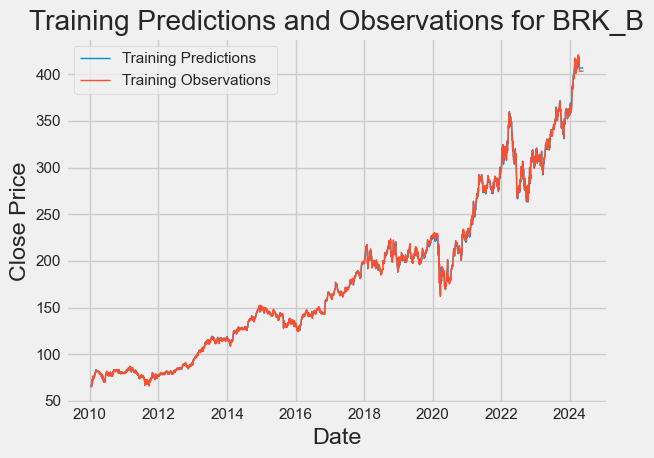

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 191064.5156 - mean_absolute_error: 341.4718 - val_loss: 69105.3125 - val_mean_absolute_error: 259.9527
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 25500.6582 - mean_absolute_error: 73.2358 - val_loss: 428.7360 - val_mean_absolute_error: 17.0344
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 1374.6528 - mean_absolute_error: 14.2076 - val_loss: 557.7867 - val_mean_absolute_error: 20.3836
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 315.2717 - mean_absolute_error: 9.3557 - val_loss: 172.5333 - val_mean_absolute_error: 9.8590
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 374.5153 - mean_absolute_error: 12.1263 - val_loss: 212.6927 - val_mean_absolute_error: 11.0844
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 263.0323 - mean_absolute_error: 9.3184 - val_loss: 196.5925 - val_mean_absolute_error: 10.6496
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 

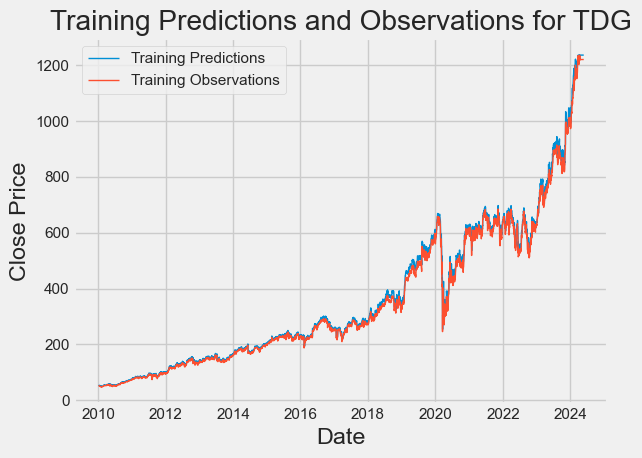

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2897130.5000 - mean_absolute_error: 1505.1880 - val_loss: 3627782.2500 - val_mean_absolute_error: 1888.7550
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 1667924.2500 - mean_absolute_error: 1045.9761 - val_loss: 366836.4688 - val_mean_absolute_error: 558.5284
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 201506.6094 - mean_absolute_error: 232.3464 - val_loss: 6707.3340 - val_mean_absolute_error: 62.1819
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 39495.1055 - mean_absolute_error: 81.9700 - val_loss: 3202.2153 - val_mean_absolute_error: 42.1346
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 15846.2041 - mean_absolute_error: 59.0972 - val_loss: 7980.8364 - val_mean_absolute_error: 72.1362
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 7391.4834 - mean_absolute_error: 47.9126 - val_loss: 5468.4771 - val_mean_absolute_error: 61.4748
Epoch 7/100
1

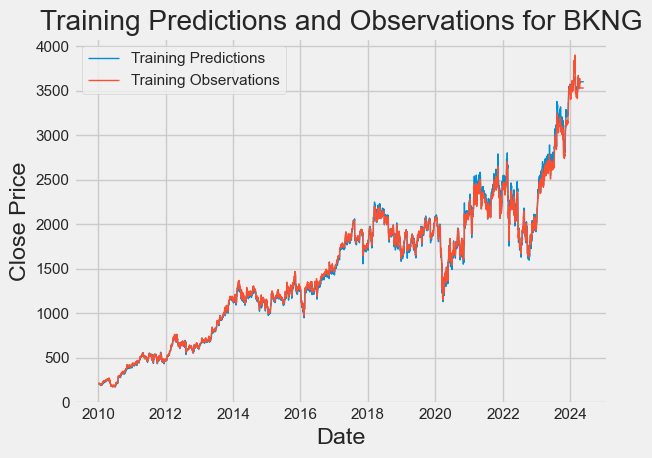

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24109.6797 - mean_absolute_error: 111.0520 - val_loss: 3338.4448 - val_mean_absolute_error: 50.8049
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 648.9120 - mean_absolute_error: 8.7477 - val_loss: 46.7548 - val_mean_absolute_error: 5.5123
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 31.3289 - mean_absolute_error: 3.0822 - val_loss: 39.3440 - val_mean_absolute_error: 4.9765
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 13.2387 - mean_absolute_error: 2.2109 - val_loss: 71.2313 - val_mean_absolute_error: 6.7501
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 29.4406 - mean_absolute_error: 2.8949 - val_loss: 34.5892 - val_mean_absolute_error: 4.6030
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 13.1006 - mean_absolute_error: 2.3228 - val_loss: 101.9066 - val_mean_absolute_error: 8.8280
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss:

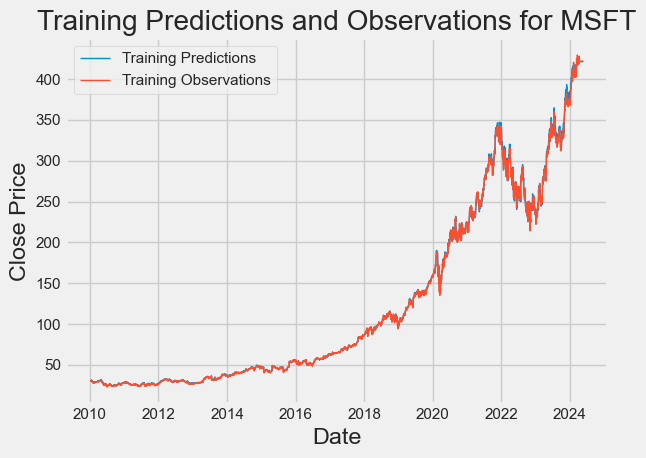

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 149886.0625 - mean_absolute_error: 264.1016 - val_loss: 55648.0430 - val_mean_absolute_error: 229.6946
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 31037.9922 - mean_absolute_error: 62.9474 - val_loss: 3673.8813 - val_mean_absolute_error: 59.0435
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 3084.9646 - mean_absolute_error: 18.0914 - val_loss: 649.7899 - val_mean_absolute_error: 22.4096
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 642.7414 - mean_absolute_error: 10.3438 - val_loss: 236.0245 - val_mean_absolute_error: 12.1879
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 495.1767 - mean_absolute_error: 9.6487 - val_loss: 285.9541 - val_mean_absolute_error: 13.7327
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 729.1302 - mean_absolute_error: 10.3845 - val_loss: 186.8012 - val_mean_absolute_error: 10.7450
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 

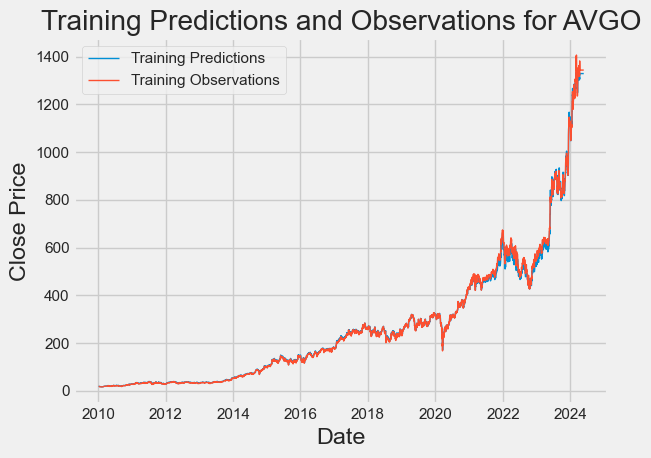

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35636.8320 - mean_absolute_error: 124.8109 - val_loss: 6827.0400 - val_mean_absolute_error: 78.3660
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 3154.8884 - mean_absolute_error: 19.5765 - val_loss: 70.5710 - val_mean_absolute_error: 6.7058
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 111.1888 - mean_absolute_error: 4.7079 - val_loss: 331.3798 - val_mean_absolute_error: 16.5480
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 52.0638 - mean_absolute_error: 4.2284 - val_loss: 117.6273 - val_mean_absolute_error: 9.0046
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 40.1043 - mean_absolute_error: 3.5446 - val_loss: 66.4649 - val_mean_absolute_error: 6.3691
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 25.8488 - mean_absolute_error: 2.8495 - val_loss: 95.1665 - val_mean_absolute_error: 8.0229
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - 

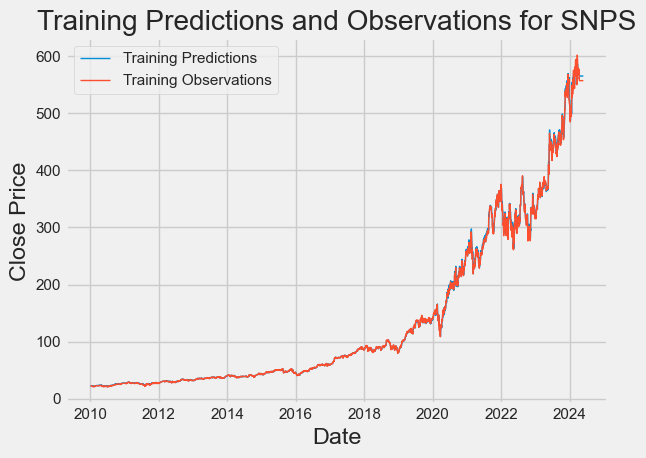

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1032201.8750 - mean_absolute_error: 789.8409 - val_loss: 1419415.6250 - val_mean_absolute_error: 1176.7369
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 331711.2812 - mean_absolute_error: 320.9590 - val_loss: 17296.7871 - val_mean_absolute_error: 106.6914
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 31689.8438 - mean_absolute_error: 67.1758 - val_loss: 2747.1938 - val_mean_absolute_error: 44.3908
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 6960.7241 - mean_absolute_error: 29.7444 - val_loss: 2545.4924 - val_mean_absolute_error: 42.3266
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 4069.6028 - mean_absolute_error: 31.8747 - val_loss: 10114.1162 - val_mean_absolute_error: 94.7017
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 4217.6929 - mean_absolute_error: 36.9660 - val_loss: 2240.0173 - val_mean_absolute_error: 38.6054
Epoch 7/100
165/165 

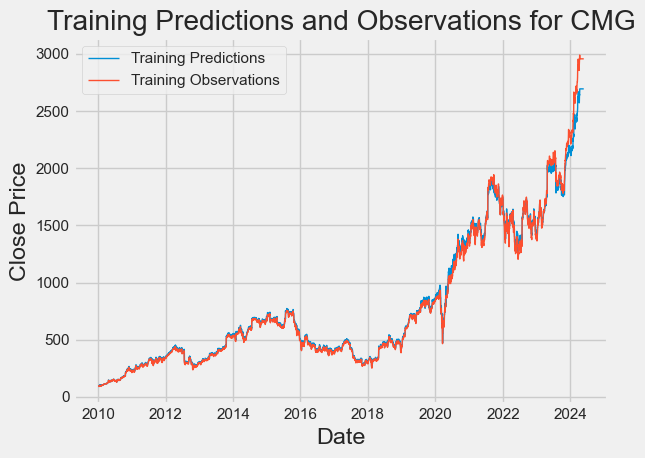

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5518.6919 - mean_absolute_error: 50.9477 - val_loss: 57.0297 - val_mean_absolute_error: 5.9698
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 8.7738 - mean_absolute_error: 1.6650 - val_loss: 42.9167 - val_mean_absolute_error: 5.3015
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 6.4659 - mean_absolute_error: 1.5695 - val_loss: 18.8957 - val_mean_absolute_error: 3.2022
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 5.4520 - mean_absolute_error: 1.3792 - val_loss: 26.1709 - val_mean_absolute_error: 4.0892
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 6.3977 - mean_absolute_error: 1.4931 - val_loss: 18.9000 - val_mean_absolute_error: 3.2877
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 6.0961 - mean_absolute_error: 1.5067 - val_loss: 17.1969 - val_mean_absolute_error: 2.9834
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 4.1986 - me

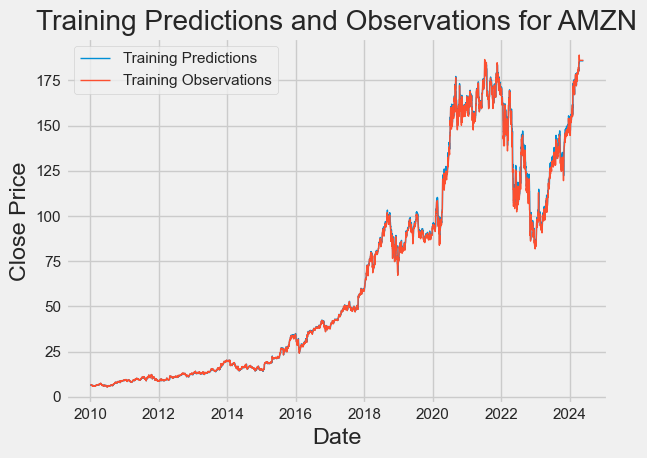

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69721.6953 - mean_absolute_error: 206.6690 - val_loss: 83096.2734 - val_mean_absolute_error: 284.8527
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 9750.3096 - mean_absolute_error: 48.7366 - val_loss: 940.2076 - val_mean_absolute_error: 26.1412
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 115.8983 - mean_absolute_error: 5.7797 - val_loss: 331.8376 - val_mean_absolute_error: 15.5630
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 57.7105 - mean_absolute_error: 4.7202 - val_loss: 100.0871 - val_mean_absolute_error: 7.8839
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 26.0423 - mean_absolute_error: 3.1471 - val_loss: 89.6034 - val_mean_absolute_error: 7.5128
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 27.7764 - mean_absolute_error: 3.2468 - val_loss: 119.5692 - val_mean_absolute_error: 8.7729
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/st

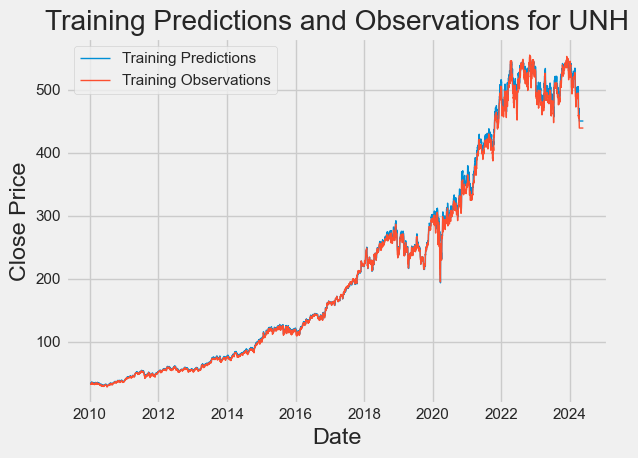

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3950.2847 - mean_absolute_error: 46.9059 - val_loss: 48.2926 - val_mean_absolute_error: 5.5424
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 8.1007 - mean_absolute_error: 1.5717 - val_loss: 8.1180 - val_mean_absolute_error: 2.2832
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 2.7665 - mean_absolute_error: 0.9772 - val_loss: 9.7801 - val_mean_absolute_error: 2.4920
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 2.6757 - mean_absolute_error: 1.0519 - val_loss: 7.4192 - val_mean_absolute_error: 2.0730
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 2.1036 - mean_absolute_error: 0.8806 - val_loss: 14.8553 - val_mean_absolute_error: 3.2207
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 2.6831 - mean_absolute_error: 1.0211 - val_loss: 6.8333 - val_mean_absolute_error: 2.0545
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2622 - mean_abs

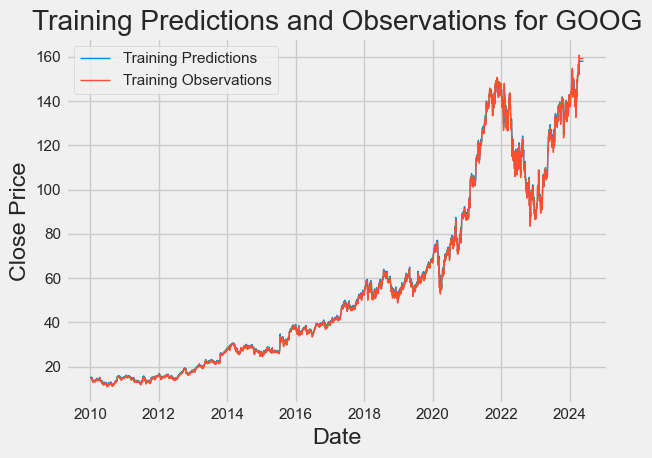

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24442.6582 - mean_absolute_error: 119.8869 - val_loss: 2632.6819 - val_mean_absolute_error: 39.1869
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 259.2583 - mean_absolute_error: 6.3262 - val_loss: 65.5819 - val_mean_absolute_error: 5.8173
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 25.4511 - mean_absolute_error: 2.9205 - val_loss: 57.4637 - val_mean_absolute_error: 5.3521
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 30.9074 - mean_absolute_error: 3.5119 - val_loss: 56.6760 - val_mean_absolute_error: 5.3824
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 21.6267 - mean_absolute_error: 2.8641 - val_loss: 80.4509 - val_mean_absolute_error: 6.7103
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 17.8952 - mean_absolute_error: 2.6251 - val_loss: 92.1285 - val_mean_absolute_error: 7.3043
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 

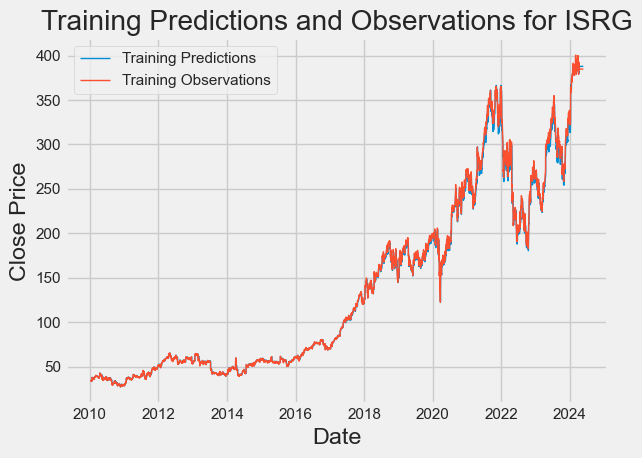

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27324.1484 - mean_absolute_error: 147.8520 - val_loss: 3959.9470 - val_mean_absolute_error: 59.9390
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 759.7780 - mean_absolute_error: 16.3689 - val_loss: 33.2458 - val_mean_absolute_error: 3.4977
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 24.7630 - mean_absolute_error: 2.6894 - val_loss: 14.5493 - val_mean_absolute_error: 2.7995
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 14.8564 - mean_absolute_error: 2.3834 - val_loss: 12.3937 - val_mean_absolute_error: 2.6364
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 10.8481 - mean_absolute_error: 2.1291 - val_loss: 19.5503 - val_mean_absolute_error: 3.6114
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 11.8537 - mean_absolute_error: 2.3620 - val_loss: 13.8944 - val_mean_absolute_error: 2.8884
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss:

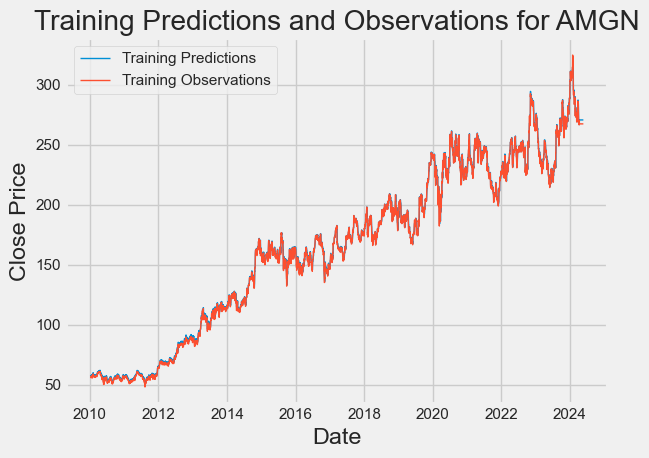

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3937.9658 - mean_absolute_error: 47.2895 - val_loss: 128.6089 - val_mean_absolute_error: 8.9297
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 11.6014 - mean_absolute_error: 1.7414 - val_loss: 7.2029 - val_mean_absolute_error: 2.1176
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 3.4323 - mean_absolute_error: 1.1197 - val_loss: 6.9937 - val_mean_absolute_error: 2.1012
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 2.3491 - mean_absolute_error: 0.9591 - val_loss: 6.9120 - val_mean_absolute_error: 2.0994
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 2.2830 - mean_absolute_error: 0.9442 - val_loss: 6.6557 - val_mean_absolute_error: 2.0267
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 2.5697 - mean_absolute_error: 1.0773 - val_loss: 9.1930 - val_mean_absolute_error: 2.4397
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 2.3937 - mean_

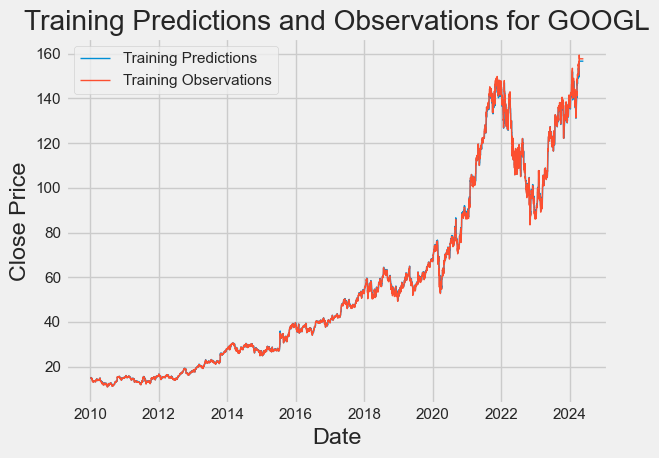

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 210631.1719 - mean_absolute_error: 387.8954 - val_loss: 172541.4688 - val_mean_absolute_error: 406.4758
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 31491.4941 - mean_absolute_error: 117.8789 - val_loss: 1819.8627 - val_mean_absolute_error: 30.7847
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 368.0202 - mean_absolute_error: 10.7671 - val_loss: 528.6440 - val_mean_absolute_error: 18.3910
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 172.7362 - mean_absolute_error: 8.1322 - val_loss: 302.1758 - val_mean_absolute_error: 14.0158
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 154.2378 - mean_absolute_error: 8.3276 - val_loss: 241.2034 - val_mean_absolute_error: 12.3650
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 98.3199 - mean_absolute_error: 6.3797 - val_loss: 329.1185 - val_mean_absolute_error: 14.6854
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0

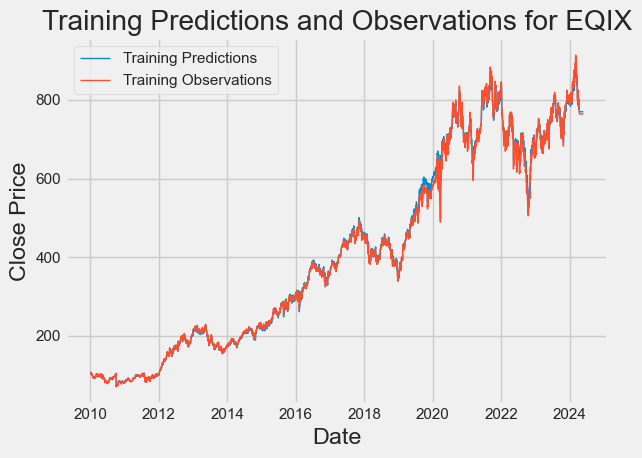

In [132]:
train_predictions_list = []

for res in result_list:
    X_train, y_train = res['X'], res['y']
    X_val, y_val = res['X_val'], res['y_val']
    model, history = model_tr(X_train, y_train, X_val, y_val)
    
    # Generate predictions for the training data
    train_predictions = model.predict(X_train).flatten()
    train_predictions_list.append(train_predictions)
    
    # Plot training predictions and observations
    plt.figure()
    plt.plot(res['dates'], train_predictions,linewidth=1.0)
    plt.plot(res['dates'], y_train,linewidth=1.0)
    plt.title(f"Training Predictions and Observations for {res['name']}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend(['Training Predictions', 'Training Observations'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()